In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Guntur']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
656,869,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.27,0.49,0.60,...,304.0,5734.0,634.0,21.65,1.62,1.36,4.53,2.80,6.07,Turmeric
657,870,16.40,81.31,Guntur,Kollur,Chilumuru,Black soil,8.05,0.68,0.78,...,535.0,5400.0,1077.0,95.09,1.56,2.23,29.90,6.52,7.34,Turmeric
658,871,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,7.77,1.13,0.54,...,129.0,6984.0,1565.0,199.10,0.62,1.23,16.59,5.65,6.24,Turmeric
659,872,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.15,0.31,0.39,...,165.0,6089.0,941.0,18.89,0.54,0.99,4.19,2.52,5.10,Yam
660,873,16.24,80.79,Guntur,Kollur,Chilumuru,Black soil,8.10,0.32,0.42,...,135.0,5812.0,932.0,17.21,0.68,1.13,3.80,2.96,6.53,Yam


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000
mean,8.072559,0.737971,0.539353,22.956088,247.779412,6215.823529,1033.347059,62.026000,1.414412,1.462941,10.493588,3.306147,10.563088
std,0.317204,0.833152,0.161586,16.451900,138.177395,1623.475786,523.213186,99.480417,1.530636,0.650554,11.583131,2.509120,6.839351
min,6.830000,0.130000,0.180000,1.800000,66.000000,970.000000,111.000000,5.800000,0.120000,0.470000,1.300000,0.810000,2.180000
25%,7.940000,0.317500,0.437500,11.275000,165.750000,5135.250000,649.750000,18.662500,0.620000,1.020000,4.002500,1.567500,5.655000
50%,8.125000,0.470000,0.530000,18.900000,216.000000,6364.000000,927.500000,32.050000,0.975000,1.290000,5.820000,2.320000,8.050000
75%,8.262500,0.830000,0.630000,30.700000,286.000000,7381.000000,1378.500000,66.065000,1.642500,1.690000,11.235000,3.680000,13.520000
max,9.320000,7.850000,1.230000,140.600000,1553.000000,13304.000000,2476.000000,990.090000,19.200000,5.020000,94.800000,12.350000,43.740000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace('Black soil', 'Black Soil')
df.SoilType.unique()

array(['Black Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 340}

<BarContainer object of 1 artists>

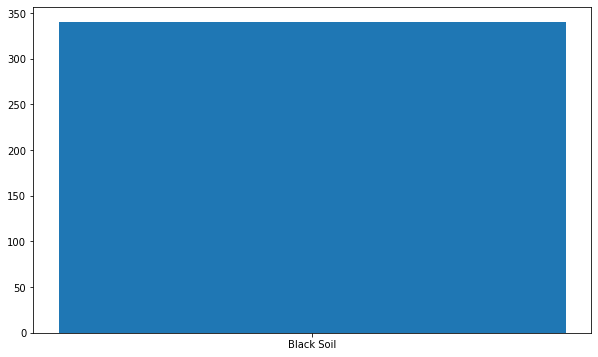

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Turmeric', 'Yam', 'Paddy', 'Banana', 'yam', 'Cotton',
       'Ridge Guard', 'Chilli', 'Vegetables'], dtype=object)

In [14]:
df['Crop'].value_counts()

Chilli         98
Paddy          85
Cotton         80
Turmeric       36
Yam            24
Banana         14
yam             1
Vegetables      1
Ridge Guard     1
Name: Crop, dtype: int64

Paddy + Cotton    165
Chilli             98
Turmeric           36
Yam                25
Banana             14
Name: Crop, dtype: int64


<BarContainer object of 5 artists>

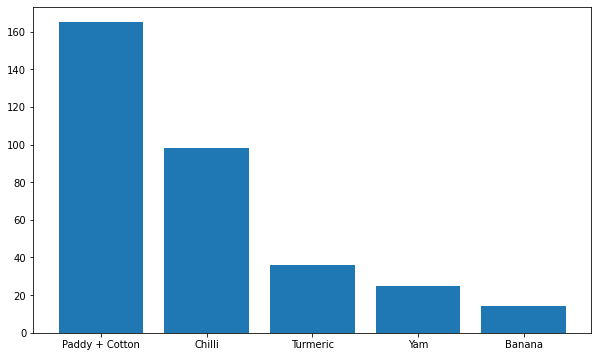

In [15]:
df['Crop'] = df['Crop'].replace('yam', 'Yam')
df['Crop'] = df['Crop'].replace(['Paddy', 'Cotton'], 'Paddy + Cotton')
df = df[(df['Crop'] != 'Vegetables') & (df['Crop'] != 'Ridge Guard')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,-0.401141,-0.299367,-0.403982,-0.037303,-0.264846,-0.370749,-0.274872,-0.139346,-0.244247,-0.573187,-0.611952,-0.546563
EC,-0.401141,1.000000,0.243990,0.196558,0.173598,0.185146,0.240402,0.828407,0.089097,0.441005,0.150949,0.336557,0.336473
OC,-0.299367,0.243990,1.000000,0.618067,0.497872,-0.023821,0.110199,0.205578,0.396956,0.272625,0.102547,0.275944,0.374257
P,-0.403982,0.196558,0.618067,1.000000,0.483960,-0.157398,0.142226,0.082094,0.479919,0.222239,0.221820,0.313875,0.426199
K,-0.037303,0.173598,0.497872,0.483960,1.000000,-0.150087,-0.023388,0.078110,0.416968,0.161344,-0.175868,-0.020528,0.276539
Ca,-0.264846,0.185146,-0.023821,-0.157398,-0.150087,1.000000,0.078633,0.094773,-0.098378,0.076135,0.020379,0.054914,0.028215
Mg,-0.370749,0.240402,0.110199,0.142226,-0.023388,0.078633,1.000000,0.342552,0.151412,0.529289,0.653097,0.740648,0.364612
S,-0.274872,0.828407,0.205578,0.082094,0.078110,0.094773,0.342552,1.000000,0.074904,0.559119,0.223515,0.374149,0.200183
Zn,-0.139346,0.089097,0.396956,0.479919,0.416968,-0.098378,0.151412,0.074904,1.000000,0.203424,0.022695,0.229737,0.227489
B,-0.244247,0.441005,0.272625,0.222239,0.161344,0.076135,0.529289,0.559119,0.203424,1.000000,0.424479,0.534559,0.359413


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['P', 'S', 'B', 'Fe', 'Cu', 'Mn']
Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Ca', 'Mg', 'Zn', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC   OC      K      Ca     Mg    Zn  Black Soil
656  8.27  0.49  0.6  304.0  5734.0  634.0  1.62           1
656    Turmeric
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:7] = sc.fit_transform(X[:, 0:7])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [23]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [24]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [26]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [27]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [28]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7342995169082126


In [29]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.74 %
Standard Deviation: 5.64 %


# Decision Tree Classifier

In [30]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [31]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [32]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.6763285024154589


In [33]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 67.49 %
Standard Deviation: 5.82 %


# Random Forest Classifier

In [34]:
clf3_3 = RandomForestClassifier(random_state=0)
clf3_3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_test_pred = clf3_3.predict(X_test)
y_train_pred = clf3_3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [36]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7777777777777778


In [37]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3_3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.72 %
Standard Deviation: 4.95 %


In [38]:
pickle.dump(clf3_3, open('Guntur_model.pkl', 'wb'))
pickle.dump(sc2, open('Guntur_scaler.pkl', 'wb'))

# XGBoost

In [39]:
clf4_4 = HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [40]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [41]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7439613526570048


In [42]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [43]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 76.38 %
Standard Deviation: 5.18 %


In [44]:
# pickle.dump(clf4_4, open('Guntur_model.pkl', 'wb'))
# pickle.dump(sc2, open('Guntur_scaler.pkl', 'wb'))

# Multi-layer Perceptron Classifier

In [45]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [46]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [47]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7249190938511327
Testing Accuracy:  0.6859903381642513


In [48]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.50 %
Standard Deviation: 5.86 %


# Catboost

In [49]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.4363632	total: 188ms	remaining: 18.6s
1:	learn: 1.2430741	total: 191ms	remaining: 9.35s
2:	learn: 1.1497275	total: 194ms	remaining: 6.26s
3:	learn: 1.1148743	total: 196ms	remaining: 4.7s
4:	learn: 1.0919659	total: 198ms	remaining: 3.75s
5:	learn: 1.0147623	total: 199ms	remaining: 3.12s
6:	learn: 0.9946822	total: 200ms	remaining: 2.66s
7:	learn: 0.9702930	total: 201ms	remaining: 2.32s
8:	learn: 0.9407205	total: 203ms	remaining: 2.05s
9:	learn: 0.9065274	total: 203ms	remaining: 1.83s
10:	learn: 0.8833562	total: 204ms	remaining: 1.65s
11:	learn: 0.8657484	total: 205ms	remaining: 1.5s
12:	learn: 0.8549747	total: 206ms	remaining: 1.38s
13:	learn: 0.8477505	total: 207ms	remaining: 1.27s
14:	learn: 0.8334327	total: 208ms	remaining: 1.18s
15:	learn: 0.8126301	total: 208ms	remaining: 1.09s
16:	learn: 0.7945942	total: 209ms	remaining: 1.02s
17:	learn: 0.7896029	total: 210ms	remaining: 956ms
18:	learn: 0.7725228	total: 210ms	remaining: 897ms
19:	learn: 0.7566039	total: 211ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.226532456
bestIteration = 99

Training on fold [1/5]

bestTest = 1.172204971
bestIteration = 99

Training on fold [2/5]

bestTest = 1.183489248
bestIteration = 99

Training on fold [3/5]

bestTest = 1.195115856
bestIteration = 99

Training on fold [4/5]

bestTest = 1.146699851
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5900899	test: 1.5907968	best: 1.5907968 (0)	total: 2.54ms	remaining: 2.54s
1:	learn: 1.5773731	test: 1.5792964	best: 1.5792964 (1)	total: 4.39ms	remaining: 2.19s
2:	learn: 1.5630940	test: 1.5638129	best: 1.5638129 (2)	total: 5.81ms	remaining: 1.93s
3:	learn: 1.5501876	test: 1.5522685	best: 1.5522685 (3)	total: 7.25ms	remaining: 1.8s
4:	learn: 1.5332832	test: 1.5355459	best: 1.5355459 (4)	total: 8.61ms	remaining: 1.71s
5:	learn: 1.5180660	test: 1.5238960	best: 1.5238960 (5)	total: 10ms	remaining: 1.66s
6:	learn: 1.5032221	test: 1.5118377	best: 1.5118377 (6)	total: 11.6ms	remaining: 1.65s
7:	learn: 1.4925984	test: 1.5023998	best: 1.5023998 (7)	total: 13.2ms	remaining: 1.64s
8:	learn: 1.4788129	test: 1.4894515	best: 1.4894515 (8)	total: 14.6ms	remaining: 1.61s
9:	learn: 1.4654332	test: 1.4778600	best: 1.4778600 (9)	total: 16ms	remaining: 1.59s
10:	learn: 1.4541535	test: 1.4658481	best: 1.4658481 (10)	total: 17.4ms	remaining: 1.56s
11:	learn: 1.4424716	test: 1.4554415	best: 1.4

121:	learn: 0.9153938	test: 0.9906848	best: 0.9906848 (121)	total: 178ms	remaining: 1.28s
122:	learn: 0.9130796	test: 0.9892877	best: 0.9892877 (122)	total: 179ms	remaining: 1.28s
123:	learn: 0.9123011	test: 0.9888743	best: 0.9888743 (123)	total: 181ms	remaining: 1.28s
124:	learn: 0.9105321	test: 0.9869785	best: 0.9869785 (124)	total: 182ms	remaining: 1.27s
125:	learn: 0.9071822	test: 0.9846141	best: 0.9846141 (125)	total: 183ms	remaining: 1.27s
126:	learn: 0.9055508	test: 0.9837630	best: 0.9837630 (126)	total: 185ms	remaining: 1.27s
127:	learn: 0.9040722	test: 0.9831060	best: 0.9831060 (127)	total: 186ms	remaining: 1.27s
128:	learn: 0.9018562	test: 0.9837100	best: 0.9831060 (127)	total: 188ms	remaining: 1.27s
129:	learn: 0.8991335	test: 0.9814447	best: 0.9814447 (129)	total: 189ms	remaining: 1.26s
130:	learn: 0.8972020	test: 0.9799229	best: 0.9799229 (130)	total: 190ms	remaining: 1.26s
131:	learn: 0.8956909	test: 0.9785020	best: 0.9785020 (131)	total: 192ms	remaining: 1.26s
132:	learn

234:	learn: 0.7302326	test: 0.8665693	best: 0.8665693 (234)	total: 357ms	remaining: 1.16s
235:	learn: 0.7292030	test: 0.8660263	best: 0.8660263 (235)	total: 359ms	remaining: 1.16s
236:	learn: 0.7281762	test: 0.8656011	best: 0.8656011 (236)	total: 361ms	remaining: 1.16s
237:	learn: 0.7267433	test: 0.8650737	best: 0.8650737 (237)	total: 362ms	remaining: 1.16s
238:	learn: 0.7254752	test: 0.8645609	best: 0.8645609 (238)	total: 364ms	remaining: 1.16s
239:	learn: 0.7234584	test: 0.8625546	best: 0.8625546 (239)	total: 365ms	remaining: 1.16s
240:	learn: 0.7225330	test: 0.8619773	best: 0.8619773 (240)	total: 367ms	remaining: 1.16s
241:	learn: 0.7215289	test: 0.8611102	best: 0.8611102 (241)	total: 368ms	remaining: 1.15s
242:	learn: 0.7202242	test: 0.8599011	best: 0.8599011 (242)	total: 370ms	remaining: 1.15s
243:	learn: 0.7197092	test: 0.8597494	best: 0.8597494 (243)	total: 372ms	remaining: 1.15s
244:	learn: 0.7179076	test: 0.8582938	best: 0.8582938 (244)	total: 373ms	remaining: 1.15s
245:	learn

339:	learn: 0.6114353	test: 0.7977184	best: 0.7977184 (339)	total: 529ms	remaining: 1.03s
340:	learn: 0.6108217	test: 0.7974749	best: 0.7974749 (340)	total: 532ms	remaining: 1.03s
341:	learn: 0.6099827	test: 0.7967170	best: 0.7967170 (341)	total: 534ms	remaining: 1.03s
342:	learn: 0.6093929	test: 0.7967398	best: 0.7967170 (341)	total: 535ms	remaining: 1.02s
343:	learn: 0.6085987	test: 0.7962509	best: 0.7962509 (343)	total: 537ms	remaining: 1.02s
344:	learn: 0.6081360	test: 0.7958159	best: 0.7958159 (344)	total: 538ms	remaining: 1.02s
345:	learn: 0.6067516	test: 0.7950311	best: 0.7950311 (345)	total: 540ms	remaining: 1.02s
346:	learn: 0.6060704	test: 0.7945568	best: 0.7945568 (346)	total: 542ms	remaining: 1.02s
347:	learn: 0.6050146	test: 0.7939069	best: 0.7939069 (347)	total: 544ms	remaining: 1.02s
348:	learn: 0.6042212	test: 0.7938756	best: 0.7938756 (348)	total: 545ms	remaining: 1.02s
349:	learn: 0.6034098	test: 0.7938404	best: 0.7938404 (349)	total: 547ms	remaining: 1.02s
350:	learn

431:	learn: 0.5339249	test: 0.7573963	best: 0.7573963 (431)	total: 705ms	remaining: 926ms
432:	learn: 0.5334946	test: 0.7570599	best: 0.7570599 (432)	total: 707ms	remaining: 925ms
433:	learn: 0.5331391	test: 0.7567184	best: 0.7567184 (433)	total: 709ms	remaining: 924ms
434:	learn: 0.5321444	test: 0.7560704	best: 0.7560704 (434)	total: 710ms	remaining: 923ms
435:	learn: 0.5315051	test: 0.7560689	best: 0.7560689 (435)	total: 713ms	remaining: 923ms
436:	learn: 0.5308834	test: 0.7558586	best: 0.7558586 (436)	total: 716ms	remaining: 922ms
437:	learn: 0.5303233	test: 0.7557087	best: 0.7557087 (437)	total: 718ms	remaining: 921ms
438:	learn: 0.5294556	test: 0.7554849	best: 0.7554849 (438)	total: 720ms	remaining: 920ms
439:	learn: 0.5287090	test: 0.7553500	best: 0.7553500 (439)	total: 722ms	remaining: 919ms
440:	learn: 0.5282856	test: 0.7548814	best: 0.7548814 (440)	total: 725ms	remaining: 919ms
441:	learn: 0.5278198	test: 0.7548056	best: 0.7548056 (441)	total: 727ms	remaining: 917ms
442:	learn

551:	learn: 0.4550215	test: 0.7146332	best: 0.7146332 (551)	total: 978ms	remaining: 794ms
552:	learn: 0.4547083	test: 0.7142538	best: 0.7142538 (552)	total: 981ms	remaining: 793ms
553:	learn: 0.4542302	test: 0.7141616	best: 0.7141616 (553)	total: 983ms	remaining: 791ms
554:	learn: 0.4539992	test: 0.7139523	best: 0.7139523 (554)	total: 984ms	remaining: 789ms
555:	learn: 0.4534981	test: 0.7134449	best: 0.7134449 (555)	total: 986ms	remaining: 788ms
556:	learn: 0.4524916	test: 0.7127348	best: 0.7127348 (556)	total: 988ms	remaining: 786ms
557:	learn: 0.4523223	test: 0.7125544	best: 0.7125544 (557)	total: 990ms	remaining: 784ms
558:	learn: 0.4517912	test: 0.7122195	best: 0.7122195 (558)	total: 992ms	remaining: 783ms
559:	learn: 0.4512696	test: 0.7119931	best: 0.7119931 (559)	total: 995ms	remaining: 782ms
560:	learn: 0.4506011	test: 0.7128203	best: 0.7119931 (559)	total: 997ms	remaining: 780ms
561:	learn: 0.4498120	test: 0.7118554	best: 0.7118554 (561)	total: 999ms	remaining: 778ms
562:	learn

646:	learn: 0.4078955	test: 0.6915486	best: 0.6915486 (646)	total: 1.15s	remaining: 630ms
647:	learn: 0.4075075	test: 0.6913567	best: 0.6913567 (647)	total: 1.16s	remaining: 628ms
648:	learn: 0.4073178	test: 0.6911008	best: 0.6911008 (648)	total: 1.16s	remaining: 627ms
649:	learn: 0.4069735	test: 0.6912543	best: 0.6911008 (648)	total: 1.16s	remaining: 625ms
650:	learn: 0.4067324	test: 0.6910704	best: 0.6910704 (650)	total: 1.16s	remaining: 623ms
651:	learn: 0.4062374	test: 0.6911234	best: 0.6910704 (650)	total: 1.16s	remaining: 621ms
652:	learn: 0.4059248	test: 0.6908810	best: 0.6908810 (652)	total: 1.17s	remaining: 619ms
653:	learn: 0.4055801	test: 0.6907273	best: 0.6907273 (653)	total: 1.17s	remaining: 618ms
654:	learn: 0.4052810	test: 0.6905501	best: 0.6905501 (654)	total: 1.17s	remaining: 616ms
655:	learn: 0.4047317	test: 0.6900559	best: 0.6900559 (655)	total: 1.17s	remaining: 614ms
656:	learn: 0.4043480	test: 0.6901208	best: 0.6900559 (655)	total: 1.17s	remaining: 613ms
657:	learn

738:	learn: 0.3696730	test: 0.6785461	best: 0.6776378 (736)	total: 1.32s	remaining: 466ms
739:	learn: 0.3693722	test: 0.6787536	best: 0.6776378 (736)	total: 1.32s	remaining: 465ms
740:	learn: 0.3690315	test: 0.6785006	best: 0.6776378 (736)	total: 1.32s	remaining: 463ms
741:	learn: 0.3687613	test: 0.6786197	best: 0.6776378 (736)	total: 1.33s	remaining: 462ms
742:	learn: 0.3684267	test: 0.6786972	best: 0.6776378 (736)	total: 1.33s	remaining: 460ms
743:	learn: 0.3680081	test: 0.6783759	best: 0.6776378 (736)	total: 1.33s	remaining: 458ms
744:	learn: 0.3676555	test: 0.6779422	best: 0.6776378 (736)	total: 1.33s	remaining: 456ms
745:	learn: 0.3673986	test: 0.6779528	best: 0.6776378 (736)	total: 1.33s	remaining: 454ms
746:	learn: 0.3671973	test: 0.6782125	best: 0.6776378 (736)	total: 1.34s	remaining: 453ms
747:	learn: 0.3670075	test: 0.6778740	best: 0.6776378 (736)	total: 1.34s	remaining: 451ms
748:	learn: 0.3667346	test: 0.6774903	best: 0.6774903 (748)	total: 1.34s	remaining: 449ms
749:	learn

839:	learn: 0.3356534	test: 0.6572628	best: 0.6572628 (839)	total: 1.5s	remaining: 286ms
840:	learn: 0.3353773	test: 0.6568503	best: 0.6568503 (840)	total: 1.5s	remaining: 284ms
841:	learn: 0.3350224	test: 0.6568927	best: 0.6568503 (840)	total: 1.5s	remaining: 282ms
842:	learn: 0.3347052	test: 0.6566099	best: 0.6566099 (842)	total: 1.51s	remaining: 280ms
843:	learn: 0.3344240	test: 0.6565754	best: 0.6565754 (843)	total: 1.51s	remaining: 279ms
844:	learn: 0.3341590	test: 0.6564572	best: 0.6564572 (844)	total: 1.51s	remaining: 277ms
845:	learn: 0.3338609	test: 0.6565035	best: 0.6564572 (844)	total: 1.51s	remaining: 275ms
846:	learn: 0.3334379	test: 0.6564745	best: 0.6564572 (844)	total: 1.51s	remaining: 273ms
847:	learn: 0.3332222	test: 0.6564171	best: 0.6564171 (847)	total: 1.51s	remaining: 271ms
848:	learn: 0.3330959	test: 0.6561090	best: 0.6561090 (848)	total: 1.52s	remaining: 270ms
849:	learn: 0.3327212	test: 0.6556387	best: 0.6556387 (849)	total: 1.52s	remaining: 268ms
850:	learn: 0

939:	learn: 0.3040142	test: 0.6388684	best: 0.6388684 (939)	total: 1.75s	remaining: 112ms
940:	learn: 0.3038169	test: 0.6385081	best: 0.6385081 (940)	total: 1.75s	remaining: 110ms
941:	learn: 0.3036490	test: 0.6386935	best: 0.6385081 (940)	total: 1.75s	remaining: 108ms
942:	learn: 0.3035189	test: 0.6387750	best: 0.6385081 (940)	total: 1.76s	remaining: 106ms
943:	learn: 0.3033108	test: 0.6388355	best: 0.6385081 (940)	total: 1.76s	remaining: 104ms
944:	learn: 0.3032126	test: 0.6387599	best: 0.6385081 (940)	total: 1.76s	remaining: 103ms
945:	learn: 0.3030078	test: 0.6387151	best: 0.6385081 (940)	total: 1.77s	remaining: 101ms
946:	learn: 0.3026354	test: 0.6385832	best: 0.6385081 (940)	total: 1.77s	remaining: 99ms
947:	learn: 0.3022654	test: 0.6383186	best: 0.6383186 (947)	total: 1.77s	remaining: 97.2ms
948:	learn: 0.3016253	test: 0.6374706	best: 0.6374706 (948)	total: 1.77s	remaining: 95.3ms
949:	learn: 0.3013937	test: 0.6372022	best: 0.6372022 (949)	total: 1.77s	remaining: 93.5ms
950:	lea

71:	learn: 0.7256627	test: 0.8531904	best: 0.8531904 (71)	total: 132ms	remaining: 1.7s
72:	learn: 0.7200763	test: 0.8480554	best: 0.8480554 (72)	total: 134ms	remaining: 1.7s
73:	learn: 0.7159205	test: 0.8487366	best: 0.8480554 (72)	total: 136ms	remaining: 1.71s
74:	learn: 0.7131083	test: 0.8473543	best: 0.8473543 (74)	total: 139ms	remaining: 1.71s
75:	learn: 0.7085770	test: 0.8446454	best: 0.8446454 (75)	total: 141ms	remaining: 1.71s
76:	learn: 0.7034723	test: 0.8434980	best: 0.8434980 (76)	total: 143ms	remaining: 1.71s
77:	learn: 0.7001598	test: 0.8418686	best: 0.8418686 (77)	total: 146ms	remaining: 1.72s
78:	learn: 0.6964436	test: 0.8413801	best: 0.8413801 (78)	total: 148ms	remaining: 1.72s
79:	learn: 0.6932055	test: 0.8378505	best: 0.8378505 (79)	total: 150ms	remaining: 1.72s
80:	learn: 0.6873617	test: 0.8327567	best: 0.8327567 (80)	total: 152ms	remaining: 1.72s
81:	learn: 0.6841837	test: 0.8300623	best: 0.8300623 (81)	total: 155ms	remaining: 1.73s
82:	learn: 0.6810408	test: 0.83115

168:	learn: 0.4447438	test: 0.7040398	best: 0.7012248 (167)	total: 316ms	remaining: 1.55s
169:	learn: 0.4429631	test: 0.7017838	best: 0.7012248 (167)	total: 318ms	remaining: 1.55s
170:	learn: 0.4414233	test: 0.6995640	best: 0.6995640 (170)	total: 320ms	remaining: 1.55s
171:	learn: 0.4388613	test: 0.6980034	best: 0.6980034 (171)	total: 322ms	remaining: 1.55s
172:	learn: 0.4377496	test: 0.6980245	best: 0.6980034 (171)	total: 324ms	remaining: 1.55s
173:	learn: 0.4368002	test: 0.6979794	best: 0.6979794 (173)	total: 325ms	remaining: 1.54s
174:	learn: 0.4349356	test: 0.6973354	best: 0.6973354 (174)	total: 328ms	remaining: 1.54s
175:	learn: 0.4334488	test: 0.6953299	best: 0.6953299 (175)	total: 330ms	remaining: 1.54s
176:	learn: 0.4321957	test: 0.6943208	best: 0.6943208 (176)	total: 332ms	remaining: 1.54s
177:	learn: 0.4310209	test: 0.6932852	best: 0.6932852 (177)	total: 334ms	remaining: 1.54s
178:	learn: 0.4290060	test: 0.6942117	best: 0.6932852 (177)	total: 337ms	remaining: 1.55s
179:	learn

285:	learn: 0.3016149	test: 0.6242279	best: 0.6242279 (285)	total: 555ms	remaining: 1.39s
286:	learn: 0.3011034	test: 0.6240367	best: 0.6240367 (286)	total: 558ms	remaining: 1.39s
287:	learn: 0.2994392	test: 0.6237526	best: 0.6237526 (287)	total: 560ms	remaining: 1.39s
288:	learn: 0.2976286	test: 0.6205459	best: 0.6205459 (288)	total: 562ms	remaining: 1.38s
289:	learn: 0.2972315	test: 0.6207022	best: 0.6205459 (288)	total: 564ms	remaining: 1.38s
290:	learn: 0.2959744	test: 0.6191634	best: 0.6191634 (290)	total: 566ms	remaining: 1.38s
291:	learn: 0.2950677	test: 0.6199869	best: 0.6191634 (290)	total: 568ms	remaining: 1.38s
292:	learn: 0.2946264	test: 0.6206866	best: 0.6191634 (290)	total: 570ms	remaining: 1.38s
293:	learn: 0.2942015	test: 0.6203796	best: 0.6191634 (290)	total: 573ms	remaining: 1.38s
294:	learn: 0.2934536	test: 0.6197758	best: 0.6191634 (290)	total: 576ms	remaining: 1.38s
295:	learn: 0.2926067	test: 0.6189019	best: 0.6189019 (295)	total: 579ms	remaining: 1.38s
296:	learn

408:	learn: 0.2187655	test: 0.5800675	best: 0.5796912 (407)	total: 832ms	remaining: 1.2s
409:	learn: 0.2182944	test: 0.5797862	best: 0.5796912 (407)	total: 835ms	remaining: 1.2s
410:	learn: 0.2178925	test: 0.5796546	best: 0.5796546 (410)	total: 836ms	remaining: 1.2s
411:	learn: 0.2172819	test: 0.5797784	best: 0.5796546 (410)	total: 838ms	remaining: 1.2s
412:	learn: 0.2166680	test: 0.5795581	best: 0.5795581 (412)	total: 840ms	remaining: 1.19s
413:	learn: 0.2157013	test: 0.5791919	best: 0.5791919 (413)	total: 842ms	remaining: 1.19s
414:	learn: 0.2147319	test: 0.5785438	best: 0.5785438 (414)	total: 844ms	remaining: 1.19s
415:	learn: 0.2143448	test: 0.5780369	best: 0.5780369 (415)	total: 846ms	remaining: 1.19s
416:	learn: 0.2137190	test: 0.5774183	best: 0.5774183 (416)	total: 848ms	remaining: 1.19s
417:	learn: 0.2133417	test: 0.5773972	best: 0.5773972 (417)	total: 850ms	remaining: 1.18s
418:	learn: 0.2125658	test: 0.5767744	best: 0.5767744 (418)	total: 852ms	remaining: 1.18s
419:	learn: 0.

532:	learn: 0.1630493	test: 0.5724358	best: 0.5679691 (486)	total: 1.08s	remaining: 945ms
533:	learn: 0.1625385	test: 0.5722600	best: 0.5679691 (486)	total: 1.08s	remaining: 944ms
534:	learn: 0.1620957	test: 0.5726720	best: 0.5679691 (486)	total: 1.08s	remaining: 942ms
535:	learn: 0.1619050	test: 0.5728553	best: 0.5679691 (486)	total: 1.08s	remaining: 939ms
536:	learn: 0.1616066	test: 0.5727871	best: 0.5679691 (486)	total: 1.09s	remaining: 937ms
537:	learn: 0.1612026	test: 0.5726875	best: 0.5679691 (486)	total: 1.09s	remaining: 935ms
538:	learn: 0.1609831	test: 0.5741533	best: 0.5679691 (486)	total: 1.09s	remaining: 933ms
539:	learn: 0.1606741	test: 0.5739044	best: 0.5679691 (486)	total: 1.09s	remaining: 931ms
540:	learn: 0.1602044	test: 0.5729721	best: 0.5679691 (486)	total: 1.09s	remaining: 929ms
541:	learn: 0.1593565	test: 0.5725302	best: 0.5679691 (486)	total: 1.1s	remaining: 927ms
542:	learn: 0.1589944	test: 0.5719215	best: 0.5679691 (486)	total: 1.1s	remaining: 925ms
543:	learn: 

674:	learn: 0.1232349	test: 0.5623003	best: 0.5503651 (615)	total: 1.35s	remaining: 651ms
675:	learn: 0.1228423	test: 0.5614354	best: 0.5503651 (615)	total: 1.35s	remaining: 649ms
676:	learn: 0.1225635	test: 0.5611935	best: 0.5503651 (615)	total: 1.35s	remaining: 647ms
677:	learn: 0.1224171	test: 0.5607756	best: 0.5503651 (615)	total: 1.36s	remaining: 645ms
678:	learn: 0.1222003	test: 0.5619133	best: 0.5503651 (615)	total: 1.36s	remaining: 643ms
679:	learn: 0.1219223	test: 0.5624739	best: 0.5503651 (615)	total: 1.36s	remaining: 641ms
680:	learn: 0.1214455	test: 0.5626546	best: 0.5503651 (615)	total: 1.36s	remaining: 639ms
681:	learn: 0.1210131	test: 0.5624178	best: 0.5503651 (615)	total: 1.37s	remaining: 637ms
682:	learn: 0.1208841	test: 0.5622824	best: 0.5503651 (615)	total: 1.37s	remaining: 635ms
683:	learn: 0.1206140	test: 0.5625353	best: 0.5503651 (615)	total: 1.37s	remaining: 633ms
684:	learn: 0.1204513	test: 0.5632971	best: 0.5503651 (615)	total: 1.37s	remaining: 631ms
685:	learn

786:	learn: 0.1020656	test: 0.5565603	best: 0.5503651 (615)	total: 1.6s	remaining: 432ms
787:	learn: 0.1018727	test: 0.5564263	best: 0.5503651 (615)	total: 1.6s	remaining: 430ms
788:	learn: 0.1016168	test: 0.5556622	best: 0.5503651 (615)	total: 1.6s	remaining: 428ms
789:	learn: 0.1015926	test: 0.5555781	best: 0.5503651 (615)	total: 1.6s	remaining: 426ms
790:	learn: 0.1015164	test: 0.5554629	best: 0.5503651 (615)	total: 1.6s	remaining: 424ms
791:	learn: 0.1014608	test: 0.5548807	best: 0.5503651 (615)	total: 1.61s	remaining: 422ms
792:	learn: 0.1012417	test: 0.5555321	best: 0.5503651 (615)	total: 1.61s	remaining: 420ms
793:	learn: 0.1011868	test: 0.5552799	best: 0.5503651 (615)	total: 1.61s	remaining: 418ms
794:	learn: 0.1011290	test: 0.5548100	best: 0.5503651 (615)	total: 1.61s	remaining: 416ms
795:	learn: 0.1010622	test: 0.5552495	best: 0.5503651 (615)	total: 1.61s	remaining: 414ms
796:	learn: 0.1008677	test: 0.5545373	best: 0.5503651 (615)	total: 1.62s	remaining: 412ms
797:	learn: 0.1

878:	learn: 0.0880190	test: 0.5485227	best: 0.5476719 (874)	total: 1.78s	remaining: 245ms
879:	learn: 0.0879628	test: 0.5483020	best: 0.5476719 (874)	total: 1.78s	remaining: 243ms
880:	learn: 0.0879165	test: 0.5485501	best: 0.5476719 (874)	total: 1.78s	remaining: 240ms
881:	learn: 0.0878639	test: 0.5484223	best: 0.5476719 (874)	total: 1.78s	remaining: 238ms
882:	learn: 0.0877586	test: 0.5485964	best: 0.5476719 (874)	total: 1.78s	remaining: 236ms
883:	learn: 0.0876489	test: 0.5483511	best: 0.5476719 (874)	total: 1.79s	remaining: 235ms
884:	learn: 0.0875678	test: 0.5481552	best: 0.5476719 (874)	total: 1.79s	remaining: 232ms
885:	learn: 0.0874573	test: 0.5478703	best: 0.5476719 (874)	total: 1.79s	remaining: 230ms
886:	learn: 0.0873012	test: 0.5474684	best: 0.5474684 (886)	total: 1.79s	remaining: 228ms
887:	learn: 0.0871805	test: 0.5473295	best: 0.5473295 (887)	total: 1.79s	remaining: 226ms
888:	learn: 0.0870495	test: 0.5481419	best: 0.5473295 (887)	total: 1.8s	remaining: 224ms
889:	learn:

971:	learn: 0.0774661	test: 0.5494407	best: 0.5473295 (887)	total: 1.95s	remaining: 56.3ms
972:	learn: 0.0772636	test: 0.5490168	best: 0.5473295 (887)	total: 1.96s	remaining: 54.3ms
973:	learn: 0.0771493	test: 0.5485702	best: 0.5473295 (887)	total: 1.96s	remaining: 52.3ms
974:	learn: 0.0770124	test: 0.5486603	best: 0.5473295 (887)	total: 1.96s	remaining: 50.2ms
975:	learn: 0.0769642	test: 0.5486094	best: 0.5473295 (887)	total: 1.96s	remaining: 48.2ms
976:	learn: 0.0768793	test: 0.5493731	best: 0.5473295 (887)	total: 1.96s	remaining: 46.2ms
977:	learn: 0.0767731	test: 0.5497690	best: 0.5473295 (887)	total: 1.96s	remaining: 44.2ms
978:	learn: 0.0764974	test: 0.5498594	best: 0.5473295 (887)	total: 1.97s	remaining: 42.2ms
979:	learn: 0.0763674	test: 0.5501907	best: 0.5473295 (887)	total: 1.97s	remaining: 40.2ms
980:	learn: 0.0762835	test: 0.5500694	best: 0.5473295 (887)	total: 1.97s	remaining: 38.2ms
981:	learn: 0.0762488	test: 0.5498695	best: 0.5473295 (887)	total: 1.97s	remaining: 36.2ms

66:	learn: 0.9883514	test: 1.0802688	best: 1.0802688 (66)	total: 416ms	remaining: 5.79s
67:	learn: 0.9845312	test: 1.0770694	best: 1.0770694 (67)	total: 422ms	remaining: 5.78s
68:	learn: 0.9799734	test: 1.0730139	best: 1.0730139 (68)	total: 428ms	remaining: 5.77s
69:	learn: 0.9744238	test: 1.0695334	best: 1.0695334 (69)	total: 434ms	remaining: 5.76s
70:	learn: 0.9687833	test: 1.0656170	best: 1.0656170 (70)	total: 442ms	remaining: 5.78s
71:	learn: 0.9637433	test: 1.0608475	best: 1.0608475 (71)	total: 447ms	remaining: 5.76s
72:	learn: 0.9583694	test: 1.0566698	best: 1.0566698 (72)	total: 453ms	remaining: 5.75s
73:	learn: 0.9545505	test: 1.0543601	best: 1.0543601 (73)	total: 458ms	remaining: 5.74s
74:	learn: 0.9512500	test: 1.0522789	best: 1.0522789 (74)	total: 464ms	remaining: 5.72s
75:	learn: 0.9479922	test: 1.0504863	best: 1.0504863 (75)	total: 470ms	remaining: 5.71s
76:	learn: 0.9441081	test: 1.0475902	best: 1.0475902 (76)	total: 475ms	remaining: 5.7s
77:	learn: 0.9401054	test: 1.0434

169:	learn: 0.6760233	test: 0.8552532	best: 0.8552532 (169)	total: 1.01s	remaining: 4.93s
170:	learn: 0.6743090	test: 0.8531723	best: 0.8531723 (170)	total: 1.01s	remaining: 4.92s
171:	learn: 0.6723993	test: 0.8521448	best: 0.8521448 (171)	total: 1.02s	remaining: 4.91s
172:	learn: 0.6701356	test: 0.8500110	best: 0.8500110 (172)	total: 1.03s	remaining: 4.91s
173:	learn: 0.6678944	test: 0.8487480	best: 0.8487480 (173)	total: 1.03s	remaining: 4.91s
174:	learn: 0.6653873	test: 0.8464562	best: 0.8464562 (174)	total: 1.04s	remaining: 4.9s
175:	learn: 0.6637389	test: 0.8454961	best: 0.8454961 (175)	total: 1.04s	remaining: 4.89s
176:	learn: 0.6617106	test: 0.8447829	best: 0.8447829 (176)	total: 1.05s	remaining: 4.88s
177:	learn: 0.6603356	test: 0.8434829	best: 0.8434829 (177)	total: 1.06s	remaining: 4.88s
178:	learn: 0.6588269	test: 0.8423375	best: 0.8423375 (178)	total: 1.06s	remaining: 4.88s
179:	learn: 0.6566665	test: 0.8404225	best: 0.8404225 (179)	total: 1.07s	remaining: 4.87s
180:	learn:

264:	learn: 0.5194609	test: 0.7492913	best: 0.7492913 (264)	total: 1.57s	remaining: 4.37s
265:	learn: 0.5184331	test: 0.7483501	best: 0.7483501 (265)	total: 1.58s	remaining: 4.36s
266:	learn: 0.5172752	test: 0.7474648	best: 0.7474648 (266)	total: 1.58s	remaining: 4.35s
267:	learn: 0.5152822	test: 0.7469786	best: 0.7469786 (267)	total: 1.59s	remaining: 4.35s
268:	learn: 0.5142325	test: 0.7462333	best: 0.7462333 (268)	total: 1.6s	remaining: 4.35s
269:	learn: 0.5129878	test: 0.7453125	best: 0.7453125 (269)	total: 1.61s	remaining: 4.34s
270:	learn: 0.5114055	test: 0.7438125	best: 0.7438125 (270)	total: 1.61s	remaining: 4.34s
271:	learn: 0.5101619	test: 0.7430043	best: 0.7430043 (271)	total: 1.62s	remaining: 4.34s
272:	learn: 0.5085952	test: 0.7416942	best: 0.7416942 (272)	total: 1.63s	remaining: 4.34s
273:	learn: 0.5077814	test: 0.7416083	best: 0.7416083 (273)	total: 1.64s	remaining: 4.34s
274:	learn: 0.5068074	test: 0.7410364	best: 0.7410364 (274)	total: 1.64s	remaining: 4.33s
275:	learn:

359:	learn: 0.4121059	test: 0.6911119	best: 0.6911119 (359)	total: 2.14s	remaining: 3.81s
360:	learn: 0.4112732	test: 0.6905471	best: 0.6905471 (360)	total: 2.15s	remaining: 3.81s
361:	learn: 0.4100786	test: 0.6891872	best: 0.6891872 (361)	total: 2.15s	remaining: 3.8s
362:	learn: 0.4090840	test: 0.6886465	best: 0.6886465 (362)	total: 2.16s	remaining: 3.79s
363:	learn: 0.4083378	test: 0.6882167	best: 0.6882167 (363)	total: 2.17s	remaining: 3.79s
364:	learn: 0.4073430	test: 0.6875157	best: 0.6875157 (364)	total: 2.18s	remaining: 3.79s
365:	learn: 0.4062009	test: 0.6862051	best: 0.6862051 (365)	total: 2.18s	remaining: 3.78s
366:	learn: 0.4053723	test: 0.6857348	best: 0.6857348 (366)	total: 2.19s	remaining: 3.78s
367:	learn: 0.4045264	test: 0.6852259	best: 0.6852259 (367)	total: 2.2s	remaining: 3.77s
368:	learn: 0.4036596	test: 0.6848577	best: 0.6848577 (368)	total: 2.2s	remaining: 3.77s
369:	learn: 0.4026666	test: 0.6848900	best: 0.6848577 (368)	total: 2.21s	remaining: 3.76s
370:	learn: 0

451:	learn: 0.3410360	test: 0.6506885	best: 0.6506885 (451)	total: 2.7s	remaining: 3.27s
452:	learn: 0.3403876	test: 0.6499375	best: 0.6499375 (452)	total: 2.71s	remaining: 3.27s
453:	learn: 0.3395590	test: 0.6491772	best: 0.6491772 (453)	total: 2.71s	remaining: 3.26s
454:	learn: 0.3388594	test: 0.6489562	best: 0.6489562 (454)	total: 2.72s	remaining: 3.26s
455:	learn: 0.3384213	test: 0.6493133	best: 0.6489562 (454)	total: 2.73s	remaining: 3.25s
456:	learn: 0.3377374	test: 0.6490993	best: 0.6489562 (454)	total: 2.74s	remaining: 3.25s
457:	learn: 0.3371122	test: 0.6483992	best: 0.6483992 (457)	total: 2.74s	remaining: 3.25s
458:	learn: 0.3360234	test: 0.6475612	best: 0.6475612 (458)	total: 2.75s	remaining: 3.24s
459:	learn: 0.3354171	test: 0.6472258	best: 0.6472258 (459)	total: 2.76s	remaining: 3.24s
460:	learn: 0.3346882	test: 0.6469751	best: 0.6469751 (460)	total: 2.76s	remaining: 3.23s
461:	learn: 0.3339790	test: 0.6464403	best: 0.6464403 (461)	total: 2.77s	remaining: 3.22s
462:	learn:

545:	learn: 0.2875736	test: 0.6209886	best: 0.6209539 (543)	total: 3.25s	remaining: 2.7s
546:	learn: 0.2871828	test: 0.6213522	best: 0.6209539 (543)	total: 3.26s	remaining: 2.7s
547:	learn: 0.2864833	test: 0.6213113	best: 0.6209539 (543)	total: 3.26s	remaining: 2.69s
548:	learn: 0.2857809	test: 0.6206078	best: 0.6206078 (548)	total: 3.27s	remaining: 2.69s
549:	learn: 0.2851654	test: 0.6201711	best: 0.6201711 (549)	total: 3.28s	remaining: 2.68s
550:	learn: 0.2845948	test: 0.6198295	best: 0.6198295 (550)	total: 3.28s	remaining: 2.67s
551:	learn: 0.2841913	test: 0.6197786	best: 0.6197786 (551)	total: 3.29s	remaining: 2.67s
552:	learn: 0.2834705	test: 0.6194210	best: 0.6194210 (552)	total: 3.29s	remaining: 2.66s
553:	learn: 0.2830930	test: 0.6189271	best: 0.6189271 (553)	total: 3.3s	remaining: 2.66s
554:	learn: 0.2827866	test: 0.6185344	best: 0.6185344 (554)	total: 3.31s	remaining: 2.65s
555:	learn: 0.2821698	test: 0.6182866	best: 0.6182866 (555)	total: 3.31s	remaining: 2.64s
556:	learn: 0

642:	learn: 0.2436370	test: 0.5988768	best: 0.5988768 (642)	total: 3.83s	remaining: 2.13s
643:	learn: 0.2431592	test: 0.5984950	best: 0.5984950 (643)	total: 3.84s	remaining: 2.12s
644:	learn: 0.2426578	test: 0.5980789	best: 0.5980789 (644)	total: 3.84s	remaining: 2.12s
645:	learn: 0.2421234	test: 0.5981652	best: 0.5980789 (644)	total: 3.85s	remaining: 2.11s
646:	learn: 0.2417064	test: 0.5978174	best: 0.5978174 (646)	total: 3.86s	remaining: 2.1s
647:	learn: 0.2414108	test: 0.5972996	best: 0.5972996 (647)	total: 3.87s	remaining: 2.1s
648:	learn: 0.2408975	test: 0.5961824	best: 0.5961824 (648)	total: 3.87s	remaining: 2.09s
649:	learn: 0.2404076	test: 0.5958482	best: 0.5958482 (649)	total: 3.88s	remaining: 2.09s
650:	learn: 0.2398906	test: 0.5955801	best: 0.5955801 (650)	total: 3.88s	remaining: 2.08s
651:	learn: 0.2395349	test: 0.5956147	best: 0.5955801 (650)	total: 3.89s	remaining: 2.08s
652:	learn: 0.2388426	test: 0.5950394	best: 0.5950394 (652)	total: 3.89s	remaining: 2.07s
653:	learn: 

736:	learn: 0.2092804	test: 0.5794388	best: 0.5793081 (731)	total: 4.38s	remaining: 1.56s
737:	learn: 0.2091198	test: 0.5795091	best: 0.5793081 (731)	total: 4.39s	remaining: 1.56s
738:	learn: 0.2089081	test: 0.5793163	best: 0.5793081 (731)	total: 4.39s	remaining: 1.55s
739:	learn: 0.2086755	test: 0.5792334	best: 0.5792334 (739)	total: 4.4s	remaining: 1.54s
740:	learn: 0.2084596	test: 0.5792967	best: 0.5792334 (739)	total: 4.4s	remaining: 1.54s
741:	learn: 0.2081592	test: 0.5791920	best: 0.5791920 (741)	total: 4.41s	remaining: 1.53s
742:	learn: 0.2078222	test: 0.5788397	best: 0.5788397 (742)	total: 4.42s	remaining: 1.53s
743:	learn: 0.2075636	test: 0.5789336	best: 0.5788397 (742)	total: 4.42s	remaining: 1.52s
744:	learn: 0.2073045	test: 0.5787519	best: 0.5787519 (744)	total: 4.43s	remaining: 1.51s
745:	learn: 0.2069500	test: 0.5784607	best: 0.5784607 (745)	total: 4.43s	remaining: 1.51s
746:	learn: 0.2066325	test: 0.5784430	best: 0.5784430 (746)	total: 4.44s	remaining: 1.5s
747:	learn: 0

840:	learn: 0.1820887	test: 0.5642965	best: 0.5642965 (840)	total: 4.96s	remaining: 938ms
841:	learn: 0.1819546	test: 0.5644166	best: 0.5642965 (840)	total: 4.97s	remaining: 932ms
842:	learn: 0.1816449	test: 0.5635375	best: 0.5635375 (842)	total: 4.97s	remaining: 926ms
843:	learn: 0.1814194	test: 0.5635045	best: 0.5635045 (843)	total: 4.98s	remaining: 920ms
844:	learn: 0.1813048	test: 0.5633469	best: 0.5633469 (844)	total: 4.99s	remaining: 915ms
845:	learn: 0.1810943	test: 0.5635600	best: 0.5633469 (844)	total: 4.99s	remaining: 909ms
846:	learn: 0.1808856	test: 0.5639408	best: 0.5633469 (844)	total: 5s	remaining: 903ms
847:	learn: 0.1806587	test: 0.5639131	best: 0.5633469 (844)	total: 5s	remaining: 897ms
848:	learn: 0.1804542	test: 0.5637758	best: 0.5633469 (844)	total: 5.01s	remaining: 891ms
849:	learn: 0.1803301	test: 0.5639622	best: 0.5633469 (844)	total: 5.02s	remaining: 885ms
850:	learn: 0.1801134	test: 0.5636295	best: 0.5633469 (844)	total: 5.02s	remaining: 879ms
851:	learn: 0.17

943:	learn: 0.1603398	test: 0.5534684	best: 0.5530073 (935)	total: 5.54s	remaining: 329ms
944:	learn: 0.1602532	test: 0.5533247	best: 0.5530073 (935)	total: 5.55s	remaining: 323ms
945:	learn: 0.1600993	test: 0.5534456	best: 0.5530073 (935)	total: 5.55s	remaining: 317ms
946:	learn: 0.1599319	test: 0.5534903	best: 0.5530073 (935)	total: 5.56s	remaining: 311ms
947:	learn: 0.1597322	test: 0.5533070	best: 0.5530073 (935)	total: 5.57s	remaining: 305ms
948:	learn: 0.1594889	test: 0.5532561	best: 0.5530073 (935)	total: 5.57s	remaining: 299ms
949:	learn: 0.1593846	test: 0.5531683	best: 0.5530073 (935)	total: 5.58s	remaining: 294ms
950:	learn: 0.1592560	test: 0.5531729	best: 0.5530073 (935)	total: 5.58s	remaining: 288ms
951:	learn: 0.1590193	test: 0.5531514	best: 0.5530073 (935)	total: 5.59s	remaining: 282ms
952:	learn: 0.1588980	test: 0.5529423	best: 0.5529423 (952)	total: 5.59s	remaining: 276ms
953:	learn: 0.1586337	test: 0.5529327	best: 0.5529327 (953)	total: 5.6s	remaining: 270ms
954:	learn:

39:	learn: 0.7680429	test: 0.9055233	best: 0.9055233 (39)	total: 230ms	remaining: 5.53s
40:	learn: 0.7605206	test: 0.9023311	best: 0.9023311 (40)	total: 236ms	remaining: 5.52s
41:	learn: 0.7516186	test: 0.8949150	best: 0.8949150 (41)	total: 242ms	remaining: 5.52s
42:	learn: 0.7449601	test: 0.8897986	best: 0.8897986 (42)	total: 250ms	remaining: 5.55s
43:	learn: 0.7377763	test: 0.8874608	best: 0.8874608 (43)	total: 257ms	remaining: 5.57s
44:	learn: 0.7283377	test: 0.8798506	best: 0.8798506 (44)	total: 262ms	remaining: 5.56s
45:	learn: 0.7224360	test: 0.8754893	best: 0.8754893 (45)	total: 267ms	remaining: 5.54s
46:	learn: 0.7160094	test: 0.8712117	best: 0.8712117 (46)	total: 273ms	remaining: 5.53s
47:	learn: 0.7051803	test: 0.8641414	best: 0.8641414 (47)	total: 279ms	remaining: 5.53s
48:	learn: 0.6953490	test: 0.8553110	best: 0.8553110 (48)	total: 284ms	remaining: 5.52s
49:	learn: 0.6899134	test: 0.8492538	best: 0.8492538 (49)	total: 290ms	remaining: 5.5s
50:	learn: 0.6832474	test: 0.8471

141:	learn: 0.3345219	test: 0.6504103	best: 0.6494351 (140)	total: 800ms	remaining: 4.83s
142:	learn: 0.3317910	test: 0.6494605	best: 0.6494351 (140)	total: 806ms	remaining: 4.83s
143:	learn: 0.3299937	test: 0.6506850	best: 0.6494351 (140)	total: 812ms	remaining: 4.83s
144:	learn: 0.3280501	test: 0.6502447	best: 0.6494351 (140)	total: 818ms	remaining: 4.82s
145:	learn: 0.3256461	test: 0.6505745	best: 0.6494351 (140)	total: 826ms	remaining: 4.83s
146:	learn: 0.3239579	test: 0.6486974	best: 0.6486974 (146)	total: 832ms	remaining: 4.83s
147:	learn: 0.3219437	test: 0.6468653	best: 0.6468653 (147)	total: 839ms	remaining: 4.83s
148:	learn: 0.3202298	test: 0.6458341	best: 0.6458341 (148)	total: 844ms	remaining: 4.82s
149:	learn: 0.3177351	test: 0.6445449	best: 0.6445449 (149)	total: 850ms	remaining: 4.82s
150:	learn: 0.3155746	test: 0.6432827	best: 0.6432827 (150)	total: 856ms	remaining: 4.81s
151:	learn: 0.3138275	test: 0.6428628	best: 0.6428628 (151)	total: 861ms	remaining: 4.8s
152:	learn:

245:	learn: 0.1917620	test: 0.5800287	best: 0.5800287 (245)	total: 1.39s	remaining: 4.27s
246:	learn: 0.1909707	test: 0.5801461	best: 0.5800287 (245)	total: 1.4s	remaining: 4.26s
247:	learn: 0.1897799	test: 0.5790493	best: 0.5790493 (247)	total: 1.4s	remaining: 4.25s
248:	learn: 0.1890866	test: 0.5787635	best: 0.5787635 (248)	total: 1.41s	remaining: 4.25s
249:	learn: 0.1879950	test: 0.5772261	best: 0.5772261 (249)	total: 1.42s	remaining: 4.25s
250:	learn: 0.1869843	test: 0.5768639	best: 0.5768639 (250)	total: 1.42s	remaining: 4.24s
251:	learn: 0.1860967	test: 0.5774039	best: 0.5768639 (250)	total: 1.43s	remaining: 4.24s
252:	learn: 0.1854396	test: 0.5774495	best: 0.5768639 (250)	total: 1.43s	remaining: 4.23s
253:	learn: 0.1847869	test: 0.5772985	best: 0.5768639 (250)	total: 1.44s	remaining: 4.23s
254:	learn: 0.1842201	test: 0.5774629	best: 0.5768639 (250)	total: 1.44s	remaining: 4.22s
255:	learn: 0.1835207	test: 0.5779143	best: 0.5768639 (250)	total: 1.45s	remaining: 4.21s
256:	learn: 

342:	learn: 0.1293195	test: 0.5458479	best: 0.5458479 (342)	total: 1.96s	remaining: 3.76s
343:	learn: 0.1288785	test: 0.5448077	best: 0.5448077 (343)	total: 1.97s	remaining: 3.75s
344:	learn: 0.1284635	test: 0.5453442	best: 0.5448077 (343)	total: 1.97s	remaining: 3.75s
345:	learn: 0.1282120	test: 0.5451495	best: 0.5448077 (343)	total: 1.98s	remaining: 3.74s
346:	learn: 0.1278453	test: 0.5444672	best: 0.5444672 (346)	total: 1.99s	remaining: 3.74s
347:	learn: 0.1271699	test: 0.5451683	best: 0.5444672 (346)	total: 1.99s	remaining: 3.73s
348:	learn: 0.1267974	test: 0.5445049	best: 0.5444672 (346)	total: 2s	remaining: 3.73s
349:	learn: 0.1263832	test: 0.5438543	best: 0.5438543 (349)	total: 2s	remaining: 3.72s
350:	learn: 0.1259205	test: 0.5430427	best: 0.5430427 (350)	total: 2.01s	remaining: 3.71s
351:	learn: 0.1254394	test: 0.5420046	best: 0.5420046 (351)	total: 2.01s	remaining: 3.71s
352:	learn: 0.1250120	test: 0.5414876	best: 0.5414876 (352)	total: 2.02s	remaining: 3.7s
353:	learn: 0.124

438:	learn: 0.0952407	test: 0.5250301	best: 0.5238336 (424)	total: 2.53s	remaining: 3.23s
439:	learn: 0.0951237	test: 0.5248684	best: 0.5238336 (424)	total: 2.53s	remaining: 3.22s
440:	learn: 0.0948342	test: 0.5245078	best: 0.5238336 (424)	total: 2.54s	remaining: 3.22s
441:	learn: 0.0946356	test: 0.5245177	best: 0.5238336 (424)	total: 2.54s	remaining: 3.21s
442:	learn: 0.0944385	test: 0.5240546	best: 0.5238336 (424)	total: 2.55s	remaining: 3.21s
443:	learn: 0.0942440	test: 0.5247258	best: 0.5238336 (424)	total: 2.56s	remaining: 3.2s
444:	learn: 0.0939775	test: 0.5255738	best: 0.5238336 (424)	total: 2.56s	remaining: 3.19s
445:	learn: 0.0938028	test: 0.5255982	best: 0.5238336 (424)	total: 2.57s	remaining: 3.19s
446:	learn: 0.0936197	test: 0.5251124	best: 0.5238336 (424)	total: 2.57s	remaining: 3.18s
447:	learn: 0.0934604	test: 0.5251460	best: 0.5238336 (424)	total: 2.58s	remaining: 3.18s
448:	learn: 0.0930418	test: 0.5245025	best: 0.5238336 (424)	total: 2.58s	remaining: 3.17s
449:	learn:

540:	learn: 0.0732233	test: 0.5169932	best: 0.5169932 (540)	total: 3.09s	remaining: 2.62s
541:	learn: 0.0731030	test: 0.5168433	best: 0.5168433 (541)	total: 3.1s	remaining: 2.62s
542:	learn: 0.0728661	test: 0.5178012	best: 0.5168433 (541)	total: 3.1s	remaining: 2.61s
543:	learn: 0.0727823	test: 0.5174438	best: 0.5168433 (541)	total: 3.11s	remaining: 2.61s
544:	learn: 0.0726630	test: 0.5177810	best: 0.5168433 (541)	total: 3.12s	remaining: 2.6s
545:	learn: 0.0725762	test: 0.5180142	best: 0.5168433 (541)	total: 3.12s	remaining: 2.6s
546:	learn: 0.0724490	test: 0.5180128	best: 0.5168433 (541)	total: 3.13s	remaining: 2.59s
547:	learn: 0.0723007	test: 0.5185433	best: 0.5168433 (541)	total: 3.13s	remaining: 2.58s
548:	learn: 0.0720771	test: 0.5177044	best: 0.5168433 (541)	total: 3.14s	remaining: 2.58s
549:	learn: 0.0718574	test: 0.5175393	best: 0.5168433 (541)	total: 3.15s	remaining: 2.57s
550:	learn: 0.0716809	test: 0.5173997	best: 0.5168433 (541)	total: 3.15s	remaining: 2.57s
551:	learn: 0.

636:	learn: 0.0589419	test: 0.5156408	best: 0.5122108 (565)	total: 3.65s	remaining: 2.08s
637:	learn: 0.0588587	test: 0.5153210	best: 0.5122108 (565)	total: 3.65s	remaining: 2.07s
638:	learn: 0.0588028	test: 0.5154116	best: 0.5122108 (565)	total: 3.66s	remaining: 2.07s
639:	learn: 0.0586392	test: 0.5154825	best: 0.5122108 (565)	total: 3.67s	remaining: 2.06s
640:	learn: 0.0584381	test: 0.5149936	best: 0.5122108 (565)	total: 3.67s	remaining: 2.06s
641:	learn: 0.0583485	test: 0.5151246	best: 0.5122108 (565)	total: 3.68s	remaining: 2.05s
642:	learn: 0.0582474	test: 0.5146700	best: 0.5122108 (565)	total: 3.69s	remaining: 2.05s
643:	learn: 0.0580994	test: 0.5147546	best: 0.5122108 (565)	total: 3.69s	remaining: 2.04s
644:	learn: 0.0579423	test: 0.5144405	best: 0.5122108 (565)	total: 3.7s	remaining: 2.04s
645:	learn: 0.0578376	test: 0.5148759	best: 0.5122108 (565)	total: 3.7s	remaining: 2.03s
646:	learn: 0.0576647	test: 0.5145903	best: 0.5122108 (565)	total: 3.71s	remaining: 2.02s
647:	learn: 

741:	learn: 0.0483514	test: 0.5130156	best: 0.5085440 (711)	total: 4.23s	remaining: 1.47s
742:	learn: 0.0482786	test: 0.5128577	best: 0.5085440 (711)	total: 4.24s	remaining: 1.47s
743:	learn: 0.0481617	test: 0.5125563	best: 0.5085440 (711)	total: 4.25s	remaining: 1.46s
744:	learn: 0.0481191	test: 0.5122382	best: 0.5085440 (711)	total: 4.25s	remaining: 1.46s
745:	learn: 0.0480272	test: 0.5120331	best: 0.5085440 (711)	total: 4.26s	remaining: 1.45s
746:	learn: 0.0479151	test: 0.5123812	best: 0.5085440 (711)	total: 4.26s	remaining: 1.44s
747:	learn: 0.0477950	test: 0.5124742	best: 0.5085440 (711)	total: 4.27s	remaining: 1.44s
748:	learn: 0.0477193	test: 0.5128689	best: 0.5085440 (711)	total: 4.27s	remaining: 1.43s
749:	learn: 0.0476169	test: 0.5132017	best: 0.5085440 (711)	total: 4.28s	remaining: 1.43s
750:	learn: 0.0475357	test: 0.5124142	best: 0.5085440 (711)	total: 4.29s	remaining: 1.42s
751:	learn: 0.0474703	test: 0.5124511	best: 0.5085440 (711)	total: 4.29s	remaining: 1.42s
752:	learn

839:	learn: 0.0412339	test: 0.5132863	best: 0.5085440 (711)	total: 4.8s	remaining: 914ms
840:	learn: 0.0411851	test: 0.5132736	best: 0.5085440 (711)	total: 4.8s	remaining: 908ms
841:	learn: 0.0411227	test: 0.5134595	best: 0.5085440 (711)	total: 4.81s	remaining: 902ms
842:	learn: 0.0410190	test: 0.5131279	best: 0.5085440 (711)	total: 4.82s	remaining: 897ms
843:	learn: 0.0409628	test: 0.5132346	best: 0.5085440 (711)	total: 4.82s	remaining: 891ms
844:	learn: 0.0409019	test: 0.5134767	best: 0.5085440 (711)	total: 4.83s	remaining: 886ms
845:	learn: 0.0408357	test: 0.5137521	best: 0.5085440 (711)	total: 4.84s	remaining: 880ms
846:	learn: 0.0407813	test: 0.5142376	best: 0.5085440 (711)	total: 4.84s	remaining: 875ms
847:	learn: 0.0407335	test: 0.5141231	best: 0.5085440 (711)	total: 4.85s	remaining: 869ms
848:	learn: 0.0406753	test: 0.5142633	best: 0.5085440 (711)	total: 4.85s	remaining: 863ms
849:	learn: 0.0406158	test: 0.5144741	best: 0.5085440 (711)	total: 4.86s	remaining: 858ms
850:	learn: 

936:	learn: 0.0355440	test: 0.5172255	best: 0.5085440 (711)	total: 5.34s	remaining: 359ms
937:	learn: 0.0354977	test: 0.5168051	best: 0.5085440 (711)	total: 5.35s	remaining: 354ms
938:	learn: 0.0354714	test: 0.5167516	best: 0.5085440 (711)	total: 5.36s	remaining: 348ms
939:	learn: 0.0354283	test: 0.5165734	best: 0.5085440 (711)	total: 5.36s	remaining: 342ms
940:	learn: 0.0354015	test: 0.5166407	best: 0.5085440 (711)	total: 5.37s	remaining: 337ms
941:	learn: 0.0353693	test: 0.5165622	best: 0.5085440 (711)	total: 5.37s	remaining: 331ms
942:	learn: 0.0353414	test: 0.5164564	best: 0.5085440 (711)	total: 5.38s	remaining: 325ms
943:	learn: 0.0352707	test: 0.5163906	best: 0.5085440 (711)	total: 5.38s	remaining: 319ms
944:	learn: 0.0352414	test: 0.5162246	best: 0.5085440 (711)	total: 5.39s	remaining: 314ms
945:	learn: 0.0351758	test: 0.5165695	best: 0.5085440 (711)	total: 5.4s	remaining: 308ms
946:	learn: 0.0351491	test: 0.5164851	best: 0.5085440 (711)	total: 5.4s	remaining: 302ms
947:	learn: 

28:	learn: 1.2206803	test: 1.3100022	best: 1.3100022 (28)	total: 3.62s	remaining: 2m 1s
29:	learn: 1.2102206	test: 1.3023669	best: 1.3023669 (29)	total: 3.73s	remaining: 2m
30:	learn: 1.2009472	test: 1.2963559	best: 1.2963559 (30)	total: 3.85s	remaining: 2m
31:	learn: 1.1898259	test: 1.2859968	best: 1.2859968 (31)	total: 3.96s	remaining: 1m 59s
32:	learn: 1.1792223	test: 1.2774404	best: 1.2774404 (32)	total: 4.08s	remaining: 1m 59s
33:	learn: 1.1690717	test: 1.2690007	best: 1.2690007 (33)	total: 4.21s	remaining: 1m 59s
34:	learn: 1.1576595	test: 1.2615412	best: 1.2615412 (34)	total: 4.33s	remaining: 1m 59s
35:	learn: 1.1471151	test: 1.2543719	best: 1.2543719 (35)	total: 4.45s	remaining: 1m 59s
36:	learn: 1.1380959	test: 1.2484679	best: 1.2484679 (36)	total: 4.58s	remaining: 1m 59s
37:	learn: 1.1290906	test: 1.2406540	best: 1.2406540 (37)	total: 4.69s	remaining: 1m 58s
38:	learn: 1.1201880	test: 1.2333169	best: 1.2333169 (38)	total: 4.82s	remaining: 1m 58s
39:	learn: 1.1115747	test: 1.2

120:	learn: 0.6535989	test: 0.8938332	best: 0.8938332 (120)	total: 14.9s	remaining: 1m 48s
121:	learn: 0.6498553	test: 0.8910861	best: 0.8910861 (121)	total: 15s	remaining: 1m 47s
122:	learn: 0.6465816	test: 0.8879041	best: 0.8879041 (122)	total: 15.1s	remaining: 1m 47s
123:	learn: 0.6436088	test: 0.8859486	best: 0.8859486 (123)	total: 15.3s	remaining: 1m 47s
124:	learn: 0.6404349	test: 0.8833602	best: 0.8833602 (124)	total: 15.4s	remaining: 1m 47s
125:	learn: 0.6369825	test: 0.8810862	best: 0.8810862 (125)	total: 15.5s	remaining: 1m 47s
126:	learn: 0.6336446	test: 0.8796746	best: 0.8796746 (126)	total: 15.6s	remaining: 1m 47s
127:	learn: 0.6303357	test: 0.8775958	best: 0.8775958 (127)	total: 15.8s	remaining: 1m 47s
128:	learn: 0.6273941	test: 0.8758673	best: 0.8758673 (128)	total: 15.9s	remaining: 1m 47s
129:	learn: 0.6242257	test: 0.8742157	best: 0.8742157 (129)	total: 16s	remaining: 1m 47s
130:	learn: 0.6213229	test: 0.8722533	best: 0.8722533 (130)	total: 16.1s	remaining: 1m 46s
131

212:	learn: 0.4287940	test: 0.7424994	best: 0.7424994 (212)	total: 26.3s	remaining: 1m 37s
213:	learn: 0.4270073	test: 0.7410444	best: 0.7410444 (213)	total: 26.5s	remaining: 1m 37s
214:	learn: 0.4250628	test: 0.7399985	best: 0.7399985 (214)	total: 26.6s	remaining: 1m 37s
215:	learn: 0.4233074	test: 0.7386826	best: 0.7386826 (215)	total: 26.7s	remaining: 1m 36s
216:	learn: 0.4216911	test: 0.7375036	best: 0.7375036 (216)	total: 26.8s	remaining: 1m 36s
217:	learn: 0.4197656	test: 0.7361689	best: 0.7361689 (217)	total: 26.9s	remaining: 1m 36s
218:	learn: 0.4181629	test: 0.7354273	best: 0.7354273 (218)	total: 27.1s	remaining: 1m 36s
219:	learn: 0.4159688	test: 0.7344909	best: 0.7344909 (219)	total: 27.2s	remaining: 1m 36s
220:	learn: 0.4144163	test: 0.7331658	best: 0.7331658 (220)	total: 27.3s	remaining: 1m 36s
221:	learn: 0.4127708	test: 0.7319346	best: 0.7319346 (221)	total: 27.4s	remaining: 1m 36s
222:	learn: 0.4113297	test: 0.7310921	best: 0.7310921 (222)	total: 27.6s	remaining: 1m 36s

304:	learn: 0.3019131	test: 0.6541415	best: 0.6541415 (304)	total: 37.7s	remaining: 1m 25s
305:	learn: 0.3008354	test: 0.6539472	best: 0.6539472 (305)	total: 37.8s	remaining: 1m 25s
306:	learn: 0.3000265	test: 0.6536080	best: 0.6536080 (306)	total: 38s	remaining: 1m 25s
307:	learn: 0.2992179	test: 0.6532370	best: 0.6532370 (307)	total: 38.1s	remaining: 1m 25s
308:	learn: 0.2981408	test: 0.6523755	best: 0.6523755 (308)	total: 38.2s	remaining: 1m 25s
309:	learn: 0.2970311	test: 0.6514906	best: 0.6514906 (309)	total: 38.4s	remaining: 1m 25s
310:	learn: 0.2956651	test: 0.6508267	best: 0.6508267 (310)	total: 38.5s	remaining: 1m 25s
311:	learn: 0.2948174	test: 0.6501569	best: 0.6501569 (311)	total: 38.6s	remaining: 1m 25s
312:	learn: 0.2938425	test: 0.6500875	best: 0.6500875 (312)	total: 38.7s	remaining: 1m 25s
313:	learn: 0.2929849	test: 0.6494916	best: 0.6494916 (313)	total: 38.9s	remaining: 1m 24s
314:	learn: 0.2919481	test: 0.6487862	best: 0.6487862 (314)	total: 39s	remaining: 1m 24s
315

396:	learn: 0.2248433	test: 0.6027975	best: 0.6027975 (396)	total: 49.2s	remaining: 1m 14s
397:	learn: 0.2242806	test: 0.6024372	best: 0.6024372 (397)	total: 49.3s	remaining: 1m 14s
398:	learn: 0.2236282	test: 0.6018282	best: 0.6018282 (398)	total: 49.4s	remaining: 1m 14s
399:	learn: 0.2230877	test: 0.6014529	best: 0.6014529 (399)	total: 49.5s	remaining: 1m 14s
400:	learn: 0.2225625	test: 0.6011925	best: 0.6011925 (400)	total: 49.6s	remaining: 1m 14s
401:	learn: 0.2219434	test: 0.6006562	best: 0.6006562 (401)	total: 49.7s	remaining: 1m 13s
402:	learn: 0.2213960	test: 0.6003711	best: 0.6003711 (402)	total: 49.9s	remaining: 1m 13s
403:	learn: 0.2207397	test: 0.5999277	best: 0.5999277 (403)	total: 50s	remaining: 1m 13s
404:	learn: 0.2199511	test: 0.5992410	best: 0.5992410 (404)	total: 50.1s	remaining: 1m 13s
405:	learn: 0.2193673	test: 0.5985742	best: 0.5985742 (405)	total: 50.3s	remaining: 1m 13s
406:	learn: 0.2188314	test: 0.5982215	best: 0.5982215 (406)	total: 50.4s	remaining: 1m 13s
4

487:	learn: 0.1756632	test: 0.5682009	best: 0.5681904 (486)	total: 1m	remaining: 1m 3s
488:	learn: 0.1751918	test: 0.5677461	best: 0.5677461 (488)	total: 1m	remaining: 1m 3s
489:	learn: 0.1748080	test: 0.5677432	best: 0.5677432 (489)	total: 1m	remaining: 1m 3s
490:	learn: 0.1743095	test: 0.5671203	best: 0.5671203 (490)	total: 1m	remaining: 1m 3s
491:	learn: 0.1738004	test: 0.5664060	best: 0.5664060 (491)	total: 1m	remaining: 1m 2s
492:	learn: 0.1733683	test: 0.5659531	best: 0.5659531 (492)	total: 1m 1s	remaining: 1m 2s
493:	learn: 0.1728826	test: 0.5656312	best: 0.5656312 (493)	total: 1m 1s	remaining: 1m 2s
494:	learn: 0.1724141	test: 0.5649527	best: 0.5649527 (494)	total: 1m 1s	remaining: 1m 2s
495:	learn: 0.1720228	test: 0.5648968	best: 0.5648968 (495)	total: 1m 1s	remaining: 1m 2s
496:	learn: 0.1716242	test: 0.5646431	best: 0.5646431 (496)	total: 1m 1s	remaining: 1m 2s
497:	learn: 0.1712609	test: 0.5642478	best: 0.5642478 (497)	total: 1m 1s	remaining: 1m 2s
498:	learn: 0.1707341	tes

579:	learn: 0.1418968	test: 0.5437385	best: 0.5437385 (579)	total: 1m 11s	remaining: 51.9s
580:	learn: 0.1415415	test: 0.5437025	best: 0.5437025 (580)	total: 1m 11s	remaining: 51.8s
581:	learn: 0.1412451	test: 0.5435647	best: 0.5435647 (581)	total: 1m 11s	remaining: 51.7s
582:	learn: 0.1409355	test: 0.5431409	best: 0.5431409 (582)	total: 1m 12s	remaining: 51.6s
583:	learn: 0.1406957	test: 0.5431578	best: 0.5431409 (582)	total: 1m 12s	remaining: 51.4s
584:	learn: 0.1403840	test: 0.5429882	best: 0.5429882 (584)	total: 1m 12s	remaining: 51.3s
585:	learn: 0.1400760	test: 0.5429174	best: 0.5429174 (585)	total: 1m 12s	remaining: 51.2s
586:	learn: 0.1397988	test: 0.5428308	best: 0.5428308 (586)	total: 1m 12s	remaining: 51.1s
587:	learn: 0.1394198	test: 0.5428319	best: 0.5428308 (586)	total: 1m 12s	remaining: 51s
588:	learn: 0.1390651	test: 0.5425752	best: 0.5425752 (588)	total: 1m 12s	remaining: 50.8s
589:	learn: 0.1387750	test: 0.5424806	best: 0.5424806 (589)	total: 1m 12s	remaining: 50.7s
5

671:	learn: 0.1182092	test: 0.5264897	best: 0.5264040 (670)	total: 1m 23s	remaining: 40.7s
672:	learn: 0.1179899	test: 0.5263502	best: 0.5263502 (672)	total: 1m 23s	remaining: 40.6s
673:	learn: 0.1177797	test: 0.5260911	best: 0.5260911 (673)	total: 1m 23s	remaining: 40.5s
674:	learn: 0.1175708	test: 0.5259590	best: 0.5259590 (674)	total: 1m 23s	remaining: 40.3s
675:	learn: 0.1174094	test: 0.5258313	best: 0.5258313 (675)	total: 1m 23s	remaining: 40.2s
676:	learn: 0.1172050	test: 0.5255920	best: 0.5255920 (676)	total: 1m 23s	remaining: 40.1s
677:	learn: 0.1169740	test: 0.5253858	best: 0.5253858 (677)	total: 1m 24s	remaining: 39.9s
678:	learn: 0.1167811	test: 0.5253210	best: 0.5253210 (678)	total: 1m 24s	remaining: 39.8s
679:	learn: 0.1165710	test: 0.5250832	best: 0.5250832 (679)	total: 1m 24s	remaining: 39.7s
680:	learn: 0.1163398	test: 0.5250510	best: 0.5250510 (680)	total: 1m 24s	remaining: 39.6s
681:	learn: 0.1161663	test: 0.5249200	best: 0.5249200 (681)	total: 1m 24s	remaining: 39.5s

763:	learn: 0.1008822	test: 0.5141577	best: 0.5140359 (762)	total: 1m 34s	remaining: 29.3s
764:	learn: 0.1006767	test: 0.5140383	best: 0.5140359 (762)	total: 1m 35s	remaining: 29.2s
765:	learn: 0.1005279	test: 0.5139519	best: 0.5139519 (765)	total: 1m 35s	remaining: 29.1s
766:	learn: 0.1003679	test: 0.5139680	best: 0.5139519 (765)	total: 1m 35s	remaining: 29s
767:	learn: 0.1002545	test: 0.5138591	best: 0.5138591 (767)	total: 1m 35s	remaining: 28.9s
768:	learn: 0.1001040	test: 0.5136383	best: 0.5136383 (768)	total: 1m 35s	remaining: 28.8s
769:	learn: 0.0999597	test: 0.5134731	best: 0.5134731 (769)	total: 1m 35s	remaining: 28.6s
770:	learn: 0.0997888	test: 0.5134183	best: 0.5134183 (770)	total: 1m 36s	remaining: 28.5s
771:	learn: 0.0996356	test: 0.5135037	best: 0.5134183 (770)	total: 1m 36s	remaining: 28.4s
772:	learn: 0.0994483	test: 0.5134164	best: 0.5134164 (772)	total: 1m 36s	remaining: 28.3s
773:	learn: 0.0992793	test: 0.5134298	best: 0.5134164 (772)	total: 1m 36s	remaining: 28.1s
7

855:	learn: 0.0876212	test: 0.5041219	best: 0.5041219 (855)	total: 1m 46s	remaining: 17.9s
856:	learn: 0.0874974	test: 0.5041287	best: 0.5041219 (855)	total: 1m 46s	remaining: 17.8s
857:	learn: 0.0873518	test: 0.5040355	best: 0.5040355 (857)	total: 1m 46s	remaining: 17.7s
858:	learn: 0.0872490	test: 0.5041222	best: 0.5040355 (857)	total: 1m 47s	remaining: 17.6s
859:	learn: 0.0871481	test: 0.5040095	best: 0.5040095 (859)	total: 1m 47s	remaining: 17.5s
860:	learn: 0.0869993	test: 0.5039144	best: 0.5039144 (860)	total: 1m 47s	remaining: 17.3s
861:	learn: 0.0868885	test: 0.5037092	best: 0.5037092 (861)	total: 1m 47s	remaining: 17.2s
862:	learn: 0.0867866	test: 0.5036678	best: 0.5036678 (862)	total: 1m 47s	remaining: 17.1s
863:	learn: 0.0866638	test: 0.5033451	best: 0.5033451 (863)	total: 1m 47s	remaining: 17s
864:	learn: 0.0865269	test: 0.5032798	best: 0.5032798 (864)	total: 1m 47s	remaining: 16.8s
865:	learn: 0.0864201	test: 0.5032852	best: 0.5032798 (864)	total: 1m 47s	remaining: 16.7s
8

947:	learn: 0.0770400	test: 0.4961480	best: 0.4961480 (947)	total: 1m 58s	remaining: 6.48s
948:	learn: 0.0769475	test: 0.4960034	best: 0.4960034 (948)	total: 1m 58s	remaining: 6.35s
949:	learn: 0.0768499	test: 0.4959493	best: 0.4959493 (949)	total: 1m 58s	remaining: 6.23s
950:	learn: 0.0767444	test: 0.4959051	best: 0.4959051 (950)	total: 1m 58s	remaining: 6.1s
951:	learn: 0.0766640	test: 0.4959295	best: 0.4959051 (950)	total: 1m 58s	remaining: 5.98s
952:	learn: 0.0765815	test: 0.4959375	best: 0.4959051 (950)	total: 1m 58s	remaining: 5.85s
953:	learn: 0.0764855	test: 0.4958316	best: 0.4958316 (953)	total: 1m 58s	remaining: 5.73s
954:	learn: 0.0763931	test: 0.4958000	best: 0.4958000 (954)	total: 1m 58s	remaining: 5.61s
955:	learn: 0.0763044	test: 0.4957365	best: 0.4957365 (955)	total: 1m 59s	remaining: 5.48s
956:	learn: 0.0761960	test: 0.4956237	best: 0.4956237 (956)	total: 1m 59s	remaining: 5.36s
957:	learn: 0.0761267	test: 0.4956608	best: 0.4956237 (956)	total: 1m 59s	remaining: 5.23s


40:	learn: 0.6026865	test: 0.8732898	best: 0.8732898 (40)	total: 5.1s	remaining: 1m 59s
41:	learn: 0.5921842	test: 0.8675202	best: 0.8675202 (41)	total: 5.21s	remaining: 1m 58s
42:	learn: 0.5834669	test: 0.8602558	best: 0.8602558 (42)	total: 5.33s	remaining: 1m 58s
43:	learn: 0.5747316	test: 0.8566241	best: 0.8566241 (43)	total: 5.46s	remaining: 1m 58s
44:	learn: 0.5668791	test: 0.8525069	best: 0.8525069 (44)	total: 5.59s	remaining: 1m 58s
45:	learn: 0.5572939	test: 0.8443612	best: 0.8443612 (45)	total: 5.71s	remaining: 1m 58s
46:	learn: 0.5483139	test: 0.8362170	best: 0.8362170 (46)	total: 5.84s	remaining: 1m 58s
47:	learn: 0.5395417	test: 0.8295438	best: 0.8295438 (47)	total: 5.96s	remaining: 1m 58s
48:	learn: 0.5314893	test: 0.8244034	best: 0.8244034 (48)	total: 6.08s	remaining: 1m 58s
49:	learn: 0.5222546	test: 0.8162216	best: 0.8162216 (49)	total: 6.21s	remaining: 1m 57s
50:	learn: 0.5139855	test: 0.8079673	best: 0.8079673 (50)	total: 6.32s	remaining: 1m 57s
51:	learn: 0.5063775	t

132:	learn: 0.1960528	test: 0.5796127	best: 0.5796127 (132)	total: 16.2s	remaining: 1m 45s
133:	learn: 0.1944175	test: 0.5782889	best: 0.5782889 (133)	total: 16.4s	remaining: 1m 45s
134:	learn: 0.1929704	test: 0.5765204	best: 0.5765204 (134)	total: 16.5s	remaining: 1m 45s
135:	learn: 0.1914020	test: 0.5744057	best: 0.5744057 (135)	total: 16.6s	remaining: 1m 45s
136:	learn: 0.1896583	test: 0.5733403	best: 0.5733403 (136)	total: 16.7s	remaining: 1m 45s
137:	learn: 0.1883559	test: 0.5719353	best: 0.5719353 (137)	total: 16.9s	remaining: 1m 45s
138:	learn: 0.1867879	test: 0.5714040	best: 0.5714040 (138)	total: 17s	remaining: 1m 45s
139:	learn: 0.1854643	test: 0.5700598	best: 0.5700598 (139)	total: 17.1s	remaining: 1m 44s
140:	learn: 0.1840267	test: 0.5694433	best: 0.5694433 (140)	total: 17.2s	remaining: 1m 44s
141:	learn: 0.1824719	test: 0.5680304	best: 0.5680304 (141)	total: 17.3s	remaining: 1m 44s
142:	learn: 0.1809646	test: 0.5665410	best: 0.5665410 (142)	total: 17.4s	remaining: 1m 44s
1

224:	learn: 0.1044236	test: 0.5173566	best: 0.5172561 (223)	total: 27.3s	remaining: 1m 34s
225:	learn: 0.1037979	test: 0.5165594	best: 0.5165594 (225)	total: 27.4s	remaining: 1m 33s
226:	learn: 0.1033605	test: 0.5164529	best: 0.5164529 (226)	total: 27.5s	remaining: 1m 33s
227:	learn: 0.1029158	test: 0.5164962	best: 0.5164529 (226)	total: 27.7s	remaining: 1m 33s
228:	learn: 0.1024087	test: 0.5160885	best: 0.5160885 (228)	total: 27.8s	remaining: 1m 33s
229:	learn: 0.1019011	test: 0.5166460	best: 0.5160885 (228)	total: 27.9s	remaining: 1m 33s
230:	learn: 0.1014194	test: 0.5171442	best: 0.5160885 (228)	total: 28s	remaining: 1m 33s
231:	learn: 0.1009528	test: 0.5172181	best: 0.5160885 (228)	total: 28.1s	remaining: 1m 33s
232:	learn: 0.1004011	test: 0.5173521	best: 0.5160885 (228)	total: 28.3s	remaining: 1m 33s
233:	learn: 0.0997689	test: 0.5163185	best: 0.5160885 (228)	total: 28.4s	remaining: 1m 32s
234:	learn: 0.0992815	test: 0.5159502	best: 0.5159502 (234)	total: 28.5s	remaining: 1m 32s
2

316:	learn: 0.0680427	test: 0.5010513	best: 0.5009556 (315)	total: 38.6s	remaining: 1m 23s
317:	learn: 0.0678320	test: 0.5008658	best: 0.5008658 (317)	total: 38.7s	remaining: 1m 23s
318:	learn: 0.0675334	test: 0.5006669	best: 0.5006669 (318)	total: 38.8s	remaining: 1m 22s
319:	learn: 0.0672689	test: 0.5006627	best: 0.5006627 (319)	total: 39s	remaining: 1m 22s
320:	learn: 0.0669910	test: 0.5004191	best: 0.5004191 (320)	total: 39.1s	remaining: 1m 22s
321:	learn: 0.0667734	test: 0.5003506	best: 0.5003506 (321)	total: 39.2s	remaining: 1m 22s
322:	learn: 0.0664218	test: 0.4999163	best: 0.4999163 (322)	total: 39.3s	remaining: 1m 22s
323:	learn: 0.0660760	test: 0.4993130	best: 0.4993130 (323)	total: 39.5s	remaining: 1m 22s
324:	learn: 0.0658676	test: 0.4993154	best: 0.4993130 (323)	total: 39.6s	remaining: 1m 22s
325:	learn: 0.0655808	test: 0.4995237	best: 0.4993130 (323)	total: 39.7s	remaining: 1m 22s
326:	learn: 0.0653374	test: 0.4993974	best: 0.4993130 (323)	total: 39.8s	remaining: 1m 21s
3

407:	learn: 0.0495127	test: 0.4908431	best: 0.4908218 (400)	total: 49.6s	remaining: 1m 11s
408:	learn: 0.0493225	test: 0.4906215	best: 0.4906215 (408)	total: 49.7s	remaining: 1m 11s
409:	learn: 0.0491716	test: 0.4905750	best: 0.4905750 (409)	total: 49.8s	remaining: 1m 11s
410:	learn: 0.0490297	test: 0.4903358	best: 0.4903358 (410)	total: 49.9s	remaining: 1m 11s
411:	learn: 0.0488777	test: 0.4901561	best: 0.4901561 (411)	total: 50.1s	remaining: 1m 11s
412:	learn: 0.0487034	test: 0.4906449	best: 0.4901561 (411)	total: 50.2s	remaining: 1m 11s
413:	learn: 0.0485662	test: 0.4901721	best: 0.4901561 (411)	total: 50.3s	remaining: 1m 11s
414:	learn: 0.0484651	test: 0.4902288	best: 0.4901561 (411)	total: 50.4s	remaining: 1m 11s
415:	learn: 0.0483632	test: 0.4899866	best: 0.4899866 (415)	total: 50.6s	remaining: 1m 10s
416:	learn: 0.0482259	test: 0.4899668	best: 0.4899668 (416)	total: 50.7s	remaining: 1m 10s
417:	learn: 0.0480556	test: 0.4900682	best: 0.4899668 (416)	total: 50.8s	remaining: 1m 10s

499:	learn: 0.0385703	test: 0.4863902	best: 0.4846609 (483)	total: 1m	remaining: 1m
500:	learn: 0.0384497	test: 0.4863352	best: 0.4846609 (483)	total: 1m	remaining: 1m
501:	learn: 0.0383701	test: 0.4860428	best: 0.4846609 (483)	total: 1m	remaining: 1m
502:	learn: 0.0382729	test: 0.4857650	best: 0.4846609 (483)	total: 1m 1s	remaining: 1m
503:	learn: 0.0381838	test: 0.4860024	best: 0.4846609 (483)	total: 1m 1s	remaining: 1m
504:	learn: 0.0381005	test: 0.4860134	best: 0.4846609 (483)	total: 1m 1s	remaining: 1m
505:	learn: 0.0379844	test: 0.4859277	best: 0.4846609 (483)	total: 1m 1s	remaining: 59.9s
506:	learn: 0.0378883	test: 0.4860385	best: 0.4846609 (483)	total: 1m 1s	remaining: 59.8s
507:	learn: 0.0378069	test: 0.4862474	best: 0.4846609 (483)	total: 1m 1s	remaining: 59.7s
508:	learn: 0.0377105	test: 0.4861957	best: 0.4846609 (483)	total: 1m 1s	remaining: 59.6s
509:	learn: 0.0376298	test: 0.4860691	best: 0.4846609 (483)	total: 1m 1s	remaining: 59.5s
510:	learn: 0.0375400	test: 0.4861330

591:	learn: 0.0312679	test: 0.4856085	best: 0.4846609 (483)	total: 1m 11s	remaining: 49.6s
592:	learn: 0.0312208	test: 0.4855917	best: 0.4846609 (483)	total: 1m 12s	remaining: 49.4s
593:	learn: 0.0311404	test: 0.4854828	best: 0.4846609 (483)	total: 1m 12s	remaining: 49.3s
594:	learn: 0.0311013	test: 0.4854225	best: 0.4846609 (483)	total: 1m 12s	remaining: 49.2s
595:	learn: 0.0310320	test: 0.4851755	best: 0.4846609 (483)	total: 1m 12s	remaining: 49.1s
596:	learn: 0.0309790	test: 0.4851914	best: 0.4846609 (483)	total: 1m 12s	remaining: 49s
597:	learn: 0.0309199	test: 0.4851057	best: 0.4846609 (483)	total: 1m 12s	remaining: 48.8s
598:	learn: 0.0308698	test: 0.4850018	best: 0.4846609 (483)	total: 1m 12s	remaining: 48.7s
599:	learn: 0.0308038	test: 0.4848226	best: 0.4846609 (483)	total: 1m 12s	remaining: 48.6s
600:	learn: 0.0307297	test: 0.4847382	best: 0.4846609 (483)	total: 1m 13s	remaining: 48.5s
601:	learn: 0.0306613	test: 0.4847043	best: 0.4846609 (483)	total: 1m 13s	remaining: 48.3s
6

683:	learn: 0.0262847	test: 0.4866509	best: 0.4841604 (604)	total: 1m 23s	remaining: 38.4s
684:	learn: 0.0262407	test: 0.4864199	best: 0.4841604 (604)	total: 1m 23s	remaining: 38.3s
685:	learn: 0.0262037	test: 0.4862896	best: 0.4841604 (604)	total: 1m 23s	remaining: 38.2s
686:	learn: 0.0261475	test: 0.4863002	best: 0.4841604 (604)	total: 1m 23s	remaining: 38s
687:	learn: 0.0261032	test: 0.4860803	best: 0.4841604 (604)	total: 1m 23s	remaining: 37.9s
688:	learn: 0.0260611	test: 0.4860025	best: 0.4841604 (604)	total: 1m 23s	remaining: 37.8s
689:	learn: 0.0260145	test: 0.4859186	best: 0.4841604 (604)	total: 1m 23s	remaining: 37.7s
690:	learn: 0.0259722	test: 0.4859830	best: 0.4841604 (604)	total: 1m 23s	remaining: 37.5s
691:	learn: 0.0259359	test: 0.4857754	best: 0.4841604 (604)	total: 1m 24s	remaining: 37.4s
692:	learn: 0.0258954	test: 0.4857384	best: 0.4841604 (604)	total: 1m 24s	remaining: 37.3s
693:	learn: 0.0258558	test: 0.4858389	best: 0.4841604 (604)	total: 1m 24s	remaining: 37.2s
6

775:	learn: 0.0227175	test: 0.4863911	best: 0.4841604 (604)	total: 1m 34s	remaining: 27.3s
776:	learn: 0.0226794	test: 0.4862208	best: 0.4841604 (604)	total: 1m 34s	remaining: 27.1s
777:	learn: 0.0226423	test: 0.4861654	best: 0.4841604 (604)	total: 1m 34s	remaining: 27s
778:	learn: 0.0226121	test: 0.4860993	best: 0.4841604 (604)	total: 1m 34s	remaining: 26.9s
779:	learn: 0.0225794	test: 0.4860298	best: 0.4841604 (604)	total: 1m 34s	remaining: 26.8s
780:	learn: 0.0225391	test: 0.4860587	best: 0.4841604 (604)	total: 1m 35s	remaining: 26.7s
781:	learn: 0.0225069	test: 0.4860670	best: 0.4841604 (604)	total: 1m 35s	remaining: 26.5s
782:	learn: 0.0224814	test: 0.4858788	best: 0.4841604 (604)	total: 1m 35s	remaining: 26.4s
783:	learn: 0.0224393	test: 0.4859027	best: 0.4841604 (604)	total: 1m 35s	remaining: 26.3s
784:	learn: 0.0224004	test: 0.4858242	best: 0.4841604 (604)	total: 1m 35s	remaining: 26.2s
785:	learn: 0.0223689	test: 0.4856141	best: 0.4841604 (604)	total: 1m 35s	remaining: 26s
786

866:	learn: 0.0198744	test: 0.4851754	best: 0.4841604 (604)	total: 1m 45s	remaining: 16.2s
867:	learn: 0.0198524	test: 0.4851090	best: 0.4841604 (604)	total: 1m 45s	remaining: 16.1s
868:	learn: 0.0198263	test: 0.4852144	best: 0.4841604 (604)	total: 1m 45s	remaining: 15.9s
869:	learn: 0.0197988	test: 0.4854187	best: 0.4841604 (604)	total: 1m 45s	remaining: 15.8s
870:	learn: 0.0197774	test: 0.4852880	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.7s
871:	learn: 0.0197517	test: 0.4851779	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.6s
872:	learn: 0.0197250	test: 0.4852054	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.5s
873:	learn: 0.0196969	test: 0.4852270	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.3s
874:	learn: 0.0196752	test: 0.4852175	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.2s
875:	learn: 0.0196519	test: 0.4852295	best: 0.4841604 (604)	total: 1m 46s	remaining: 15.1s
876:	learn: 0.0196171	test: 0.4853990	best: 0.4841604 (604)	total: 1m 46s	remaining: 15s
8

957:	learn: 0.0177354	test: 0.4850773	best: 0.4841604 (604)	total: 1m 56s	remaining: 5.12s
958:	learn: 0.0177159	test: 0.4850978	best: 0.4841604 (604)	total: 1m 57s	remaining: 5s
959:	learn: 0.0176969	test: 0.4850534	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.88s
960:	learn: 0.0176718	test: 0.4849324	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.76s
961:	learn: 0.0176433	test: 0.4848372	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.64s
962:	learn: 0.0176244	test: 0.4848733	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.51s
963:	learn: 0.0176052	test: 0.4849134	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.39s
964:	learn: 0.0175785	test: 0.4848118	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.27s
965:	learn: 0.0175603	test: 0.4847334	best: 0.4841604 (604)	total: 1m 57s	remaining: 4.15s
966:	learn: 0.0175365	test: 0.4846908	best: 0.4841604 (604)	total: 1m 58s	remaining: 4.03s
967:	learn: 0.0175143	test: 0.4847441	best: 0.4841604 (604)	total: 1m 58s	remaining: 3.9s
968

48:	learn: 0.5336641	test: 0.9143721	best: 0.9143721 (48)	total: 7.24s	remaining: 2m 20s
49:	learn: 0.5257215	test: 0.9073865	best: 0.9073865 (49)	total: 7.37s	remaining: 2m 20s
50:	learn: 0.5165935	test: 0.9017197	best: 0.9017197 (50)	total: 7.51s	remaining: 2m 19s
51:	learn: 0.5086199	test: 0.8961445	best: 0.8961445 (51)	total: 7.63s	remaining: 2m 19s
52:	learn: 0.5011718	test: 0.8912197	best: 0.8912197 (52)	total: 7.75s	remaining: 2m 18s
53:	learn: 0.4949953	test: 0.8872491	best: 0.8872491 (53)	total: 7.87s	remaining: 2m 17s
54:	learn: 0.4880928	test: 0.8841698	best: 0.8841698 (54)	total: 8s	remaining: 2m 17s
55:	learn: 0.4813154	test: 0.8797773	best: 0.8797773 (55)	total: 8.12s	remaining: 2m 16s
56:	learn: 0.4756737	test: 0.8755311	best: 0.8755311 (56)	total: 8.25s	remaining: 2m 16s
57:	learn: 0.4686261	test: 0.8712800	best: 0.8712800 (57)	total: 8.37s	remaining: 2m 15s
58:	learn: 0.4637112	test: 0.8672652	best: 0.8672652 (58)	total: 8.49s	remaining: 2m 15s
59:	learn: 0.4563894	tes

142:	learn: 0.1773332	test: 0.6790325	best: 0.6790325 (142)	total: 19.8s	remaining: 1m 58s
143:	learn: 0.1761268	test: 0.6782790	best: 0.6782790 (143)	total: 19.9s	remaining: 1m 58s
144:	learn: 0.1749025	test: 0.6776069	best: 0.6776069 (144)	total: 20.1s	remaining: 1m 58s
145:	learn: 0.1734351	test: 0.6767702	best: 0.6767702 (145)	total: 20.2s	remaining: 1m 58s
146:	learn: 0.1719243	test: 0.6758292	best: 0.6758292 (146)	total: 20.3s	remaining: 1m 57s
147:	learn: 0.1707236	test: 0.6747754	best: 0.6747754 (147)	total: 20.5s	remaining: 1m 57s
148:	learn: 0.1691112	test: 0.6741043	best: 0.6741043 (148)	total: 20.6s	remaining: 1m 57s
149:	learn: 0.1680628	test: 0.6732898	best: 0.6732898 (149)	total: 20.8s	remaining: 1m 57s
150:	learn: 0.1667450	test: 0.6731181	best: 0.6731181 (150)	total: 20.9s	remaining: 1m 57s
151:	learn: 0.1655460	test: 0.6727594	best: 0.6727594 (151)	total: 21s	remaining: 1m 57s
152:	learn: 0.1639802	test: 0.6715296	best: 0.6715296 (152)	total: 21.1s	remaining: 1m 57s
1

233:	learn: 0.0960353	test: 0.6224475	best: 0.6224475 (233)	total: 31.8s	remaining: 1m 44s
234:	learn: 0.0954929	test: 0.6220016	best: 0.6220016 (234)	total: 32s	remaining: 1m 44s
235:	learn: 0.0947904	test: 0.6212228	best: 0.6212228 (235)	total: 32.1s	remaining: 1m 44s
236:	learn: 0.0942899	test: 0.6211370	best: 0.6211370 (236)	total: 32.3s	remaining: 1m 43s
237:	learn: 0.0939011	test: 0.6210533	best: 0.6210533 (237)	total: 32.4s	remaining: 1m 43s
238:	learn: 0.0934542	test: 0.6210376	best: 0.6210376 (238)	total: 32.5s	remaining: 1m 43s
239:	learn: 0.0930130	test: 0.6203179	best: 0.6203179 (239)	total: 32.6s	remaining: 1m 43s
240:	learn: 0.0926153	test: 0.6201332	best: 0.6201332 (240)	total: 32.8s	remaining: 1m 43s
241:	learn: 0.0922601	test: 0.6199083	best: 0.6199083 (241)	total: 32.9s	remaining: 1m 43s
242:	learn: 0.0918208	test: 0.6192805	best: 0.6192805 (242)	total: 33.1s	remaining: 1m 43s
243:	learn: 0.0914127	test: 0.6188506	best: 0.6188506 (243)	total: 33.2s	remaining: 1m 42s
2

324:	learn: 0.0635694	test: 0.6030386	best: 0.6030386 (324)	total: 43.8s	remaining: 1m 30s
325:	learn: 0.0633389	test: 0.6024966	best: 0.6024966 (325)	total: 43.9s	remaining: 1m 30s
326:	learn: 0.0631667	test: 0.6023383	best: 0.6023383 (326)	total: 44s	remaining: 1m 30s
327:	learn: 0.0628953	test: 0.6021838	best: 0.6021838 (327)	total: 44.1s	remaining: 1m 30s
328:	learn: 0.0626671	test: 0.6023822	best: 0.6021838 (327)	total: 44.3s	remaining: 1m 30s
329:	learn: 0.0624397	test: 0.6020836	best: 0.6020836 (329)	total: 44.4s	remaining: 1m 30s
330:	learn: 0.0621926	test: 0.6018074	best: 0.6018074 (330)	total: 44.5s	remaining: 1m 29s
331:	learn: 0.0619734	test: 0.6014208	best: 0.6014208 (331)	total: 44.7s	remaining: 1m 29s
332:	learn: 0.0616990	test: 0.6013183	best: 0.6013183 (332)	total: 44.8s	remaining: 1m 29s
333:	learn: 0.0614568	test: 0.6013168	best: 0.6013168 (333)	total: 45s	remaining: 1m 29s
334:	learn: 0.0612130	test: 0.6015217	best: 0.6013168 (333)	total: 45.1s	remaining: 1m 29s
335

416:	learn: 0.0467703	test: 0.5946415	best: 0.5943257 (414)	total: 56.2s	remaining: 1m 18s
417:	learn: 0.0466017	test: 0.5945191	best: 0.5943257 (414)	total: 56.4s	remaining: 1m 18s
418:	learn: 0.0464707	test: 0.5944208	best: 0.5943257 (414)	total: 56.5s	remaining: 1m 18s
419:	learn: 0.0463553	test: 0.5942914	best: 0.5942914 (419)	total: 56.7s	remaining: 1m 18s
420:	learn: 0.0462183	test: 0.5941528	best: 0.5941528 (420)	total: 56.8s	remaining: 1m 18s
421:	learn: 0.0460268	test: 0.5941546	best: 0.5941528 (420)	total: 56.9s	remaining: 1m 17s
422:	learn: 0.0458965	test: 0.5941059	best: 0.5941059 (422)	total: 57.1s	remaining: 1m 17s
423:	learn: 0.0457592	test: 0.5942543	best: 0.5941059 (422)	total: 57.2s	remaining: 1m 17s
424:	learn: 0.0456455	test: 0.5943153	best: 0.5941059 (422)	total: 57.3s	remaining: 1m 17s
425:	learn: 0.0455245	test: 0.5941308	best: 0.5941059 (422)	total: 57.4s	remaining: 1m 17s
426:	learn: 0.0454097	test: 0.5941327	best: 0.5941059 (422)	total: 57.5s	remaining: 1m 17s

508:	learn: 0.0367765	test: 0.5885512	best: 0.5882103 (489)	total: 1m 8s	remaining: 1m 5s
509:	learn: 0.0366847	test: 0.5883511	best: 0.5882103 (489)	total: 1m 8s	remaining: 1m 5s
510:	learn: 0.0365995	test: 0.5882694	best: 0.5882103 (489)	total: 1m 8s	remaining: 1m 5s
511:	learn: 0.0365309	test: 0.5883750	best: 0.5882103 (489)	total: 1m 8s	remaining: 1m 5s
512:	learn: 0.0364300	test: 0.5883681	best: 0.5882103 (489)	total: 1m 8s	remaining: 1m 5s
513:	learn: 0.0363321	test: 0.5880682	best: 0.5880682 (513)	total: 1m 8s	remaining: 1m 5s
514:	learn: 0.0362419	test: 0.5879156	best: 0.5879156 (514)	total: 1m 9s	remaining: 1m 5s
515:	learn: 0.0361540	test: 0.5877824	best: 0.5877824 (515)	total: 1m 9s	remaining: 1m 4s
516:	learn: 0.0360622	test: 0.5878963	best: 0.5877824 (515)	total: 1m 9s	remaining: 1m 4s
517:	learn: 0.0359604	test: 0.5879684	best: 0.5877824 (515)	total: 1m 9s	remaining: 1m 4s
518:	learn: 0.0358669	test: 0.5880708	best: 0.5877824 (515)	total: 1m 9s	remaining: 1m 4s
519:	learn

600:	learn: 0.0301760	test: 0.5838966	best: 0.5838966 (600)	total: 1m 20s	remaining: 53.6s
601:	learn: 0.0301214	test: 0.5839504	best: 0.5838966 (600)	total: 1m 20s	remaining: 53.5s
602:	learn: 0.0300615	test: 0.5841551	best: 0.5838966 (600)	total: 1m 20s	remaining: 53.3s
603:	learn: 0.0300111	test: 0.5840452	best: 0.5838966 (600)	total: 1m 21s	remaining: 53.2s
604:	learn: 0.0299586	test: 0.5840295	best: 0.5838966 (600)	total: 1m 21s	remaining: 53s
605:	learn: 0.0298941	test: 0.5840266	best: 0.5838966 (600)	total: 1m 21s	remaining: 52.9s
606:	learn: 0.0298454	test: 0.5839048	best: 0.5838966 (600)	total: 1m 21s	remaining: 52.7s
607:	learn: 0.0297998	test: 0.5838086	best: 0.5838086 (607)	total: 1m 21s	remaining: 52.6s
608:	learn: 0.0297527	test: 0.5838136	best: 0.5838086 (607)	total: 1m 21s	remaining: 52.5s
609:	learn: 0.0296893	test: 0.5836633	best: 0.5836633 (609)	total: 1m 21s	remaining: 52.3s
610:	learn: 0.0296375	test: 0.5836207	best: 0.5836207 (610)	total: 1m 21s	remaining: 52.2s
6

692:	learn: 0.0254399	test: 0.5836889	best: 0.5829491 (678)	total: 1m 32s	remaining: 41.1s
693:	learn: 0.0253911	test: 0.5836346	best: 0.5829491 (678)	total: 1m 32s	remaining: 41s
694:	learn: 0.0253485	test: 0.5836410	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.8s
695:	learn: 0.0253047	test: 0.5836307	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.7s
696:	learn: 0.0252550	test: 0.5836713	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.6s
697:	learn: 0.0252156	test: 0.5837904	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.4s
698:	learn: 0.0251752	test: 0.5838467	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.3s
699:	learn: 0.0251320	test: 0.5836709	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.2s
700:	learn: 0.0250963	test: 0.5837557	best: 0.5829491 (678)	total: 1m 33s	remaining: 40.1s
701:	learn: 0.0250516	test: 0.5837431	best: 0.5829491 (678)	total: 1m 34s	remaining: 39.9s
702:	learn: 0.0250081	test: 0.5836363	best: 0.5829491 (678)	total: 1m 34s	remaining: 39.8s
7

784:	learn: 0.0219796	test: 0.5840699	best: 0.5829491 (678)	total: 1m 45s	remaining: 28.8s
785:	learn: 0.0219455	test: 0.5841171	best: 0.5829491 (678)	total: 1m 45s	remaining: 28.7s
786:	learn: 0.0219135	test: 0.5839690	best: 0.5829491 (678)	total: 1m 45s	remaining: 28.6s
787:	learn: 0.0218856	test: 0.5839666	best: 0.5829491 (678)	total: 1m 45s	remaining: 28.4s
788:	learn: 0.0218605	test: 0.5839674	best: 0.5829491 (678)	total: 1m 45s	remaining: 28.3s
789:	learn: 0.0218261	test: 0.5840317	best: 0.5829491 (678)	total: 1m 46s	remaining: 28.2s
790:	learn: 0.0217871	test: 0.5842400	best: 0.5829491 (678)	total: 1m 46s	remaining: 28.1s
791:	learn: 0.0217622	test: 0.5842463	best: 0.5829491 (678)	total: 1m 46s	remaining: 27.9s
792:	learn: 0.0217279	test: 0.5842714	best: 0.5829491 (678)	total: 1m 46s	remaining: 27.8s
793:	learn: 0.0216952	test: 0.5843192	best: 0.5829491 (678)	total: 1m 46s	remaining: 27.7s
794:	learn: 0.0216579	test: 0.5843588	best: 0.5829491 (678)	total: 1m 46s	remaining: 27.5s

875:	learn: 0.0193018	test: 0.5842688	best: 0.5829491 (678)	total: 1m 57s	remaining: 16.6s
876:	learn: 0.0192758	test: 0.5841523	best: 0.5829491 (678)	total: 1m 57s	remaining: 16.5s
877:	learn: 0.0192566	test: 0.5841595	best: 0.5829491 (678)	total: 1m 57s	remaining: 16.4s
878:	learn: 0.0192294	test: 0.5840433	best: 0.5829491 (678)	total: 1m 57s	remaining: 16.2s
879:	learn: 0.0192095	test: 0.5840233	best: 0.5829491 (678)	total: 1m 58s	remaining: 16.1s
880:	learn: 0.0191854	test: 0.5840849	best: 0.5829491 (678)	total: 1m 58s	remaining: 16s
881:	learn: 0.0191628	test: 0.5840607	best: 0.5829491 (678)	total: 1m 58s	remaining: 15.8s
882:	learn: 0.0191302	test: 0.5840786	best: 0.5829491 (678)	total: 1m 58s	remaining: 15.7s
883:	learn: 0.0191105	test: 0.5840028	best: 0.5829491 (678)	total: 1m 58s	remaining: 15.5s
884:	learn: 0.0190822	test: 0.5841217	best: 0.5829491 (678)	total: 1m 58s	remaining: 15.4s
885:	learn: 0.0190528	test: 0.5841552	best: 0.5829491 (678)	total: 1m 58s	remaining: 15.3s
8

967:	learn: 0.0171080	test: 0.5839573	best: 0.5829491 (678)	total: 2m 9s	remaining: 4.29s
968:	learn: 0.0170882	test: 0.5839750	best: 0.5829491 (678)	total: 2m 9s	remaining: 4.16s
969:	learn: 0.0170727	test: 0.5840681	best: 0.5829491 (678)	total: 2m 10s	remaining: 4.02s
970:	learn: 0.0170470	test: 0.5841022	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.89s
971:	learn: 0.0170239	test: 0.5842143	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.76s
972:	learn: 0.0170059	test: 0.5842521	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.62s
973:	learn: 0.0169852	test: 0.5842921	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.49s
974:	learn: 0.0169677	test: 0.5843341	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.35s
975:	learn: 0.0169401	test: 0.5842267	best: 0.5829491 (678)	total: 2m 10s	remaining: 3.22s
976:	learn: 0.0169207	test: 0.5842831	best: 0.5829491 (678)	total: 2m 11s	remaining: 3.08s
977:	learn: 0.0168979	test: 0.5843306	best: 0.5829491 (678)	total: 2m 11s	remaining: 2.95s
9

58:	learn: 0.4618975	test: 0.8634411	best: 0.8634411 (58)	total: 8.08s	remaining: 2m 8s
59:	learn: 0.4560467	test: 0.8591468	best: 0.8591468 (59)	total: 8.19s	remaining: 2m 8s
60:	learn: 0.4498495	test: 0.8553149	best: 0.8553149 (60)	total: 8.3s	remaining: 2m 7s
61:	learn: 0.4430938	test: 0.8522757	best: 0.8522757 (61)	total: 8.41s	remaining: 2m 7s
62:	learn: 0.4365669	test: 0.8462314	best: 0.8462314 (62)	total: 8.53s	remaining: 2m 6s
63:	learn: 0.4301811	test: 0.8406697	best: 0.8406697 (63)	total: 8.68s	remaining: 2m 6s
64:	learn: 0.4235579	test: 0.8365263	best: 0.8365263 (64)	total: 8.82s	remaining: 2m 6s
65:	learn: 0.4179704	test: 0.8349109	best: 0.8349109 (65)	total: 8.95s	remaining: 2m 6s
66:	learn: 0.4121697	test: 0.8296117	best: 0.8296117 (66)	total: 9.06s	remaining: 2m 6s
67:	learn: 0.4064115	test: 0.8244009	best: 0.8244009 (67)	total: 9.18s	remaining: 2m 5s
68:	learn: 0.4013580	test: 0.8227529	best: 0.8227529 (68)	total: 9.34s	remaining: 2m 5s
69:	learn: 0.3955434	test: 0.8187

150:	learn: 0.1645647	test: 0.6840964	best: 0.6840964 (150)	total: 20.5s	remaining: 1m 55s
151:	learn: 0.1633394	test: 0.6842875	best: 0.6840964 (150)	total: 20.6s	remaining: 1m 55s
152:	learn: 0.1623509	test: 0.6831240	best: 0.6831240 (152)	total: 20.8s	remaining: 1m 55s
153:	learn: 0.1610588	test: 0.6818703	best: 0.6818703 (153)	total: 20.9s	remaining: 1m 54s
154:	learn: 0.1599829	test: 0.6812532	best: 0.6812532 (154)	total: 21s	remaining: 1m 54s
155:	learn: 0.1585374	test: 0.6805894	best: 0.6805894 (155)	total: 21.2s	remaining: 1m 54s
156:	learn: 0.1573774	test: 0.6794382	best: 0.6794382 (156)	total: 21.4s	remaining: 1m 54s
157:	learn: 0.1562372	test: 0.6795073	best: 0.6794382 (156)	total: 21.5s	remaining: 1m 54s
158:	learn: 0.1553041	test: 0.6790775	best: 0.6790775 (158)	total: 21.7s	remaining: 1m 54s
159:	learn: 0.1542436	test: 0.6784827	best: 0.6784827 (159)	total: 21.8s	remaining: 1m 54s
160:	learn: 0.1530931	test: 0.6782624	best: 0.6782624 (160)	total: 21.9s	remaining: 1m 54s
1

242:	learn: 0.0908480	test: 0.6464102	best: 0.6464102 (242)	total: 32.3s	remaining: 1m 40s
243:	learn: 0.0904441	test: 0.6463848	best: 0.6463848 (243)	total: 32.4s	remaining: 1m 40s
244:	learn: 0.0899009	test: 0.6465712	best: 0.6463848 (243)	total: 32.6s	remaining: 1m 40s
245:	learn: 0.0893843	test: 0.6461541	best: 0.6461541 (245)	total: 32.7s	remaining: 1m 40s
246:	learn: 0.0888496	test: 0.6458924	best: 0.6458924 (246)	total: 32.8s	remaining: 1m 40s
247:	learn: 0.0883531	test: 0.6454177	best: 0.6454177 (247)	total: 33s	remaining: 1m 39s
248:	learn: 0.0878998	test: 0.6455657	best: 0.6454177 (247)	total: 33.1s	remaining: 1m 39s
249:	learn: 0.0874714	test: 0.6450002	best: 0.6450002 (249)	total: 33.2s	remaining: 1m 39s
250:	learn: 0.0870413	test: 0.6444364	best: 0.6444364 (250)	total: 33.4s	remaining: 1m 39s
251:	learn: 0.0866345	test: 0.6441874	best: 0.6441874 (251)	total: 33.5s	remaining: 1m 39s
252:	learn: 0.0861842	test: 0.6440352	best: 0.6440352 (252)	total: 33.6s	remaining: 1m 39s
2

333:	learn: 0.0611099	test: 0.6338304	best: 0.6337359 (332)	total: 44.5s	remaining: 1m 28s
334:	learn: 0.0609469	test: 0.6337556	best: 0.6337359 (332)	total: 44.6s	remaining: 1m 28s
335:	learn: 0.0607454	test: 0.6339169	best: 0.6337359 (332)	total: 44.7s	remaining: 1m 28s
336:	learn: 0.0605106	test: 0.6338281	best: 0.6337359 (332)	total: 44.9s	remaining: 1m 28s
337:	learn: 0.0602924	test: 0.6336570	best: 0.6336570 (337)	total: 45s	remaining: 1m 28s
338:	learn: 0.0600665	test: 0.6336911	best: 0.6336570 (337)	total: 45.1s	remaining: 1m 27s
339:	learn: 0.0598377	test: 0.6333838	best: 0.6333838 (339)	total: 45.2s	remaining: 1m 27s
340:	learn: 0.0596235	test: 0.6332699	best: 0.6332699 (340)	total: 45.3s	remaining: 1m 27s
341:	learn: 0.0594086	test: 0.6332294	best: 0.6332294 (341)	total: 45.5s	remaining: 1m 27s
342:	learn: 0.0591957	test: 0.6328707	best: 0.6328707 (342)	total: 45.6s	remaining: 1m 27s
343:	learn: 0.0589767	test: 0.6329955	best: 0.6328707 (342)	total: 45.7s	remaining: 1m 27s
3

425:	learn: 0.0456654	test: 0.6310531	best: 0.6305656 (416)	total: 55.7s	remaining: 1m 15s
426:	learn: 0.0455468	test: 0.6309355	best: 0.6305656 (416)	total: 55.9s	remaining: 1m 14s
427:	learn: 0.0453870	test: 0.6311984	best: 0.6305656 (416)	total: 56s	remaining: 1m 14s
428:	learn: 0.0452532	test: 0.6311502	best: 0.6305656 (416)	total: 56.1s	remaining: 1m 14s
429:	learn: 0.0451231	test: 0.6310534	best: 0.6305656 (416)	total: 56.2s	remaining: 1m 14s
430:	learn: 0.0450011	test: 0.6309351	best: 0.6305656 (416)	total: 56.3s	remaining: 1m 14s
431:	learn: 0.0448784	test: 0.6310750	best: 0.6305656 (416)	total: 56.5s	remaining: 1m 14s
432:	learn: 0.0447339	test: 0.6312001	best: 0.6305656 (416)	total: 56.6s	remaining: 1m 14s
433:	learn: 0.0446168	test: 0.6310915	best: 0.6305656 (416)	total: 56.7s	remaining: 1m 13s
434:	learn: 0.0444924	test: 0.6310574	best: 0.6305656 (416)	total: 56.8s	remaining: 1m 13s
435:	learn: 0.0443395	test: 0.6311276	best: 0.6305656 (416)	total: 57s	remaining: 1m 13s
436

518:	learn: 0.0357676	test: 0.6311479	best: 0.6300625 (486)	total: 1m 6s	remaining: 1m 1s
519:	learn: 0.0356864	test: 0.6310342	best: 0.6300625 (486)	total: 1m 6s	remaining: 1m 1s
520:	learn: 0.0356136	test: 0.6310323	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m 1s
521:	learn: 0.0355030	test: 0.6310689	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m 1s
522:	learn: 0.0353914	test: 0.6309156	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m 1s
523:	learn: 0.0352881	test: 0.6309790	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m 1s
524:	learn: 0.0352239	test: 0.6309182	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m 1s
525:	learn: 0.0351488	test: 0.6308746	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m
526:	learn: 0.0350569	test: 0.6306973	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m
527:	learn: 0.0349280	test: 0.6309641	best: 0.6300625 (486)	total: 1m 7s	remaining: 1m
528:	learn: 0.0348310	test: 0.6307944	best: 0.6300625 (486)	total: 1m 8s	remaining: 1m
529:	learn: 0.0347460	

610:	learn: 0.0291601	test: 0.6345505	best: 0.6300625 (486)	total: 1m 17s	remaining: 49.6s
611:	learn: 0.0291194	test: 0.6348099	best: 0.6300625 (486)	total: 1m 18s	remaining: 49.5s
612:	learn: 0.0290632	test: 0.6348762	best: 0.6300625 (486)	total: 1m 18s	remaining: 49.3s
613:	learn: 0.0289774	test: 0.6350675	best: 0.6300625 (486)	total: 1m 18s	remaining: 49.2s
614:	learn: 0.0289203	test: 0.6350518	best: 0.6300625 (486)	total: 1m 18s	remaining: 49.1s
615:	learn: 0.0288604	test: 0.6352070	best: 0.6300625 (486)	total: 1m 18s	remaining: 49s
616:	learn: 0.0287925	test: 0.6350867	best: 0.6300625 (486)	total: 1m 18s	remaining: 48.8s
617:	learn: 0.0287382	test: 0.6352484	best: 0.6300625 (486)	total: 1m 18s	remaining: 48.7s
618:	learn: 0.0286815	test: 0.6352902	best: 0.6300625 (486)	total: 1m 18s	remaining: 48.6s
619:	learn: 0.0286273	test: 0.6353867	best: 0.6300625 (486)	total: 1m 18s	remaining: 48.4s
620:	learn: 0.0285671	test: 0.6354323	best: 0.6300625 (486)	total: 1m 19s	remaining: 48.3s
6

702:	learn: 0.0246035	test: 0.6375920	best: 0.6300625 (486)	total: 1m 28s	remaining: 37.6s
703:	learn: 0.0245607	test: 0.6376189	best: 0.6300625 (486)	total: 1m 29s	remaining: 37.4s
704:	learn: 0.0245246	test: 0.6376235	best: 0.6300625 (486)	total: 1m 29s	remaining: 37.3s
705:	learn: 0.0244715	test: 0.6376636	best: 0.6300625 (486)	total: 1m 29s	remaining: 37.2s
706:	learn: 0.0244251	test: 0.6376778	best: 0.6300625 (486)	total: 1m 29s	remaining: 37.1s
707:	learn: 0.0243873	test: 0.6378230	best: 0.6300625 (486)	total: 1m 29s	remaining: 36.9s
708:	learn: 0.0243461	test: 0.6378454	best: 0.6300625 (486)	total: 1m 29s	remaining: 36.8s
709:	learn: 0.0242984	test: 0.6379186	best: 0.6300625 (486)	total: 1m 29s	remaining: 36.7s
710:	learn: 0.0242626	test: 0.6377851	best: 0.6300625 (486)	total: 1m 29s	remaining: 36.5s
711:	learn: 0.0242209	test: 0.6377736	best: 0.6300625 (486)	total: 1m 29s	remaining: 36.4s
712:	learn: 0.0241851	test: 0.6377630	best: 0.6300625 (486)	total: 1m 30s	remaining: 36.3s

793:	learn: 0.0213748	test: 0.6405481	best: 0.6300625 (486)	total: 1m 39s	remaining: 25.9s
794:	learn: 0.0213412	test: 0.6404881	best: 0.6300625 (486)	total: 1m 39s	remaining: 25.7s
795:	learn: 0.0213175	test: 0.6404624	best: 0.6300625 (486)	total: 1m 39s	remaining: 25.6s
796:	learn: 0.0212809	test: 0.6405418	best: 0.6300625 (486)	total: 1m 39s	remaining: 25.5s
797:	learn: 0.0212492	test: 0.6405400	best: 0.6300625 (486)	total: 1m 40s	remaining: 25.3s
798:	learn: 0.0212245	test: 0.6405829	best: 0.6300625 (486)	total: 1m 40s	remaining: 25.2s
799:	learn: 0.0211782	test: 0.6404996	best: 0.6300625 (486)	total: 1m 40s	remaining: 25.1s
800:	learn: 0.0211314	test: 0.6403816	best: 0.6300625 (486)	total: 1m 40s	remaining: 25s
801:	learn: 0.0210977	test: 0.6405055	best: 0.6300625 (486)	total: 1m 40s	remaining: 24.8s
802:	learn: 0.0210751	test: 0.6405383	best: 0.6300625 (486)	total: 1m 40s	remaining: 24.7s
803:	learn: 0.0210386	test: 0.6406090	best: 0.6300625 (486)	total: 1m 40s	remaining: 24.6s
8

885:	learn: 0.0187776	test: 0.6441333	best: 0.6300625 (486)	total: 1m 50s	remaining: 14.3s
886:	learn: 0.0187543	test: 0.6441588	best: 0.6300625 (486)	total: 1m 50s	remaining: 14.1s
887:	learn: 0.0187296	test: 0.6440934	best: 0.6300625 (486)	total: 1m 50s	remaining: 14s
888:	learn: 0.0187092	test: 0.6441227	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.9s
889:	learn: 0.0186820	test: 0.6440411	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.7s
890:	learn: 0.0186597	test: 0.6440674	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.6s
891:	learn: 0.0186207	test: 0.6441423	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.5s
892:	learn: 0.0185914	test: 0.6441403	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.4s
893:	learn: 0.0185624	test: 0.6440647	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.2s
894:	learn: 0.0185379	test: 0.6439838	best: 0.6300625 (486)	total: 1m 51s	remaining: 13.1s
895:	learn: 0.0185161	test: 0.6439979	best: 0.6300625 (486)	total: 1m 51s	remaining: 13s
896

976:	learn: 0.0167445	test: 0.6480931	best: 0.6300625 (486)	total: 2m 1s	remaining: 2.87s
977:	learn: 0.0167262	test: 0.6480863	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.74s
978:	learn: 0.0167049	test: 0.6479243	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.62s
979:	learn: 0.0166841	test: 0.6478393	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.49s
980:	learn: 0.0166669	test: 0.6478286	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.37s
981:	learn: 0.0166435	test: 0.6479252	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.25s
982:	learn: 0.0166233	test: 0.6479444	best: 0.6300625 (486)	total: 2m 2s	remaining: 2.12s
983:	learn: 0.0166067	test: 0.6480211	best: 0.6300625 (486)	total: 2m 2s	remaining: 2s
984:	learn: 0.0165835	test: 0.6482895	best: 0.6300625 (486)	total: 2m 2s	remaining: 1.87s
985:	learn: 0.0165664	test: 0.6483258	best: 0.6300625 (486)	total: 2m 2s	remaining: 1.75s
986:	learn: 0.0165425	test: 0.6483435	best: 0.6300625 (486)	total: 2m 3s	remaining: 1.62s
987:	learn: 0

68:	learn: 0.4094863	test: 0.7729599	best: 0.7729599 (68)	total: 8.24s	remaining: 1m 51s
69:	learn: 0.4049478	test: 0.7696671	best: 0.7696671 (69)	total: 8.35s	remaining: 1m 50s
70:	learn: 0.3994284	test: 0.7657670	best: 0.7657670 (70)	total: 8.46s	remaining: 1m 50s
71:	learn: 0.3938975	test: 0.7619602	best: 0.7619602 (71)	total: 8.57s	remaining: 1m 50s
72:	learn: 0.3895991	test: 0.7603974	best: 0.7603974 (72)	total: 8.69s	remaining: 1m 50s
73:	learn: 0.3834482	test: 0.7553815	best: 0.7553815 (73)	total: 8.83s	remaining: 1m 50s
74:	learn: 0.3780953	test: 0.7505579	best: 0.7505579 (74)	total: 8.94s	remaining: 1m 50s
75:	learn: 0.3735509	test: 0.7475820	best: 0.7475820 (75)	total: 9.05s	remaining: 1m 50s
76:	learn: 0.3695162	test: 0.7455354	best: 0.7455354 (76)	total: 9.15s	remaining: 1m 49s
77:	learn: 0.3656977	test: 0.7432401	best: 0.7432401 (77)	total: 9.28s	remaining: 1m 49s
78:	learn: 0.3611355	test: 0.7401247	best: 0.7401247 (78)	total: 9.39s	remaining: 1m 49s
79:	learn: 0.3556974	

161:	learn: 0.1568783	test: 0.6097949	best: 0.6097949 (161)	total: 19.5s	remaining: 1m 40s
162:	learn: 0.1556750	test: 0.6095736	best: 0.6095736 (162)	total: 19.6s	remaining: 1m 40s
163:	learn: 0.1545079	test: 0.6079600	best: 0.6079600 (163)	total: 19.7s	remaining: 1m 40s
164:	learn: 0.1532637	test: 0.6078383	best: 0.6078383 (164)	total: 19.9s	remaining: 1m 40s
165:	learn: 0.1522843	test: 0.6070963	best: 0.6070963 (165)	total: 20s	remaining: 1m 40s
166:	learn: 0.1511745	test: 0.6058823	best: 0.6058823 (166)	total: 20.1s	remaining: 1m 40s
167:	learn: 0.1498976	test: 0.6049961	best: 0.6049961 (167)	total: 20.2s	remaining: 1m 40s
168:	learn: 0.1487126	test: 0.6043046	best: 0.6043046 (168)	total: 20.4s	remaining: 1m 40s
169:	learn: 0.1478838	test: 0.6040283	best: 0.6040283 (169)	total: 20.5s	remaining: 1m 40s
170:	learn: 0.1465973	test: 0.6033124	best: 0.6033124 (170)	total: 20.6s	remaining: 1m 39s
171:	learn: 0.1453826	test: 0.6033972	best: 0.6033124 (170)	total: 20.7s	remaining: 1m 39s
1

252:	learn: 0.0895064	test: 0.5697047	best: 0.5697047 (252)	total: 30.5s	remaining: 1m 30s
253:	learn: 0.0890679	test: 0.5694020	best: 0.5694020 (253)	total: 30.7s	remaining: 1m 30s
254:	learn: 0.0886640	test: 0.5693762	best: 0.5693762 (254)	total: 30.8s	remaining: 1m 29s
255:	learn: 0.0882857	test: 0.5687628	best: 0.5687628 (255)	total: 30.9s	remaining: 1m 29s
256:	learn: 0.0877315	test: 0.5683144	best: 0.5683144 (256)	total: 31s	remaining: 1m 29s
257:	learn: 0.0872878	test: 0.5673564	best: 0.5673564 (257)	total: 31.1s	remaining: 1m 29s
258:	learn: 0.0869257	test: 0.5670132	best: 0.5670132 (258)	total: 31.3s	remaining: 1m 29s
259:	learn: 0.0865190	test: 0.5668358	best: 0.5668358 (259)	total: 31.4s	remaining: 1m 29s
260:	learn: 0.0860706	test: 0.5666861	best: 0.5666861 (260)	total: 31.5s	remaining: 1m 29s
261:	learn: 0.0857186	test: 0.5666654	best: 0.5666654 (261)	total: 31.6s	remaining: 1m 29s
262:	learn: 0.0853638	test: 0.5666409	best: 0.5666409 (262)	total: 31.8s	remaining: 1m 29s
2

344:	learn: 0.0608584	test: 0.5542643	best: 0.5542643 (344)	total: 41.6s	remaining: 1m 19s
345:	learn: 0.0607134	test: 0.5546453	best: 0.5542643 (344)	total: 41.8s	remaining: 1m 18s
346:	learn: 0.0605443	test: 0.5541175	best: 0.5541175 (346)	total: 41.9s	remaining: 1m 18s
347:	learn: 0.0604278	test: 0.5532361	best: 0.5532361 (347)	total: 41.9s	remaining: 1m 18s
348:	learn: 0.0602144	test: 0.5530093	best: 0.5530093 (348)	total: 42s	remaining: 1m 18s
349:	learn: 0.0600116	test: 0.5529464	best: 0.5529464 (349)	total: 42.1s	remaining: 1m 18s
350:	learn: 0.0598568	test: 0.5527192	best: 0.5527192 (350)	total: 42.2s	remaining: 1m 18s
351:	learn: 0.0596692	test: 0.5526937	best: 0.5526937 (351)	total: 42.3s	remaining: 1m 17s
352:	learn: 0.0594187	test: 0.5522069	best: 0.5522069 (352)	total: 42.5s	remaining: 1m 17s
353:	learn: 0.0591641	test: 0.5523414	best: 0.5522069 (352)	total: 42.6s	remaining: 1m 17s
354:	learn: 0.0589759	test: 0.5524653	best: 0.5522069 (352)	total: 42.7s	remaining: 1m 17s
3

435:	learn: 0.0458434	test: 0.5442703	best: 0.5441272 (433)	total: 52.2s	remaining: 1m 7s
436:	learn: 0.0457368	test: 0.5443701	best: 0.5441272 (433)	total: 52.3s	remaining: 1m 7s
437:	learn: 0.0456546	test: 0.5443887	best: 0.5441272 (433)	total: 52.5s	remaining: 1m 7s
438:	learn: 0.0455327	test: 0.5443184	best: 0.5441272 (433)	total: 52.6s	remaining: 1m 7s
439:	learn: 0.0453965	test: 0.5441799	best: 0.5441272 (433)	total: 52.7s	remaining: 1m 7s
440:	learn: 0.0452746	test: 0.5440395	best: 0.5440395 (440)	total: 52.8s	remaining: 1m 6s
441:	learn: 0.0451711	test: 0.5440401	best: 0.5440395 (440)	total: 52.9s	remaining: 1m 6s
442:	learn: 0.0450645	test: 0.5437374	best: 0.5437374 (442)	total: 53s	remaining: 1m 6s
443:	learn: 0.0449282	test: 0.5437307	best: 0.5437307 (443)	total: 53.1s	remaining: 1m 6s
444:	learn: 0.0448026	test: 0.5434356	best: 0.5434356 (444)	total: 53.3s	remaining: 1m 6s
445:	learn: 0.0446706	test: 0.5431438	best: 0.5431438 (445)	total: 53.4s	remaining: 1m 6s
446:	learn: 

527:	learn: 0.0362840	test: 0.5417007	best: 0.5407670 (503)	total: 1m 3s	remaining: 56.4s
528:	learn: 0.0362165	test: 0.5417382	best: 0.5407670 (503)	total: 1m 3s	remaining: 56.3s
529:	learn: 0.0361279	test: 0.5417061	best: 0.5407670 (503)	total: 1m 3s	remaining: 56.2s
530:	learn: 0.0360454	test: 0.5413549	best: 0.5407670 (503)	total: 1m 3s	remaining: 56.1s
531:	learn: 0.0359752	test: 0.5416370	best: 0.5407670 (503)	total: 1m 3s	remaining: 56s
532:	learn: 0.0358779	test: 0.5416851	best: 0.5407670 (503)	total: 1m 3s	remaining: 55.9s
533:	learn: 0.0357860	test: 0.5415037	best: 0.5407670 (503)	total: 1m 3s	remaining: 55.8s
534:	learn: 0.0356682	test: 0.5413396	best: 0.5407670 (503)	total: 1m 4s	remaining: 55.6s
535:	learn: 0.0355976	test: 0.5412880	best: 0.5407670 (503)	total: 1m 4s	remaining: 55.5s
536:	learn: 0.0355005	test: 0.5414662	best: 0.5407670 (503)	total: 1m 4s	remaining: 55.4s
537:	learn: 0.0354154	test: 0.5414338	best: 0.5407670 (503)	total: 1m 4s	remaining: 55.3s
538:	learn: 

619:	learn: 0.0297770	test: 0.5425454	best: 0.5407670 (503)	total: 1m 14s	remaining: 45.5s
620:	learn: 0.0297203	test: 0.5423596	best: 0.5407670 (503)	total: 1m 14s	remaining: 45.4s
621:	learn: 0.0296660	test: 0.5422079	best: 0.5407670 (503)	total: 1m 14s	remaining: 45.3s
622:	learn: 0.0296193	test: 0.5420071	best: 0.5407670 (503)	total: 1m 14s	remaining: 45.2s
623:	learn: 0.0295569	test: 0.5418735	best: 0.5407670 (503)	total: 1m 14s	remaining: 45s
624:	learn: 0.0295128	test: 0.5419723	best: 0.5407670 (503)	total: 1m 14s	remaining: 44.9s
625:	learn: 0.0294676	test: 0.5420561	best: 0.5407670 (503)	total: 1m 14s	remaining: 44.8s
626:	learn: 0.0293961	test: 0.5420599	best: 0.5407670 (503)	total: 1m 15s	remaining: 44.7s
627:	learn: 0.0293405	test: 0.5421810	best: 0.5407670 (503)	total: 1m 15s	remaining: 44.6s
628:	learn: 0.0292765	test: 0.5422056	best: 0.5407670 (503)	total: 1m 15s	remaining: 44.5s
629:	learn: 0.0292243	test: 0.5420520	best: 0.5407670 (503)	total: 1m 15s	remaining: 44.3s
6

711:	learn: 0.0253015	test: 0.5401933	best: 0.5401017 (710)	total: 1m 25s	remaining: 34.5s
712:	learn: 0.0252520	test: 0.5401004	best: 0.5401004 (712)	total: 1m 25s	remaining: 34.3s
713:	learn: 0.0252118	test: 0.5400768	best: 0.5400768 (713)	total: 1m 25s	remaining: 34.2s
714:	learn: 0.0251748	test: 0.5399742	best: 0.5399742 (714)	total: 1m 25s	remaining: 34.1s
715:	learn: 0.0251395	test: 0.5400039	best: 0.5399742 (714)	total: 1m 25s	remaining: 34s
716:	learn: 0.0251002	test: 0.5400458	best: 0.5399742 (714)	total: 1m 25s	remaining: 33.9s
717:	learn: 0.0250629	test: 0.5398313	best: 0.5398313 (717)	total: 1m 25s	remaining: 33.8s
718:	learn: 0.0250235	test: 0.5396864	best: 0.5396864 (718)	total: 1m 26s	remaining: 33.6s
719:	learn: 0.0249902	test: 0.5396497	best: 0.5396497 (719)	total: 1m 26s	remaining: 33.5s
720:	learn: 0.0249573	test: 0.5396464	best: 0.5396464 (720)	total: 1m 26s	remaining: 33.4s
721:	learn: 0.0249205	test: 0.5397065	best: 0.5396464 (720)	total: 1m 26s	remaining: 33.3s
7

802:	learn: 0.0221072	test: 0.5400482	best: 0.5393983 (734)	total: 1m 36s	remaining: 23.6s
803:	learn: 0.0220739	test: 0.5399399	best: 0.5393983 (734)	total: 1m 36s	remaining: 23.4s
804:	learn: 0.0220432	test: 0.5399182	best: 0.5393983 (734)	total: 1m 36s	remaining: 23.3s
805:	learn: 0.0220029	test: 0.5399218	best: 0.5393983 (734)	total: 1m 36s	remaining: 23.2s
806:	learn: 0.0219618	test: 0.5398158	best: 0.5393983 (734)	total: 1m 36s	remaining: 23.1s
807:	learn: 0.0219262	test: 0.5399276	best: 0.5393983 (734)	total: 1m 36s	remaining: 23s
808:	learn: 0.0218990	test: 0.5398995	best: 0.5393983 (734)	total: 1m 36s	remaining: 22.8s
809:	learn: 0.0218705	test: 0.5398637	best: 0.5393983 (734)	total: 1m 36s	remaining: 22.7s
810:	learn: 0.0218376	test: 0.5397832	best: 0.5393983 (734)	total: 1m 37s	remaining: 22.6s
811:	learn: 0.0218019	test: 0.5397429	best: 0.5393983 (734)	total: 1m 37s	remaining: 22.5s
812:	learn: 0.0217636	test: 0.5397331	best: 0.5393983 (734)	total: 1m 37s	remaining: 22.4s
8

894:	learn: 0.0194562	test: 0.5391225	best: 0.5382966 (864)	total: 1m 47s	remaining: 12.6s
895:	learn: 0.0194341	test: 0.5391664	best: 0.5382966 (864)	total: 1m 47s	remaining: 12.4s
896:	learn: 0.0194060	test: 0.5391369	best: 0.5382966 (864)	total: 1m 47s	remaining: 12.3s
897:	learn: 0.0193820	test: 0.5391324	best: 0.5382966 (864)	total: 1m 47s	remaining: 12.2s
898:	learn: 0.0193539	test: 0.5391651	best: 0.5382966 (864)	total: 1m 47s	remaining: 12.1s
899:	learn: 0.0193231	test: 0.5390253	best: 0.5382966 (864)	total: 1m 47s	remaining: 12s
900:	learn: 0.0192991	test: 0.5390576	best: 0.5382966 (864)	total: 1m 47s	remaining: 11.8s
901:	learn: 0.0192732	test: 0.5390767	best: 0.5382966 (864)	total: 1m 47s	remaining: 11.7s
902:	learn: 0.0192497	test: 0.5391065	best: 0.5382966 (864)	total: 1m 48s	remaining: 11.6s
903:	learn: 0.0192251	test: 0.5391200	best: 0.5382966 (864)	total: 1m 48s	remaining: 11.5s
904:	learn: 0.0192040	test: 0.5392010	best: 0.5382966 (864)	total: 1m 48s	remaining: 11.4s
9

986:	learn: 0.0173805	test: 0.5394552	best: 0.5382966 (864)	total: 1m 58s	remaining: 1.56s
987:	learn: 0.0173631	test: 0.5394674	best: 0.5382966 (864)	total: 1m 58s	remaining: 1.44s
988:	learn: 0.0173390	test: 0.5394194	best: 0.5382966 (864)	total: 1m 58s	remaining: 1.32s
989:	learn: 0.0173203	test: 0.5393924	best: 0.5382966 (864)	total: 1m 58s	remaining: 1.2s
990:	learn: 0.0172994	test: 0.5395273	best: 0.5382966 (864)	total: 1m 58s	remaining: 1.08s
991:	learn: 0.0172793	test: 0.5393617	best: 0.5382966 (864)	total: 1m 58s	remaining: 959ms
992:	learn: 0.0172562	test: 0.5393835	best: 0.5382966 (864)	total: 1m 58s	remaining: 839ms
993:	learn: 0.0172374	test: 0.5393599	best: 0.5382966 (864)	total: 1m 59s	remaining: 719ms
994:	learn: 0.0172159	test: 0.5392936	best: 0.5382966 (864)	total: 1m 59s	remaining: 599ms
995:	learn: 0.0171950	test: 0.5392996	best: 0.5382966 (864)	total: 1m 59s	remaining: 479ms
996:	learn: 0.0171781	test: 0.5392848	best: 0.5382966 (864)	total: 1m 59s	remaining: 359ms


135:	learn: 0.1876994	total: 17.7s	remaining: 1m 52s
136:	learn: 0.1858943	total: 17.9s	remaining: 1m 52s
137:	learn: 0.1840656	total: 18s	remaining: 1m 52s
138:	learn: 0.1825824	total: 18.1s	remaining: 1m 52s
139:	learn: 0.1810170	total: 18.3s	remaining: 1m 52s
140:	learn: 0.1796571	total: 18.4s	remaining: 1m 52s
141:	learn: 0.1780998	total: 18.5s	remaining: 1m 52s
142:	learn: 0.1765508	total: 18.6s	remaining: 1m 51s
143:	learn: 0.1750553	total: 18.8s	remaining: 1m 51s
144:	learn: 0.1735792	total: 18.9s	remaining: 1m 51s
145:	learn: 0.1723173	total: 19s	remaining: 1m 51s
146:	learn: 0.1710363	total: 19.2s	remaining: 1m 51s
147:	learn: 0.1700446	total: 19.3s	remaining: 1m 51s
148:	learn: 0.1682479	total: 19.4s	remaining: 1m 51s
149:	learn: 0.1669074	total: 19.6s	remaining: 1m 50s
150:	learn: 0.1657793	total: 19.7s	remaining: 1m 50s
151:	learn: 0.1646257	total: 19.8s	remaining: 1m 50s
152:	learn: 0.1635134	total: 20s	remaining: 1m 50s
153:	learn: 0.1622605	total: 20.1s	remaining: 1m 50s

291:	learn: 0.0748469	total: 38.2s	remaining: 1m 32s
292:	learn: 0.0745330	total: 38.3s	remaining: 1m 32s
293:	learn: 0.0742550	total: 38.5s	remaining: 1m 32s
294:	learn: 0.0739421	total: 38.6s	remaining: 1m 32s
295:	learn: 0.0736209	total: 38.8s	remaining: 1m 32s
296:	learn: 0.0732733	total: 38.9s	remaining: 1m 32s
297:	learn: 0.0729772	total: 39s	remaining: 1m 31s
298:	learn: 0.0726538	total: 39.1s	remaining: 1m 31s
299:	learn: 0.0724249	total: 39.3s	remaining: 1m 31s
300:	learn: 0.0721524	total: 39.4s	remaining: 1m 31s
301:	learn: 0.0719166	total: 39.6s	remaining: 1m 31s
302:	learn: 0.0715960	total: 39.7s	remaining: 1m 31s
303:	learn: 0.0712238	total: 39.8s	remaining: 1m 31s
304:	learn: 0.0709508	total: 39.9s	remaining: 1m 30s
305:	learn: 0.0705896	total: 40s	remaining: 1m 30s
306:	learn: 0.0702504	total: 40.2s	remaining: 1m 30s
307:	learn: 0.0699691	total: 40.3s	remaining: 1m 30s
308:	learn: 0.0695905	total: 40.4s	remaining: 1m 30s
309:	learn: 0.0693361	total: 40.6s	remaining: 1m 3

447:	learn: 0.0438798	total: 57.9s	remaining: 1m 11s
448:	learn: 0.0437755	total: 58s	remaining: 1m 11s
449:	learn: 0.0436730	total: 58.1s	remaining: 1m 11s
450:	learn: 0.0435703	total: 58.2s	remaining: 1m 10s
451:	learn: 0.0434422	total: 58.4s	remaining: 1m 10s
452:	learn: 0.0433268	total: 58.5s	remaining: 1m 10s
453:	learn: 0.0432046	total: 58.6s	remaining: 1m 10s
454:	learn: 0.0430905	total: 58.8s	remaining: 1m 10s
455:	learn: 0.0429557	total: 58.9s	remaining: 1m 10s
456:	learn: 0.0428303	total: 59s	remaining: 1m 10s
457:	learn: 0.0427097	total: 59.1s	remaining: 1m 9s
458:	learn: 0.0426292	total: 59.2s	remaining: 1m 9s
459:	learn: 0.0425181	total: 59.4s	remaining: 1m 9s
460:	learn: 0.0424200	total: 59.5s	remaining: 1m 9s
461:	learn: 0.0423103	total: 59.6s	remaining: 1m 9s
462:	learn: 0.0421990	total: 59.7s	remaining: 1m 9s
463:	learn: 0.0420893	total: 59.8s	remaining: 1m 9s
464:	learn: 0.0419940	total: 60s	remaining: 1m 8s
465:	learn: 0.0418955	total: 1m	remaining: 1m 8s
466:	learn:

606:	learn: 0.0303032	total: 1m 17s	remaining: 49.9s
607:	learn: 0.0302227	total: 1m 17s	remaining: 49.8s
608:	learn: 0.0301543	total: 1m 17s	remaining: 49.7s
609:	learn: 0.0300813	total: 1m 17s	remaining: 49.5s
610:	learn: 0.0300076	total: 1m 17s	remaining: 49.4s
611:	learn: 0.0299593	total: 1m 17s	remaining: 49.3s
612:	learn: 0.0299116	total: 1m 17s	remaining: 49.2s
613:	learn: 0.0298551	total: 1m 17s	remaining: 49s
614:	learn: 0.0298051	total: 1m 18s	remaining: 48.9s
615:	learn: 0.0297470	total: 1m 18s	remaining: 48.8s
616:	learn: 0.0296608	total: 1m 18s	remaining: 48.6s
617:	learn: 0.0296076	total: 1m 18s	remaining: 48.5s
618:	learn: 0.0295493	total: 1m 18s	remaining: 48.4s
619:	learn: 0.0294965	total: 1m 18s	remaining: 48.2s
620:	learn: 0.0294296	total: 1m 18s	remaining: 48.1s
621:	learn: 0.0293751	total: 1m 18s	remaining: 48s
622:	learn: 0.0293170	total: 1m 19s	remaining: 47.8s
623:	learn: 0.0292575	total: 1m 19s	remaining: 47.7s
624:	learn: 0.0291905	total: 1m 19s	remaining: 47.

762:	learn: 0.0228525	total: 1m 36s	remaining: 29.9s
763:	learn: 0.0228197	total: 1m 36s	remaining: 29.8s
764:	learn: 0.0227885	total: 1m 36s	remaining: 29.7s
765:	learn: 0.0227763	total: 1m 36s	remaining: 29.5s
766:	learn: 0.0227212	total: 1m 36s	remaining: 29.4s
767:	learn: 0.0226855	total: 1m 36s	remaining: 29.3s
768:	learn: 0.0226551	total: 1m 37s	remaining: 29.1s
769:	learn: 0.0226186	total: 1m 37s	remaining: 29s
770:	learn: 0.0225974	total: 1m 37s	remaining: 28.9s
771:	learn: 0.0225721	total: 1m 37s	remaining: 28.8s
772:	learn: 0.0225382	total: 1m 37s	remaining: 28.6s
773:	learn: 0.0224896	total: 1m 37s	remaining: 28.5s
774:	learn: 0.0224528	total: 1m 37s	remaining: 28.4s
775:	learn: 0.0224179	total: 1m 37s	remaining: 28.3s
776:	learn: 0.0223866	total: 1m 38s	remaining: 28.1s
777:	learn: 0.0223552	total: 1m 38s	remaining: 28s
778:	learn: 0.0223123	total: 1m 38s	remaining: 27.9s
779:	learn: 0.0222763	total: 1m 38s	remaining: 27.8s
780:	learn: 0.0222453	total: 1m 38s	remaining: 27.

918:	learn: 0.0183762	total: 1m 55s	remaining: 10.2s
919:	learn: 0.0183512	total: 1m 55s	remaining: 10.1s
920:	learn: 0.0183239	total: 1m 55s	remaining: 9.94s
921:	learn: 0.0183044	total: 1m 56s	remaining: 9.82s
922:	learn: 0.0182840	total: 1m 56s	remaining: 9.69s
923:	learn: 0.0182555	total: 1m 56s	remaining: 9.56s
924:	learn: 0.0182338	total: 1m 56s	remaining: 9.44s
925:	learn: 0.0182121	total: 1m 56s	remaining: 9.31s
926:	learn: 0.0181874	total: 1m 56s	remaining: 9.19s
927:	learn: 0.0181675	total: 1m 56s	remaining: 9.06s
928:	learn: 0.0181463	total: 1m 56s	remaining: 8.93s
929:	learn: 0.0181221	total: 1m 57s	remaining: 8.81s
930:	learn: 0.0180937	total: 1m 57s	remaining: 8.68s
931:	learn: 0.0180697	total: 1m 57s	remaining: 8.55s
932:	learn: 0.0180530	total: 1m 57s	remaining: 8.43s
933:	learn: 0.0180265	total: 1m 57s	remaining: 8.3s
934:	learn: 0.0180042	total: 1m 57s	remaining: 8.18s
935:	learn: 0.0179812	total: 1m 57s	remaining: 8.05s
936:	learn: 0.0179606	total: 1m 57s	remaining: 

78:	learn: 0.3330732	total: 9.43s	remaining: 1m 49s
79:	learn: 0.3289457	total: 9.54s	remaining: 1m 49s
80:	learn: 0.3247976	total: 9.67s	remaining: 1m 49s
81:	learn: 0.3207455	total: 9.8s	remaining: 1m 49s
82:	learn: 0.3168848	total: 9.92s	remaining: 1m 49s
83:	learn: 0.3128146	total: 10s	remaining: 1m 49s
84:	learn: 0.3091949	total: 10.2s	remaining: 1m 49s
85:	learn: 0.3052728	total: 10.3s	remaining: 1m 49s
86:	learn: 0.3019638	total: 10.4s	remaining: 1m 49s
87:	learn: 0.2984256	total: 10.5s	remaining: 1m 49s
88:	learn: 0.2942246	total: 10.6s	remaining: 1m 48s
89:	learn: 0.2909242	total: 10.8s	remaining: 1m 48s
90:	learn: 0.2879101	total: 10.9s	remaining: 1m 48s
91:	learn: 0.2846107	total: 11s	remaining: 1m 48s
92:	learn: 0.2816874	total: 11.1s	remaining: 1m 48s
93:	learn: 0.2791900	total: 11.2s	remaining: 1m 48s
94:	learn: 0.2755617	total: 11.3s	remaining: 1m 48s
95:	learn: 0.2725085	total: 11.5s	remaining: 1m 47s
96:	learn: 0.2693371	total: 11.6s	remaining: 1m 47s
97:	learn: 0.2663

235:	learn: 0.0939743	total: 27.9s	remaining: 1m 30s
236:	learn: 0.0935571	total: 28s	remaining: 1m 30s
237:	learn: 0.0929018	total: 28.1s	remaining: 1m 30s
238:	learn: 0.0924726	total: 28.2s	remaining: 1m 29s
239:	learn: 0.0920197	total: 28.4s	remaining: 1m 29s
240:	learn: 0.0916904	total: 28.5s	remaining: 1m 29s
241:	learn: 0.0913919	total: 28.5s	remaining: 1m 29s
242:	learn: 0.0909498	total: 28.6s	remaining: 1m 29s
243:	learn: 0.0903591	total: 28.7s	remaining: 1m 29s
244:	learn: 0.0899316	total: 28.9s	remaining: 1m 28s
245:	learn: 0.0894479	total: 29s	remaining: 1m 28s
246:	learn: 0.0890409	total: 29.1s	remaining: 1m 28s
247:	learn: 0.0887231	total: 29.2s	remaining: 1m 28s
248:	learn: 0.0883127	total: 29.3s	remaining: 1m 28s
249:	learn: 0.0877348	total: 29.4s	remaining: 1m 28s
250:	learn: 0.0872799	total: 29.6s	remaining: 1m 28s
251:	learn: 0.0868941	total: 29.7s	remaining: 1m 28s
252:	learn: 0.0864317	total: 29.8s	remaining: 1m 27s
253:	learn: 0.0860237	total: 29.9s	remaining: 1m 2

391:	learn: 0.0498913	total: 46.1s	remaining: 1m 11s
392:	learn: 0.0497322	total: 46.3s	remaining: 1m 11s
393:	learn: 0.0495693	total: 46.4s	remaining: 1m 11s
394:	learn: 0.0494072	total: 46.5s	remaining: 1m 11s
395:	learn: 0.0492303	total: 46.6s	remaining: 1m 11s
396:	learn: 0.0490574	total: 46.7s	remaining: 1m 10s
397:	learn: 0.0488574	total: 46.8s	remaining: 1m 10s
398:	learn: 0.0487419	total: 47s	remaining: 1m 10s
399:	learn: 0.0486207	total: 47.1s	remaining: 1m 10s
400:	learn: 0.0484574	total: 47.2s	remaining: 1m 10s
401:	learn: 0.0483067	total: 47.3s	remaining: 1m 10s
402:	learn: 0.0481766	total: 47.4s	remaining: 1m 10s
403:	learn: 0.0480445	total: 47.6s	remaining: 1m 10s
404:	learn: 0.0478951	total: 47.7s	remaining: 1m 10s
405:	learn: 0.0477201	total: 47.8s	remaining: 1m 9s
406:	learn: 0.0475667	total: 47.9s	remaining: 1m 9s
407:	learn: 0.0474312	total: 48s	remaining: 1m 9s
408:	learn: 0.0472881	total: 48.1s	remaining: 1m 9s
409:	learn: 0.0471275	total: 48.2s	remaining: 1m 9s
41

551:	learn: 0.0326466	total: 1m 5s	remaining: 53.1s
552:	learn: 0.0325734	total: 1m 5s	remaining: 53s
553:	learn: 0.0325196	total: 1m 5s	remaining: 52.9s
554:	learn: 0.0324628	total: 1m 5s	remaining: 52.8s
555:	learn: 0.0324173	total: 1m 5s	remaining: 52.7s
556:	learn: 0.0323386	total: 1m 6s	remaining: 52.6s
557:	learn: 0.0322598	total: 1m 6s	remaining: 52.4s
558:	learn: 0.0321785	total: 1m 6s	remaining: 52.3s
559:	learn: 0.0321018	total: 1m 6s	remaining: 52.2s
560:	learn: 0.0320433	total: 1m 6s	remaining: 52.1s
561:	learn: 0.0319717	total: 1m 6s	remaining: 52s
562:	learn: 0.0319246	total: 1m 6s	remaining: 51.9s
563:	learn: 0.0318620	total: 1m 6s	remaining: 51.8s
564:	learn: 0.0318055	total: 1m 7s	remaining: 51.6s
565:	learn: 0.0317270	total: 1m 7s	remaining: 51.5s
566:	learn: 0.0316746	total: 1m 7s	remaining: 51.4s
567:	learn: 0.0316124	total: 1m 7s	remaining: 51.3s
568:	learn: 0.0315452	total: 1m 7s	remaining: 51.2s
569:	learn: 0.0314814	total: 1m 7s	remaining: 51.1s
570:	learn: 0.03

707:	learn: 0.0243297	total: 1m 24s	remaining: 34.9s
708:	learn: 0.0242854	total: 1m 24s	remaining: 34.8s
709:	learn: 0.0242470	total: 1m 24s	remaining: 34.6s
710:	learn: 0.0242073	total: 1m 24s	remaining: 34.5s
711:	learn: 0.0241720	total: 1m 25s	remaining: 34.4s
712:	learn: 0.0241328	total: 1m 25s	remaining: 34.3s
713:	learn: 0.0241025	total: 1m 25s	remaining: 34.2s
714:	learn: 0.0240656	total: 1m 25s	remaining: 34.1s
715:	learn: 0.0240353	total: 1m 25s	remaining: 33.9s
716:	learn: 0.0239981	total: 1m 25s	remaining: 33.8s
717:	learn: 0.0239668	total: 1m 25s	remaining: 33.7s
718:	learn: 0.0239281	total: 1m 25s	remaining: 33.6s
719:	learn: 0.0238844	total: 1m 26s	remaining: 33.5s
720:	learn: 0.0238486	total: 1m 26s	remaining: 33.3s
721:	learn: 0.0238149	total: 1m 26s	remaining: 33.2s
722:	learn: 0.0237791	total: 1m 26s	remaining: 33.1s
723:	learn: 0.0237324	total: 1m 26s	remaining: 33s
724:	learn: 0.0236920	total: 1m 26s	remaining: 32.9s
725:	learn: 0.0236656	total: 1m 26s	remaining: 3

864:	learn: 0.0192974	total: 1m 43s	remaining: 16.2s
865:	learn: 0.0192750	total: 1m 44s	remaining: 16.1s
866:	learn: 0.0192503	total: 1m 44s	remaining: 16s
867:	learn: 0.0192272	total: 1m 44s	remaining: 15.9s
868:	learn: 0.0192011	total: 1m 44s	remaining: 15.7s
869:	learn: 0.0191732	total: 1m 44s	remaining: 15.6s
870:	learn: 0.0191528	total: 1m 44s	remaining: 15.5s
871:	learn: 0.0191176	total: 1m 44s	remaining: 15.4s
872:	learn: 0.0190865	total: 1m 44s	remaining: 15.3s
873:	learn: 0.0190614	total: 1m 45s	remaining: 15.1s
874:	learn: 0.0190301	total: 1m 45s	remaining: 15s
875:	learn: 0.0190080	total: 1m 45s	remaining: 14.9s
876:	learn: 0.0189834	total: 1m 45s	remaining: 14.8s
877:	learn: 0.0189541	total: 1m 45s	remaining: 14.7s
878:	learn: 0.0189228	total: 1m 45s	remaining: 14.5s
879:	learn: 0.0188988	total: 1m 45s	remaining: 14.4s
880:	learn: 0.0188757	total: 1m 45s	remaining: 14.3s
881:	learn: 0.0188516	total: 1m 46s	remaining: 14.2s
882:	learn: 0.0188204	total: 1m 46s	remaining: 14.

22:	learn: 0.8207198	total: 2.76s	remaining: 1m 57s
23:	learn: 0.8035836	total: 2.86s	remaining: 1m 56s
24:	learn: 0.7871303	total: 2.97s	remaining: 1m 55s
25:	learn: 0.7728752	total: 3.07s	remaining: 1m 55s
26:	learn: 0.7600378	total: 3.21s	remaining: 1m 55s
27:	learn: 0.7470556	total: 3.33s	remaining: 1m 55s
28:	learn: 0.7337840	total: 3.46s	remaining: 1m 55s
29:	learn: 0.7203478	total: 3.58s	remaining: 1m 55s
30:	learn: 0.7060332	total: 3.71s	remaining: 1m 56s
31:	learn: 0.6922977	total: 3.82s	remaining: 1m 55s
32:	learn: 0.6768143	total: 3.92s	remaining: 1m 54s
33:	learn: 0.6657279	total: 4.03s	remaining: 1m 54s
34:	learn: 0.6520825	total: 4.15s	remaining: 1m 54s
35:	learn: 0.6392445	total: 4.27s	remaining: 1m 54s
36:	learn: 0.6283650	total: 4.39s	remaining: 1m 54s
37:	learn: 0.6166544	total: 4.51s	remaining: 1m 54s
38:	learn: 0.6056408	total: 4.64s	remaining: 1m 54s
39:	learn: 0.5958564	total: 4.74s	remaining: 1m 53s
40:	learn: 0.5855561	total: 4.87s	remaining: 1m 53s
41:	learn: 0

179:	learn: 0.1338238	total: 21.9s	remaining: 1m 39s
180:	learn: 0.1331758	total: 22s	remaining: 1m 39s
181:	learn: 0.1321705	total: 22.1s	remaining: 1m 39s
182:	learn: 0.1312041	total: 22.2s	remaining: 1m 39s
183:	learn: 0.1301921	total: 22.4s	remaining: 1m 39s
184:	learn: 0.1293153	total: 22.5s	remaining: 1m 39s
185:	learn: 0.1283862	total: 22.6s	remaining: 1m 38s
186:	learn: 0.1274714	total: 22.7s	remaining: 1m 38s
187:	learn: 0.1265485	total: 22.8s	remaining: 1m 38s
188:	learn: 0.1257757	total: 23s	remaining: 1m 38s
189:	learn: 0.1251193	total: 23.1s	remaining: 1m 38s
190:	learn: 0.1244407	total: 23.2s	remaining: 1m 38s
191:	learn: 0.1235183	total: 23.3s	remaining: 1m 38s
192:	learn: 0.1228665	total: 23.4s	remaining: 1m 37s
193:	learn: 0.1223197	total: 23.6s	remaining: 1m 37s
194:	learn: 0.1214969	total: 23.7s	remaining: 1m 37s
195:	learn: 0.1208029	total: 23.9s	remaining: 1m 37s
196:	learn: 0.1201316	total: 24s	remaining: 1m 37s
197:	learn: 0.1193913	total: 24.1s	remaining: 1m 37s

335:	learn: 0.0618450	total: 41.2s	remaining: 1m 21s
336:	learn: 0.0616168	total: 41.3s	remaining: 1m 21s
337:	learn: 0.0613849	total: 41.5s	remaining: 1m 21s
338:	learn: 0.0612189	total: 41.6s	remaining: 1m 21s
339:	learn: 0.0609734	total: 41.7s	remaining: 1m 20s
340:	learn: 0.0607370	total: 41.8s	remaining: 1m 20s
341:	learn: 0.0605666	total: 42s	remaining: 1m 20s
342:	learn: 0.0603222	total: 42.1s	remaining: 1m 20s
343:	learn: 0.0601438	total: 42.2s	remaining: 1m 20s
344:	learn: 0.0599526	total: 42.3s	remaining: 1m 20s
345:	learn: 0.0597273	total: 42.5s	remaining: 1m 20s
346:	learn: 0.0595373	total: 42.6s	remaining: 1m 20s
347:	learn: 0.0593749	total: 42.7s	remaining: 1m 19s
348:	learn: 0.0591880	total: 42.8s	remaining: 1m 19s
349:	learn: 0.0589754	total: 42.9s	remaining: 1m 19s
350:	learn: 0.0587923	total: 43s	remaining: 1m 19s
351:	learn: 0.0585657	total: 43.2s	remaining: 1m 19s
352:	learn: 0.0584279	total: 43.3s	remaining: 1m 19s
353:	learn: 0.0582894	total: 43.4s	remaining: 1m 1

493:	learn: 0.0388393	total: 1m	remaining: 1m 1s
494:	learn: 0.0387243	total: 1m	remaining: 1m 1s
495:	learn: 0.0386204	total: 1m	remaining: 1m 1s
496:	learn: 0.0385047	total: 1m	remaining: 1m 1s
497:	learn: 0.0384030	total: 1m	remaining: 1m 1s
498:	learn: 0.0383083	total: 1m 1s	remaining: 1m 1s
499:	learn: 0.0382174	total: 1m 1s	remaining: 1m 1s
500:	learn: 0.0381262	total: 1m 1s	remaining: 1m 1s
501:	learn: 0.0380373	total: 1m 1s	remaining: 1m
502:	learn: 0.0379155	total: 1m 1s	remaining: 1m
503:	learn: 0.0378117	total: 1m 1s	remaining: 1m
504:	learn: 0.0377084	total: 1m 1s	remaining: 1m
505:	learn: 0.0376297	total: 1m 1s	remaining: 1m
506:	learn: 0.0375493	total: 1m 2s	remaining: 1m
507:	learn: 0.0374557	total: 1m 2s	remaining: 1m
508:	learn: 0.0373497	total: 1m 2s	remaining: 1m
509:	learn: 0.0372546	total: 1m 2s	remaining: 1m
510:	learn: 0.0372002	total: 1m 2s	remaining: 59.9s
511:	learn: 0.0371165	total: 1m 2s	remaining: 59.8s
512:	learn: 0.0370459	total: 1m 2s	remaining: 59.6s
51

651:	learn: 0.0275175	total: 1m 19s	remaining: 42.5s
652:	learn: 0.0274682	total: 1m 19s	remaining: 42.4s
653:	learn: 0.0274156	total: 1m 19s	remaining: 42.3s
654:	learn: 0.0273595	total: 1m 20s	remaining: 42.2s
655:	learn: 0.0272993	total: 1m 20s	remaining: 42.1s
656:	learn: 0.0272396	total: 1m 20s	remaining: 41.9s
657:	learn: 0.0271866	total: 1m 20s	remaining: 41.8s
658:	learn: 0.0271431	total: 1m 20s	remaining: 41.7s
659:	learn: 0.0271005	total: 1m 20s	remaining: 41.6s
660:	learn: 0.0270440	total: 1m 20s	remaining: 41.4s
661:	learn: 0.0270070	total: 1m 20s	remaining: 41.3s
662:	learn: 0.0269572	total: 1m 21s	remaining: 41.2s
663:	learn: 0.0269073	total: 1m 21s	remaining: 41.1s
664:	learn: 0.0268622	total: 1m 21s	remaining: 41s
665:	learn: 0.0268179	total: 1m 21s	remaining: 40.8s
666:	learn: 0.0267669	total: 1m 21s	remaining: 40.7s
667:	learn: 0.0267007	total: 1m 21s	remaining: 40.6s
668:	learn: 0.0266538	total: 1m 21s	remaining: 40.5s
669:	learn: 0.0266039	total: 1m 21s	remaining: 4

807:	learn: 0.0212603	total: 1m 39s	remaining: 23.5s
808:	learn: 0.0212264	total: 1m 39s	remaining: 23.4s
809:	learn: 0.0211960	total: 1m 39s	remaining: 23.3s
810:	learn: 0.0211680	total: 1m 39s	remaining: 23.2s
811:	learn: 0.0211405	total: 1m 39s	remaining: 23s
812:	learn: 0.0211074	total: 1m 39s	remaining: 22.9s
813:	learn: 0.0210732	total: 1m 39s	remaining: 22.8s
814:	learn: 0.0210410	total: 1m 39s	remaining: 22.7s
815:	learn: 0.0210103	total: 1m 40s	remaining: 22.6s
816:	learn: 0.0209799	total: 1m 40s	remaining: 22.4s
817:	learn: 0.0209528	total: 1m 40s	remaining: 22.3s
818:	learn: 0.0209251	total: 1m 40s	remaining: 22.2s
819:	learn: 0.0208878	total: 1m 40s	remaining: 22.1s
820:	learn: 0.0208508	total: 1m 40s	remaining: 21.9s
821:	learn: 0.0208208	total: 1m 40s	remaining: 21.8s
822:	learn: 0.0207851	total: 1m 40s	remaining: 21.7s
823:	learn: 0.0207544	total: 1m 41s	remaining: 21.6s
824:	learn: 0.0207205	total: 1m 41s	remaining: 21.5s
825:	learn: 0.0206919	total: 1m 41s	remaining: 2

963:	learn: 0.0172519	total: 1m 58s	remaining: 4.43s
964:	learn: 0.0172192	total: 1m 58s	remaining: 4.3s
965:	learn: 0.0171967	total: 1m 58s	remaining: 4.18s
966:	learn: 0.0171742	total: 1m 58s	remaining: 4.06s
967:	learn: 0.0171529	total: 1m 59s	remaining: 3.94s
968:	learn: 0.0171339	total: 1m 59s	remaining: 3.81s
969:	learn: 0.0171192	total: 1m 59s	remaining: 3.69s
970:	learn: 0.0170984	total: 1m 59s	remaining: 3.57s
971:	learn: 0.0170802	total: 1m 59s	remaining: 3.44s
972:	learn: 0.0170566	total: 1m 59s	remaining: 3.32s
973:	learn: 0.0170310	total: 1m 59s	remaining: 3.2s
974:	learn: 0.0170127	total: 1m 59s	remaining: 3.08s
975:	learn: 0.0169936	total: 2m	remaining: 2.95s
976:	learn: 0.0169759	total: 2m	remaining: 2.83s
977:	learn: 0.0169550	total: 2m	remaining: 2.71s
978:	learn: 0.0169361	total: 2m	remaining: 2.58s
979:	learn: 0.0169178	total: 2m	remaining: 2.46s
980:	learn: 0.0168965	total: 2m	remaining: 2.34s
981:	learn: 0.0168780	total: 2m	remaining: 2.21s
982:	learn: 0.0168582	t

122:	learn: 0.2171712	total: 15.1s	remaining: 1m 47s
123:	learn: 0.2155280	total: 15.3s	remaining: 1m 47s
124:	learn: 0.2133685	total: 15.4s	remaining: 1m 47s
125:	learn: 0.2113795	total: 15.5s	remaining: 1m 47s
126:	learn: 0.2095800	total: 15.6s	remaining: 1m 47s
127:	learn: 0.2076877	total: 15.8s	remaining: 1m 47s
128:	learn: 0.2057381	total: 15.9s	remaining: 1m 47s
129:	learn: 0.2039613	total: 16s	remaining: 1m 46s
130:	learn: 0.2022611	total: 16.1s	remaining: 1m 46s
131:	learn: 0.2002566	total: 16.2s	remaining: 1m 46s
132:	learn: 0.1987744	total: 16.3s	remaining: 1m 46s
133:	learn: 0.1965905	total: 16.5s	remaining: 1m 46s
134:	learn: 0.1950300	total: 16.6s	remaining: 1m 46s
135:	learn: 0.1938567	total: 16.7s	remaining: 1m 46s
136:	learn: 0.1922379	total: 16.9s	remaining: 1m 46s
137:	learn: 0.1903486	total: 17s	remaining: 1m 46s
138:	learn: 0.1887438	total: 17.2s	remaining: 1m 46s
139:	learn: 0.1870558	total: 17.3s	remaining: 1m 46s
140:	learn: 0.1856426	total: 17.4s	remaining: 1m 4

278:	learn: 0.0822859	total: 36.1s	remaining: 1m 33s
279:	learn: 0.0820645	total: 36.2s	remaining: 1m 33s
280:	learn: 0.0816949	total: 36.3s	remaining: 1m 33s
281:	learn: 0.0813344	total: 36.4s	remaining: 1m 32s
282:	learn: 0.0809104	total: 36.6s	remaining: 1m 32s
283:	learn: 0.0805964	total: 36.7s	remaining: 1m 32s
284:	learn: 0.0802109	total: 36.8s	remaining: 1m 32s
285:	learn: 0.0798370	total: 36.9s	remaining: 1m 32s
286:	learn: 0.0794507	total: 37s	remaining: 1m 31s
287:	learn: 0.0790032	total: 37.1s	remaining: 1m 31s
288:	learn: 0.0786114	total: 37.2s	remaining: 1m 31s
289:	learn: 0.0781525	total: 37.4s	remaining: 1m 31s
290:	learn: 0.0778600	total: 37.5s	remaining: 1m 31s
291:	learn: 0.0774838	total: 37.7s	remaining: 1m 31s
292:	learn: 0.0771659	total: 37.8s	remaining: 1m 31s
293:	learn: 0.0768570	total: 37.9s	remaining: 1m 31s
294:	learn: 0.0765227	total: 38s	remaining: 1m 30s
295:	learn: 0.0762151	total: 38.1s	remaining: 1m 30s
296:	learn: 0.0758659	total: 38.3s	remaining: 1m 3

435:	learn: 0.0465198	total: 55.3s	remaining: 1m 11s
436:	learn: 0.0463836	total: 55.5s	remaining: 1m 11s
437:	learn: 0.0462511	total: 55.6s	remaining: 1m 11s
438:	learn: 0.0460977	total: 55.7s	remaining: 1m 11s
439:	learn: 0.0459114	total: 55.8s	remaining: 1m 11s
440:	learn: 0.0458083	total: 55.9s	remaining: 1m 10s
441:	learn: 0.0457103	total: 56.1s	remaining: 1m 10s
442:	learn: 0.0455875	total: 56.2s	remaining: 1m 10s
443:	learn: 0.0454652	total: 56.3s	remaining: 1m 10s
444:	learn: 0.0453665	total: 56.5s	remaining: 1m 10s
445:	learn: 0.0452561	total: 56.6s	remaining: 1m 10s
446:	learn: 0.0451415	total: 56.7s	remaining: 1m 10s
447:	learn: 0.0450468	total: 56.9s	remaining: 1m 10s
448:	learn: 0.0449224	total: 57s	remaining: 1m 9s
449:	learn: 0.0448495	total: 57.1s	remaining: 1m 9s
450:	learn: 0.0446966	total: 57.2s	remaining: 1m 9s
451:	learn: 0.0445827	total: 57.4s	remaining: 1m 9s
452:	learn: 0.0444591	total: 57.5s	remaining: 1m 9s
453:	learn: 0.0442992	total: 57.7s	remaining: 1m 9s
4

593:	learn: 0.0319492	total: 1m 14s	remaining: 50.7s
594:	learn: 0.0318809	total: 1m 14s	remaining: 50.5s
595:	learn: 0.0318075	total: 1m 14s	remaining: 50.4s
596:	learn: 0.0317417	total: 1m 14s	remaining: 50.3s
597:	learn: 0.0316794	total: 1m 14s	remaining: 50.2s
598:	learn: 0.0316198	total: 1m 14s	remaining: 50s
599:	learn: 0.0315459	total: 1m 14s	remaining: 49.9s
600:	learn: 0.0314767	total: 1m 14s	remaining: 49.7s
601:	learn: 0.0314205	total: 1m 15s	remaining: 49.6s
602:	learn: 0.0313527	total: 1m 15s	remaining: 49.5s
603:	learn: 0.0312976	total: 1m 15s	remaining: 49.4s
604:	learn: 0.0312213	total: 1m 15s	remaining: 49.2s
605:	learn: 0.0311255	total: 1m 15s	remaining: 49.1s
606:	learn: 0.0310635	total: 1m 15s	remaining: 49s
607:	learn: 0.0310070	total: 1m 15s	remaining: 48.8s
608:	learn: 0.0309387	total: 1m 15s	remaining: 48.7s
609:	learn: 0.0308520	total: 1m 15s	remaining: 48.6s
610:	learn: 0.0307869	total: 1m 16s	remaining: 48.5s
611:	learn: 0.0307087	total: 1m 16s	remaining: 48.

749:	learn: 0.0239922	total: 1m 32s	remaining: 30.9s
750:	learn: 0.0239662	total: 1m 32s	remaining: 30.8s
751:	learn: 0.0239175	total: 1m 33s	remaining: 30.7s
752:	learn: 0.0238820	total: 1m 33s	remaining: 30.6s
753:	learn: 0.0238425	total: 1m 33s	remaining: 30.4s
754:	learn: 0.0238149	total: 1m 33s	remaining: 30.3s
755:	learn: 0.0237773	total: 1m 33s	remaining: 30.2s
756:	learn: 0.0237390	total: 1m 33s	remaining: 30.1s
757:	learn: 0.0237029	total: 1m 33s	remaining: 29.9s
758:	learn: 0.0236836	total: 1m 33s	remaining: 29.8s
759:	learn: 0.0236411	total: 1m 34s	remaining: 29.7s
760:	learn: 0.0235933	total: 1m 34s	remaining: 29.6s
761:	learn: 0.0235616	total: 1m 34s	remaining: 29.4s
762:	learn: 0.0235283	total: 1m 34s	remaining: 29.3s
763:	learn: 0.0234910	total: 1m 34s	remaining: 29.2s
764:	learn: 0.0234538	total: 1m 34s	remaining: 29s
765:	learn: 0.0234183	total: 1m 34s	remaining: 28.9s
766:	learn: 0.0233790	total: 1m 34s	remaining: 28.8s
767:	learn: 0.0233354	total: 1m 34s	remaining: 2

906:	learn: 0.0190960	total: 1m 51s	remaining: 11.5s
907:	learn: 0.0190741	total: 1m 51s	remaining: 11.3s
908:	learn: 0.0190476	total: 1m 51s	remaining: 11.2s
909:	learn: 0.0190139	total: 1m 52s	remaining: 11.1s
910:	learn: 0.0189874	total: 1m 52s	remaining: 11s
911:	learn: 0.0189611	total: 1m 52s	remaining: 10.8s
912:	learn: 0.0189313	total: 1m 52s	remaining: 10.7s
913:	learn: 0.0189009	total: 1m 52s	remaining: 10.6s
914:	learn: 0.0188786	total: 1m 52s	remaining: 10.5s
915:	learn: 0.0188586	total: 1m 52s	remaining: 10.3s
916:	learn: 0.0188362	total: 1m 52s	remaining: 10.2s
917:	learn: 0.0188127	total: 1m 53s	remaining: 10.1s
918:	learn: 0.0187910	total: 1m 53s	remaining: 9.98s
919:	learn: 0.0187680	total: 1m 53s	remaining: 9.85s
920:	learn: 0.0187454	total: 1m 53s	remaining: 9.73s
921:	learn: 0.0187173	total: 1m 53s	remaining: 9.61s
922:	learn: 0.0186899	total: 1m 53s	remaining: 9.49s
923:	learn: 0.0186659	total: 1m 53s	remaining: 9.36s
924:	learn: 0.0186413	total: 1m 53s	remaining: 9

64:	learn: 0.4093514	total: 7.97s	remaining: 1m 54s
65:	learn: 0.4035991	total: 8.11s	remaining: 1m 54s
66:	learn: 0.3983609	total: 8.23s	remaining: 1m 54s
67:	learn: 0.3925236	total: 8.36s	remaining: 1m 54s
68:	learn: 0.3873743	total: 8.48s	remaining: 1m 54s
69:	learn: 0.3839236	total: 8.58s	remaining: 1m 54s
70:	learn: 0.3792483	total: 8.69s	remaining: 1m 53s
71:	learn: 0.3743003	total: 8.79s	remaining: 1m 53s
72:	learn: 0.3695211	total: 8.89s	remaining: 1m 52s
73:	learn: 0.3640320	total: 9s	remaining: 1m 52s
74:	learn: 0.3589297	total: 9.1s	remaining: 1m 52s
75:	learn: 0.3544967	total: 9.23s	remaining: 1m 52s
76:	learn: 0.3497874	total: 9.38s	remaining: 1m 52s
77:	learn: 0.3463748	total: 9.48s	remaining: 1m 52s
78:	learn: 0.3421759	total: 9.63s	remaining: 1m 52s
79:	learn: 0.3377191	total: 9.75s	remaining: 1m 52s
80:	learn: 0.3331841	total: 9.91s	remaining: 1m 52s
81:	learn: 0.3294322	total: 10.1s	remaining: 1m 52s
82:	learn: 0.3257653	total: 10.2s	remaining: 1m 52s
83:	learn: 0.321

220:	learn: 0.1027736	total: 26.8s	remaining: 1m 34s
221:	learn: 0.1021074	total: 26.9s	remaining: 1m 34s
222:	learn: 0.1015315	total: 27s	remaining: 1m 34s
223:	learn: 0.1009604	total: 27.1s	remaining: 1m 33s
224:	learn: 0.1004266	total: 27.2s	remaining: 1m 33s
225:	learn: 0.0998696	total: 27.4s	remaining: 1m 33s
226:	learn: 0.0992870	total: 27.5s	remaining: 1m 33s
227:	learn: 0.0987410	total: 27.6s	remaining: 1m 33s
228:	learn: 0.0982129	total: 27.8s	remaining: 1m 33s
229:	learn: 0.0976951	total: 27.8s	remaining: 1m 33s
230:	learn: 0.0972358	total: 27.9s	remaining: 1m 33s
231:	learn: 0.0965567	total: 28s	remaining: 1m 32s
232:	learn: 0.0960428	total: 28.2s	remaining: 1m 32s
233:	learn: 0.0954539	total: 28.3s	remaining: 1m 32s
234:	learn: 0.0950080	total: 28.4s	remaining: 1m 32s
235:	learn: 0.0943607	total: 28.5s	remaining: 1m 32s
236:	learn: 0.0938683	total: 28.6s	remaining: 1m 32s
237:	learn: 0.0934445	total: 28.7s	remaining: 1m 31s
238:	learn: 0.0931554	total: 28.8s	remaining: 1m 3

375:	learn: 0.0526807	total: 46.9s	remaining: 1m 17s
376:	learn: 0.0525152	total: 47.1s	remaining: 1m 17s
377:	learn: 0.0523203	total: 47.2s	remaining: 1m 17s
378:	learn: 0.0521702	total: 47.4s	remaining: 1m 17s
379:	learn: 0.0520042	total: 47.5s	remaining: 1m 17s
380:	learn: 0.0518753	total: 47.7s	remaining: 1m 17s
381:	learn: 0.0517214	total: 47.8s	remaining: 1m 17s
382:	learn: 0.0515494	total: 47.9s	remaining: 1m 17s
383:	learn: 0.0513686	total: 48.1s	remaining: 1m 17s
384:	learn: 0.0511641	total: 48.2s	remaining: 1m 17s
385:	learn: 0.0510091	total: 48.4s	remaining: 1m 16s
386:	learn: 0.0508697	total: 48.5s	remaining: 1m 16s
387:	learn: 0.0506760	total: 48.7s	remaining: 1m 16s
388:	learn: 0.0504630	total: 48.8s	remaining: 1m 16s
389:	learn: 0.0502516	total: 48.9s	remaining: 1m 16s
390:	learn: 0.0500661	total: 49.1s	remaining: 1m 16s
391:	learn: 0.0499226	total: 49.2s	remaining: 1m 16s
392:	learn: 0.0497866	total: 49.4s	remaining: 1m 16s
393:	learn: 0.0496042	total: 49.5s	remaining: 

534:	learn: 0.0343545	total: 1m 8s	remaining: 59.6s
535:	learn: 0.0342837	total: 1m 8s	remaining: 59.5s
536:	learn: 0.0341945	total: 1m 8s	remaining: 59.3s
537:	learn: 0.0341099	total: 1m 8s	remaining: 59.2s
538:	learn: 0.0340331	total: 1m 9s	remaining: 59.1s
539:	learn: 0.0339697	total: 1m 9s	remaining: 58.9s
540:	learn: 0.0338904	total: 1m 9s	remaining: 58.8s
541:	learn: 0.0338183	total: 1m 9s	remaining: 58.7s
542:	learn: 0.0337625	total: 1m 9s	remaining: 58.6s
543:	learn: 0.0336922	total: 1m 9s	remaining: 58.4s
544:	learn: 0.0336061	total: 1m 9s	remaining: 58.3s
545:	learn: 0.0335422	total: 1m 9s	remaining: 58.2s
546:	learn: 0.0334754	total: 1m 10s	remaining: 58.1s
547:	learn: 0.0333750	total: 1m 10s	remaining: 58s
548:	learn: 0.0332969	total: 1m 10s	remaining: 57.8s
549:	learn: 0.0331977	total: 1m 10s	remaining: 57.7s
550:	learn: 0.0331159	total: 1m 10s	remaining: 57.6s
551:	learn: 0.0330388	total: 1m 10s	remaining: 57.4s
552:	learn: 0.0329685	total: 1m 10s	remaining: 57.3s
553:	le

691:	learn: 0.0250855	total: 1m 29s	remaining: 39.8s
692:	learn: 0.0250436	total: 1m 29s	remaining: 39.6s
693:	learn: 0.0250224	total: 1m 29s	remaining: 39.5s
694:	learn: 0.0249884	total: 1m 29s	remaining: 39.4s
695:	learn: 0.0249289	total: 1m 29s	remaining: 39.2s
696:	learn: 0.0248897	total: 1m 29s	remaining: 39.1s
697:	learn: 0.0248588	total: 1m 30s	remaining: 39s
698:	learn: 0.0248169	total: 1m 30s	remaining: 38.9s
699:	learn: 0.0247806	total: 1m 30s	remaining: 38.7s
700:	learn: 0.0247334	total: 1m 30s	remaining: 38.6s
701:	learn: 0.0246986	total: 1m 30s	remaining: 38.5s
702:	learn: 0.0246460	total: 1m 30s	remaining: 38.3s
703:	learn: 0.0245982	total: 1m 30s	remaining: 38.2s
704:	learn: 0.0245432	total: 1m 31s	remaining: 38.1s
705:	learn: 0.0245016	total: 1m 31s	remaining: 38s
706:	learn: 0.0244724	total: 1m 31s	remaining: 37.8s
707:	learn: 0.0244213	total: 1m 31s	remaining: 37.7s
708:	learn: 0.0243732	total: 1m 31s	remaining: 37.6s
709:	learn: 0.0243320	total: 1m 31s	remaining: 37.

847:	learn: 0.0197310	total: 1m 50s	remaining: 19.7s
848:	learn: 0.0196965	total: 1m 50s	remaining: 19.6s
849:	learn: 0.0196615	total: 1m 50s	remaining: 19.5s
850:	learn: 0.0196332	total: 1m 50s	remaining: 19.4s
851:	learn: 0.0196019	total: 1m 50s	remaining: 19.2s
852:	learn: 0.0195770	total: 1m 50s	remaining: 19.1s
853:	learn: 0.0195481	total: 1m 50s	remaining: 19s
854:	learn: 0.0195178	total: 1m 51s	remaining: 18.8s
855:	learn: 0.0194936	total: 1m 51s	remaining: 18.7s
856:	learn: 0.0194695	total: 1m 51s	remaining: 18.6s
857:	learn: 0.0194442	total: 1m 51s	remaining: 18.5s
858:	learn: 0.0194169	total: 1m 51s	remaining: 18.3s
859:	learn: 0.0193857	total: 1m 51s	remaining: 18.2s
860:	learn: 0.0193519	total: 1m 51s	remaining: 18.1s
861:	learn: 0.0193274	total: 1m 52s	remaining: 17.9s
862:	learn: 0.0192980	total: 1m 52s	remaining: 17.8s
863:	learn: 0.0192678	total: 1m 52s	remaining: 17.7s
864:	learn: 0.0192404	total: 1m 52s	remaining: 17.6s
865:	learn: 0.0192150	total: 1m 52s	remaining: 1

6:	learn: 1.2709131	total: 910ms	remaining: 2m 9s
7:	learn: 1.2308269	total: 1.04s	remaining: 2m 9s
8:	learn: 1.1978702	total: 1.18s	remaining: 2m 9s
9:	learn: 1.1636648	total: 1.31s	remaining: 2m 9s
10:	learn: 1.1318135	total: 1.44s	remaining: 2m 9s
11:	learn: 1.0984220	total: 1.57s	remaining: 2m 9s
12:	learn: 1.0692660	total: 1.68s	remaining: 2m 7s
13:	learn: 1.0416471	total: 1.78s	remaining: 2m 5s
14:	learn: 1.0161983	total: 1.92s	remaining: 2m 5s
15:	learn: 0.9869981	total: 2.04s	remaining: 2m 5s
16:	learn: 0.9611082	total: 2.18s	remaining: 2m 5s
17:	learn: 0.9400255	total: 2.3s	remaining: 2m 5s
18:	learn: 0.9210110	total: 2.43s	remaining: 2m 5s
19:	learn: 0.9011882	total: 2.54s	remaining: 2m 4s
20:	learn: 0.8774001	total: 2.68s	remaining: 2m 5s
21:	learn: 0.8609417	total: 2.8s	remaining: 2m 4s
22:	learn: 0.8408204	total: 2.94s	remaining: 2m 5s
23:	learn: 0.8199124	total: 3.08s	remaining: 2m 5s
24:	learn: 0.8025225	total: 3.24s	remaining: 2m 6s
25:	learn: 0.7856172	total: 3.36s	rem

166:	learn: 0.1449975	total: 22s	remaining: 1m 49s
167:	learn: 0.1438719	total: 22.1s	remaining: 1m 49s
168:	learn: 0.1428542	total: 22.3s	remaining: 1m 49s
169:	learn: 0.1418796	total: 22.4s	remaining: 1m 49s
170:	learn: 0.1406948	total: 22.5s	remaining: 1m 49s
171:	learn: 0.1400127	total: 22.6s	remaining: 1m 48s
172:	learn: 0.1392323	total: 22.7s	remaining: 1m 48s
173:	learn: 0.1381227	total: 22.9s	remaining: 1m 48s
174:	learn: 0.1369565	total: 23s	remaining: 1m 48s
175:	learn: 0.1360013	total: 23.1s	remaining: 1m 48s
176:	learn: 0.1351391	total: 23.2s	remaining: 1m 47s
177:	learn: 0.1343903	total: 23.4s	remaining: 1m 47s
178:	learn: 0.1337778	total: 23.5s	remaining: 1m 47s
179:	learn: 0.1326729	total: 23.6s	remaining: 1m 47s
180:	learn: 0.1319905	total: 23.7s	remaining: 1m 47s
181:	learn: 0.1312478	total: 23.9s	remaining: 1m 47s
182:	learn: 0.1305596	total: 24s	remaining: 1m 47s
183:	learn: 0.1299663	total: 24.1s	remaining: 1m 47s
184:	learn: 0.1288801	total: 24.3s	remaining: 1m 46s

322:	learn: 0.0639495	total: 42.2s	remaining: 1m 28s
323:	learn: 0.0637297	total: 42.3s	remaining: 1m 28s
324:	learn: 0.0634675	total: 42.4s	remaining: 1m 28s
325:	learn: 0.0632378	total: 42.6s	remaining: 1m 28s
326:	learn: 0.0630378	total: 42.7s	remaining: 1m 27s
327:	learn: 0.0628205	total: 42.8s	remaining: 1m 27s
328:	learn: 0.0625807	total: 43s	remaining: 1m 27s
329:	learn: 0.0623528	total: 43.1s	remaining: 1m 27s
330:	learn: 0.0620931	total: 43.2s	remaining: 1m 27s
331:	learn: 0.0618597	total: 43.3s	remaining: 1m 27s
332:	learn: 0.0616234	total: 43.5s	remaining: 1m 27s
333:	learn: 0.0614285	total: 43.6s	remaining: 1m 26s
334:	learn: 0.0612024	total: 43.7s	remaining: 1m 26s
335:	learn: 0.0610074	total: 43.9s	remaining: 1m 26s
336:	learn: 0.0608258	total: 44s	remaining: 1m 26s
337:	learn: 0.0605694	total: 44.2s	remaining: 1m 26s
338:	learn: 0.0603805	total: 44.3s	remaining: 1m 26s
339:	learn: 0.0601158	total: 44.4s	remaining: 1m 26s
340:	learn: 0.0599097	total: 44.5s	remaining: 1m 2

479:	learn: 0.0389452	total: 1m 2s	remaining: 1m 7s
480:	learn: 0.0388248	total: 1m 2s	remaining: 1m 7s
481:	learn: 0.0387357	total: 1m 2s	remaining: 1m 7s
482:	learn: 0.0386423	total: 1m 3s	remaining: 1m 7s
483:	learn: 0.0385335	total: 1m 3s	remaining: 1m 7s
484:	learn: 0.0384303	total: 1m 3s	remaining: 1m 7s
485:	learn: 0.0383633	total: 1m 3s	remaining: 1m 7s
486:	learn: 0.0382616	total: 1m 3s	remaining: 1m 6s
487:	learn: 0.0381512	total: 1m 3s	remaining: 1m 6s
488:	learn: 0.0380615	total: 1m 3s	remaining: 1m 6s
489:	learn: 0.0379658	total: 1m 3s	remaining: 1m 6s
490:	learn: 0.0378379	total: 1m 4s	remaining: 1m 6s
491:	learn: 0.0377489	total: 1m 4s	remaining: 1m 6s
492:	learn: 0.0376841	total: 1m 4s	remaining: 1m 6s
493:	learn: 0.0376117	total: 1m 4s	remaining: 1m 6s
494:	learn: 0.0375223	total: 1m 4s	remaining: 1m 5s
495:	learn: 0.0374362	total: 1m 4s	remaining: 1m 5s
496:	learn: 0.0373477	total: 1m 4s	remaining: 1m 5s
497:	learn: 0.0372582	total: 1m 4s	remaining: 1m 5s
498:	learn: 

637:	learn: 0.0276702	total: 1m 23s	remaining: 47.4s
638:	learn: 0.0276154	total: 1m 23s	remaining: 47.3s
639:	learn: 0.0275504	total: 1m 23s	remaining: 47.1s
640:	learn: 0.0274950	total: 1m 23s	remaining: 47s
641:	learn: 0.0274406	total: 1m 24s	remaining: 46.9s
642:	learn: 0.0273863	total: 1m 24s	remaining: 46.7s
643:	learn: 0.0273267	total: 1m 24s	remaining: 46.6s
644:	learn: 0.0272787	total: 1m 24s	remaining: 46.5s
645:	learn: 0.0272256	total: 1m 24s	remaining: 46.3s
646:	learn: 0.0271793	total: 1m 24s	remaining: 46.2s
647:	learn: 0.0271057	total: 1m 24s	remaining: 46.1s
648:	learn: 0.0270704	total: 1m 24s	remaining: 46s
649:	learn: 0.0270283	total: 1m 25s	remaining: 45.8s
650:	learn: 0.0269838	total: 1m 25s	remaining: 45.7s
651:	learn: 0.0269383	total: 1m 25s	remaining: 45.6s
652:	learn: 0.0268689	total: 1m 25s	remaining: 45.4s
653:	learn: 0.0268216	total: 1m 25s	remaining: 45.3s
654:	learn: 0.0267766	total: 1m 25s	remaining: 45.2s
655:	learn: 0.0267297	total: 1m 25s	remaining: 45s

793:	learn: 0.0212761	total: 1m 43s	remaining: 26.9s
794:	learn: 0.0212457	total: 1m 43s	remaining: 26.8s
795:	learn: 0.0212214	total: 1m 44s	remaining: 26.7s
796:	learn: 0.0211939	total: 1m 44s	remaining: 26.5s
797:	learn: 0.0211565	total: 1m 44s	remaining: 26.4s
798:	learn: 0.0211286	total: 1m 44s	remaining: 26.3s
799:	learn: 0.0211032	total: 1m 44s	remaining: 26.1s
800:	learn: 0.0210645	total: 1m 44s	remaining: 26s
801:	learn: 0.0210443	total: 1m 44s	remaining: 25.9s
802:	learn: 0.0210153	total: 1m 44s	remaining: 25.7s
803:	learn: 0.0209879	total: 1m 45s	remaining: 25.6s
804:	learn: 0.0209562	total: 1m 45s	remaining: 25.5s
805:	learn: 0.0209201	total: 1m 45s	remaining: 25.3s
806:	learn: 0.0208833	total: 1m 45s	remaining: 25.2s
807:	learn: 0.0208618	total: 1m 45s	remaining: 25.1s
808:	learn: 0.0208362	total: 1m 45s	remaining: 24.9s
809:	learn: 0.0208091	total: 1m 45s	remaining: 24.8s
810:	learn: 0.0207799	total: 1m 45s	remaining: 24.7s
811:	learn: 0.0207531	total: 1m 46s	remaining: 2

951:	learn: 0.0172627	total: 2m 3s	remaining: 6.25s
952:	learn: 0.0172383	total: 2m 4s	remaining: 6.12s
953:	learn: 0.0172155	total: 2m 4s	remaining: 5.99s
954:	learn: 0.0171921	total: 2m 4s	remaining: 5.86s
955:	learn: 0.0171750	total: 2m 4s	remaining: 5.73s
956:	learn: 0.0171552	total: 2m 4s	remaining: 5.6s
957:	learn: 0.0171339	total: 2m 4s	remaining: 5.47s
958:	learn: 0.0171149	total: 2m 4s	remaining: 5.34s
959:	learn: 0.0170973	total: 2m 5s	remaining: 5.21s
960:	learn: 0.0170761	total: 2m 5s	remaining: 5.08s
961:	learn: 0.0170551	total: 2m 5s	remaining: 4.95s
962:	learn: 0.0170351	total: 2m 5s	remaining: 4.82s
963:	learn: 0.0170182	total: 2m 5s	remaining: 4.69s
964:	learn: 0.0169962	total: 2m 5s	remaining: 4.56s
965:	learn: 0.0169699	total: 2m 5s	remaining: 4.42s
966:	learn: 0.0169494	total: 2m 5s	remaining: 4.29s
967:	learn: 0.0169324	total: 2m 6s	remaining: 4.17s
968:	learn: 0.0169146	total: 2m 6s	remaining: 4.04s
969:	learn: 0.0168972	total: 2m 6s	remaining: 3.9s
970:	learn: 0.

111:	learn: 0.2328783	total: 14.6s	remaining: 1m 55s
112:	learn: 0.2301651	total: 14.7s	remaining: 1m 55s
113:	learn: 0.2283626	total: 14.9s	remaining: 1m 55s
114:	learn: 0.2257861	total: 15s	remaining: 1m 55s
115:	learn: 0.2232424	total: 15.1s	remaining: 1m 55s
116:	learn: 0.2203993	total: 15.3s	remaining: 1m 55s
117:	learn: 0.2185101	total: 15.4s	remaining: 1m 55s
118:	learn: 0.2166435	total: 15.6s	remaining: 1m 55s
119:	learn: 0.2143468	total: 15.7s	remaining: 1m 55s
120:	learn: 0.2122681	total: 15.9s	remaining: 1m 55s
121:	learn: 0.2106301	total: 16s	remaining: 1m 55s
122:	learn: 0.2091397	total: 16.1s	remaining: 1m 55s
123:	learn: 0.2073935	total: 16.3s	remaining: 1m 55s
124:	learn: 0.2053659	total: 16.4s	remaining: 1m 55s
125:	learn: 0.2037089	total: 16.6s	remaining: 1m 54s
126:	learn: 0.2015097	total: 16.7s	remaining: 1m 54s
127:	learn: 0.2002295	total: 16.9s	remaining: 1m 54s
128:	learn: 0.1983614	total: 17s	remaining: 1m 54s
129:	learn: 0.1967215	total: 17.2s	remaining: 1m 54s

267:	learn: 0.0795480	total: 34.7s	remaining: 1m 34s
268:	learn: 0.0792457	total: 34.8s	remaining: 1m 34s
269:	learn: 0.0789526	total: 34.9s	remaining: 1m 34s
270:	learn: 0.0786194	total: 35.1s	remaining: 1m 34s
271:	learn: 0.0782956	total: 35.2s	remaining: 1m 34s
272:	learn: 0.0779536	total: 35.3s	remaining: 1m 33s
273:	learn: 0.0776569	total: 35.4s	remaining: 1m 33s
274:	learn: 0.0773062	total: 35.5s	remaining: 1m 33s
275:	learn: 0.0769069	total: 35.7s	remaining: 1m 33s
276:	learn: 0.0765756	total: 35.8s	remaining: 1m 33s
277:	learn: 0.0762829	total: 35.9s	remaining: 1m 33s
278:	learn: 0.0759352	total: 36s	remaining: 1m 33s
279:	learn: 0.0756277	total: 36.2s	remaining: 1m 33s
280:	learn: 0.0752058	total: 36.3s	remaining: 1m 32s
281:	learn: 0.0748998	total: 36.4s	remaining: 1m 32s
282:	learn: 0.0745807	total: 36.5s	remaining: 1m 32s
283:	learn: 0.0741871	total: 36.7s	remaining: 1m 32s
284:	learn: 0.0738650	total: 36.8s	remaining: 1m 32s
285:	learn: 0.0735547	total: 37s	remaining: 1m 3

424:	learn: 0.0447608	total: 54.2s	remaining: 1m 13s
425:	learn: 0.0446448	total: 54.3s	remaining: 1m 13s
426:	learn: 0.0445182	total: 54.4s	remaining: 1m 13s
427:	learn: 0.0444124	total: 54.5s	remaining: 1m 12s
428:	learn: 0.0442991	total: 54.7s	remaining: 1m 12s
429:	learn: 0.0441985	total: 54.8s	remaining: 1m 12s
430:	learn: 0.0440834	total: 54.9s	remaining: 1m 12s
431:	learn: 0.0439666	total: 55s	remaining: 1m 12s
432:	learn: 0.0438321	total: 55.2s	remaining: 1m 12s
433:	learn: 0.0437269	total: 55.3s	remaining: 1m 12s
434:	learn: 0.0435853	total: 55.4s	remaining: 1m 11s
435:	learn: 0.0434608	total: 55.5s	remaining: 1m 11s
436:	learn: 0.0433403	total: 55.6s	remaining: 1m 11s
437:	learn: 0.0432301	total: 55.8s	remaining: 1m 11s
438:	learn: 0.0431052	total: 55.9s	remaining: 1m 11s
439:	learn: 0.0429785	total: 56s	remaining: 1m 11s
440:	learn: 0.0428866	total: 56.1s	remaining: 1m 11s
441:	learn: 0.0427866	total: 56.3s	remaining: 1m 11s
442:	learn: 0.0426748	total: 56.4s	remaining: 1m 1

582:	learn: 0.0305251	total: 1m 14s	remaining: 53s
583:	learn: 0.0304587	total: 1m 14s	remaining: 52.9s
584:	learn: 0.0304004	total: 1m 14s	remaining: 52.7s
585:	learn: 0.0303360	total: 1m 14s	remaining: 52.6s
586:	learn: 0.0302899	total: 1m 14s	remaining: 52.5s
587:	learn: 0.0302303	total: 1m 14s	remaining: 52.3s
588:	learn: 0.0301668	total: 1m 14s	remaining: 52.2s
589:	learn: 0.0301247	total: 1m 14s	remaining: 52.1s
590:	learn: 0.0300726	total: 1m 15s	remaining: 52s
591:	learn: 0.0300196	total: 1m 15s	remaining: 51.8s
592:	learn: 0.0299566	total: 1m 15s	remaining: 51.7s
593:	learn: 0.0299012	total: 1m 15s	remaining: 51.6s
594:	learn: 0.0298363	total: 1m 15s	remaining: 51.4s
595:	learn: 0.0297734	total: 1m 15s	remaining: 51.3s
596:	learn: 0.0297061	total: 1m 15s	remaining: 51.2s
597:	learn: 0.0296673	total: 1m 15s	remaining: 51.1s
598:	learn: 0.0296182	total: 1m 16s	remaining: 51s
599:	learn: 0.0295593	total: 1m 16s	remaining: 50.8s
600:	learn: 0.0294985	total: 1m 16s	remaining: 50.7s

738:	learn: 0.0230804	total: 1m 34s	remaining: 33.4s
739:	learn: 0.0230399	total: 1m 34s	remaining: 33.3s
740:	learn: 0.0230057	total: 1m 34s	remaining: 33.1s
741:	learn: 0.0229717	total: 1m 34s	remaining: 33s
742:	learn: 0.0229371	total: 1m 35s	remaining: 32.9s
743:	learn: 0.0228956	total: 1m 35s	remaining: 32.8s
744:	learn: 0.0228579	total: 1m 35s	remaining: 32.6s
745:	learn: 0.0228179	total: 1m 35s	remaining: 32.5s
746:	learn: 0.0227803	total: 1m 35s	remaining: 32.4s
747:	learn: 0.0227307	total: 1m 35s	remaining: 32.2s
748:	learn: 0.0226848	total: 1m 35s	remaining: 32.1s
749:	learn: 0.0226542	total: 1m 35s	remaining: 32s
750:	learn: 0.0226095	total: 1m 36s	remaining: 31.9s
751:	learn: 0.0225793	total: 1m 36s	remaining: 31.7s
752:	learn: 0.0225478	total: 1m 36s	remaining: 31.6s
753:	learn: 0.0225175	total: 1m 36s	remaining: 31.5s
754:	learn: 0.0224753	total: 1m 36s	remaining: 31.3s
755:	learn: 0.0224339	total: 1m 36s	remaining: 31.2s
756:	learn: 0.0224009	total: 1m 36s	remaining: 31.

895:	learn: 0.0183518	total: 1m 54s	remaining: 13.3s
896:	learn: 0.0183283	total: 1m 54s	remaining: 13.2s
897:	learn: 0.0183117	total: 1m 54s	remaining: 13.1s
898:	learn: 0.0182903	total: 1m 55s	remaining: 12.9s
899:	learn: 0.0182681	total: 1m 55s	remaining: 12.8s
900:	learn: 0.0182435	total: 1m 55s	remaining: 12.7s
901:	learn: 0.0182206	total: 1m 55s	remaining: 12.6s
902:	learn: 0.0181906	total: 1m 55s	remaining: 12.4s
903:	learn: 0.0181665	total: 1m 55s	remaining: 12.3s
904:	learn: 0.0181426	total: 1m 55s	remaining: 12.2s
905:	learn: 0.0181180	total: 1m 56s	remaining: 12s
906:	learn: 0.0180941	total: 1m 56s	remaining: 11.9s
907:	learn: 0.0180746	total: 1m 56s	remaining: 11.8s
908:	learn: 0.0180523	total: 1m 56s	remaining: 11.7s
909:	learn: 0.0180256	total: 1m 56s	remaining: 11.5s
910:	learn: 0.0179952	total: 1m 56s	remaining: 11.4s
911:	learn: 0.0179721	total: 1m 56s	remaining: 11.3s
912:	learn: 0.0179489	total: 1m 56s	remaining: 11.1s
913:	learn: 0.0179250	total: 1m 57s	remaining: 1

54:	learn: 0.4565999	total: 5.82s	remaining: 1m 39s
55:	learn: 0.4502217	total: 5.92s	remaining: 1m 39s
56:	learn: 0.4436791	total: 6.02s	remaining: 1m 39s
57:	learn: 0.4362574	total: 6.13s	remaining: 1m 39s
58:	learn: 0.4294769	total: 6.23s	remaining: 1m 39s
59:	learn: 0.4223756	total: 6.34s	remaining: 1m 39s
60:	learn: 0.4159728	total: 6.43s	remaining: 1m 39s
61:	learn: 0.4114367	total: 6.53s	remaining: 1m 38s
62:	learn: 0.4057893	total: 6.64s	remaining: 1m 38s
63:	learn: 0.3999565	total: 6.75s	remaining: 1m 38s
64:	learn: 0.3945946	total: 6.86s	remaining: 1m 38s
65:	learn: 0.3885657	total: 6.98s	remaining: 1m 38s
66:	learn: 0.3834935	total: 7.1s	remaining: 1m 38s
67:	learn: 0.3781109	total: 7.21s	remaining: 1m 38s
68:	learn: 0.3726043	total: 7.32s	remaining: 1m 38s
69:	learn: 0.3676250	total: 7.43s	remaining: 1m 38s
70:	learn: 0.3624321	total: 7.53s	remaining: 1m 38s
71:	learn: 0.3578013	total: 7.63s	remaining: 1m 38s
72:	learn: 0.3528887	total: 7.74s	remaining: 1m 38s
73:	learn: 0.

210:	learn: 0.1071888	total: 22.6s	remaining: 1m 24s
211:	learn: 0.1065055	total: 22.7s	remaining: 1m 24s
212:	learn: 0.1059104	total: 22.8s	remaining: 1m 24s
213:	learn: 0.1053888	total: 22.9s	remaining: 1m 24s
214:	learn: 0.1047744	total: 23s	remaining: 1m 24s
215:	learn: 0.1041716	total: 23.1s	remaining: 1m 23s
216:	learn: 0.1035910	total: 23.2s	remaining: 1m 23s
217:	learn: 0.1029970	total: 23.3s	remaining: 1m 23s
218:	learn: 0.1023020	total: 23.4s	remaining: 1m 23s
219:	learn: 0.1017835	total: 23.6s	remaining: 1m 23s
220:	learn: 0.1012360	total: 23.6s	remaining: 1m 23s
221:	learn: 0.1008368	total: 23.8s	remaining: 1m 23s
222:	learn: 0.1003230	total: 23.9s	remaining: 1m 23s
223:	learn: 0.0997732	total: 24s	remaining: 1m 23s
224:	learn: 0.0992477	total: 24.1s	remaining: 1m 22s
225:	learn: 0.0988120	total: 24.2s	remaining: 1m 22s
226:	learn: 0.0983680	total: 24.3s	remaining: 1m 22s
227:	learn: 0.0979798	total: 24.4s	remaining: 1m 22s
228:	learn: 0.0974540	total: 24.5s	remaining: 1m 2

367:	learn: 0.0530666	total: 39.5s	remaining: 1m 7s
368:	learn: 0.0528984	total: 39.6s	remaining: 1m 7s
369:	learn: 0.0526749	total: 39.7s	remaining: 1m 7s
370:	learn: 0.0524694	total: 39.8s	remaining: 1m 7s
371:	learn: 0.0523125	total: 39.9s	remaining: 1m 7s
372:	learn: 0.0521291	total: 40s	remaining: 1m 7s
373:	learn: 0.0519582	total: 40.1s	remaining: 1m 7s
374:	learn: 0.0517836	total: 40.2s	remaining: 1m 7s
375:	learn: 0.0515674	total: 40.3s	remaining: 1m 6s
376:	learn: 0.0513891	total: 40.4s	remaining: 1m 6s
377:	learn: 0.0512278	total: 40.5s	remaining: 1m 6s
378:	learn: 0.0510836	total: 40.6s	remaining: 1m 6s
379:	learn: 0.0509327	total: 40.8s	remaining: 1m 6s
380:	learn: 0.0507735	total: 40.9s	remaining: 1m 6s
381:	learn: 0.0506046	total: 41s	remaining: 1m 6s
382:	learn: 0.0504103	total: 41.1s	remaining: 1m 6s
383:	learn: 0.0502521	total: 41.2s	remaining: 1m 6s
384:	learn: 0.0501022	total: 41.3s	remaining: 1m 5s
385:	learn: 0.0499352	total: 41.4s	remaining: 1m 5s
386:	learn: 0.04

526:	learn: 0.0338495	total: 57s	remaining: 51.1s
527:	learn: 0.0337746	total: 57.1s	remaining: 51s
528:	learn: 0.0337077	total: 57.2s	remaining: 50.9s
529:	learn: 0.0335997	total: 57.3s	remaining: 50.8s
530:	learn: 0.0335207	total: 57.4s	remaining: 50.7s
531:	learn: 0.0334374	total: 57.5s	remaining: 50.6s
532:	learn: 0.0333570	total: 57.6s	remaining: 50.5s
533:	learn: 0.0332716	total: 57.7s	remaining: 50.3s
534:	learn: 0.0331907	total: 57.8s	remaining: 50.2s
535:	learn: 0.0331055	total: 57.9s	remaining: 50.1s
536:	learn: 0.0330129	total: 58s	remaining: 50s
537:	learn: 0.0329416	total: 58.1s	remaining: 49.9s
538:	learn: 0.0328858	total: 58.2s	remaining: 49.8s
539:	learn: 0.0328310	total: 58.3s	remaining: 49.7s
540:	learn: 0.0327585	total: 58.5s	remaining: 49.6s
541:	learn: 0.0326858	total: 58.6s	remaining: 49.5s
542:	learn: 0.0326123	total: 58.7s	remaining: 49.4s
543:	learn: 0.0325561	total: 58.8s	remaining: 49.3s
544:	learn: 0.0324828	total: 58.9s	remaining: 49.1s
545:	learn: 0.032416

686:	learn: 0.0245429	total: 1m 14s	remaining: 33.8s
687:	learn: 0.0244899	total: 1m 14s	remaining: 33.7s
688:	learn: 0.0244461	total: 1m 14s	remaining: 33.6s
689:	learn: 0.0243994	total: 1m 14s	remaining: 33.5s
690:	learn: 0.0243576	total: 1m 14s	remaining: 33.4s
691:	learn: 0.0243159	total: 1m 14s	remaining: 33.3s
692:	learn: 0.0242821	total: 1m 14s	remaining: 33.2s
693:	learn: 0.0242408	total: 1m 14s	remaining: 33.1s
694:	learn: 0.0242037	total: 1m 15s	remaining: 32.9s
695:	learn: 0.0241628	total: 1m 15s	remaining: 32.8s
696:	learn: 0.0241135	total: 1m 15s	remaining: 32.7s
697:	learn: 0.0240592	total: 1m 15s	remaining: 32.6s
698:	learn: 0.0240221	total: 1m 15s	remaining: 32.5s
699:	learn: 0.0239701	total: 1m 15s	remaining: 32.4s
700:	learn: 0.0239359	total: 1m 15s	remaining: 32.3s
701:	learn: 0.0238983	total: 1m 15s	remaining: 32.2s
702:	learn: 0.0238537	total: 1m 15s	remaining: 32.1s
703:	learn: 0.0238184	total: 1m 16s	remaining: 32s
704:	learn: 0.0237677	total: 1m 16s	remaining: 3

843:	learn: 0.0192210	total: 1m 31s	remaining: 16.9s
844:	learn: 0.0191993	total: 1m 31s	remaining: 16.8s
845:	learn: 0.0191761	total: 1m 31s	remaining: 16.7s
846:	learn: 0.0191448	total: 1m 31s	remaining: 16.6s
847:	learn: 0.0191161	total: 1m 31s	remaining: 16.5s
848:	learn: 0.0190930	total: 1m 31s	remaining: 16.4s
849:	learn: 0.0190650	total: 1m 32s	remaining: 16.2s
850:	learn: 0.0190303	total: 1m 32s	remaining: 16.1s
851:	learn: 0.0190016	total: 1m 32s	remaining: 16s
852:	learn: 0.0189743	total: 1m 32s	remaining: 15.9s
853:	learn: 0.0189461	total: 1m 32s	remaining: 15.8s
854:	learn: 0.0189171	total: 1m 32s	remaining: 15.7s
855:	learn: 0.0188935	total: 1m 32s	remaining: 15.6s
856:	learn: 0.0188669	total: 1m 32s	remaining: 15.5s
857:	learn: 0.0188428	total: 1m 32s	remaining: 15.4s
858:	learn: 0.0188153	total: 1m 33s	remaining: 15.3s
859:	learn: 0.0187867	total: 1m 33s	remaining: 15.2s
860:	learn: 0.0187608	total: 1m 33s	remaining: 15.1s
861:	learn: 0.0187337	total: 1m 33s	remaining: 1

998:	learn: 0.0157694	total: 1m 48s	remaining: 109ms
999:	learn: 0.0157551	total: 1m 48s	remaining: 0us
0:	learn: 1.5543655	total: 111ms	remaining: 1m 51s
1:	learn: 1.5026928	total: 208ms	remaining: 1m 43s
2:	learn: 1.4446866	total: 322ms	remaining: 1m 46s
3:	learn: 1.4001525	total: 432ms	remaining: 1m 47s
4:	learn: 1.3524696	total: 535ms	remaining: 1m 46s
5:	learn: 1.3092683	total: 630ms	remaining: 1m 44s
6:	learn: 1.2677548	total: 741ms	remaining: 1m 45s
7:	learn: 1.2266889	total: 859ms	remaining: 1m 46s
8:	learn: 1.1935780	total: 974ms	remaining: 1m 47s
9:	learn: 1.1629330	total: 1.09s	remaining: 1m 47s
10:	learn: 1.1299434	total: 1.19s	remaining: 1m 46s
11:	learn: 1.0968759	total: 1.3s	remaining: 1m 47s
12:	learn: 1.0681290	total: 1.42s	remaining: 1m 47s
13:	learn: 1.0415154	total: 1.52s	remaining: 1m 47s
14:	learn: 1.0167708	total: 1.63s	remaining: 1m 47s
15:	learn: 0.9903623	total: 1.75s	remaining: 1m 47s
16:	learn: 0.9667069	total: 1.85s	remaining: 1m 46s
17:	learn: 0.9426436	to

157:	learn: 0.1587173	total: 17.9s	remaining: 1m 35s
158:	learn: 0.1574680	total: 18s	remaining: 1m 35s
159:	learn: 0.1562729	total: 18.1s	remaining: 1m 35s
160:	learn: 0.1551915	total: 18.2s	remaining: 1m 34s
161:	learn: 0.1538146	total: 18.3s	remaining: 1m 34s
162:	learn: 0.1526359	total: 18.4s	remaining: 1m 34s
163:	learn: 0.1516392	total: 18.5s	remaining: 1m 34s
164:	learn: 0.1502706	total: 18.7s	remaining: 1m 34s
165:	learn: 0.1491634	total: 18.8s	remaining: 1m 34s
166:	learn: 0.1480370	total: 18.9s	remaining: 1m 34s
167:	learn: 0.1468277	total: 19s	remaining: 1m 34s
168:	learn: 0.1456427	total: 19.1s	remaining: 1m 33s
169:	learn: 0.1447306	total: 19.2s	remaining: 1m 33s
170:	learn: 0.1436767	total: 19.3s	remaining: 1m 33s
171:	learn: 0.1427432	total: 19.4s	remaining: 1m 33s
172:	learn: 0.1416225	total: 19.5s	remaining: 1m 33s
173:	learn: 0.1407192	total: 19.6s	remaining: 1m 33s
174:	learn: 0.1398798	total: 19.7s	remaining: 1m 33s
175:	learn: 0.1392306	total: 19.8s	remaining: 1m 3

313:	learn: 0.0672575	total: 35.1s	remaining: 1m 16s
314:	learn: 0.0669761	total: 35.3s	remaining: 1m 16s
315:	learn: 0.0667648	total: 35.3s	remaining: 1m 16s
316:	learn: 0.0664364	total: 35.5s	remaining: 1m 16s
317:	learn: 0.0660913	total: 35.6s	remaining: 1m 16s
318:	learn: 0.0657446	total: 35.7s	remaining: 1m 16s
319:	learn: 0.0654350	total: 35.8s	remaining: 1m 16s
320:	learn: 0.0651365	total: 35.9s	remaining: 1m 15s
321:	learn: 0.0648742	total: 36s	remaining: 1m 15s
322:	learn: 0.0646636	total: 36.1s	remaining: 1m 15s
323:	learn: 0.0643526	total: 36.2s	remaining: 1m 15s
324:	learn: 0.0641461	total: 36.3s	remaining: 1m 15s
325:	learn: 0.0638649	total: 36.4s	remaining: 1m 15s
326:	learn: 0.0636242	total: 36.5s	remaining: 1m 15s
327:	learn: 0.0633642	total: 36.7s	remaining: 1m 15s
328:	learn: 0.0630688	total: 36.8s	remaining: 1m 14s
329:	learn: 0.0628383	total: 36.9s	remaining: 1m 14s
330:	learn: 0.0626741	total: 37s	remaining: 1m 14s
331:	learn: 0.0624306	total: 37.1s	remaining: 1m 1

471:	learn: 0.0404850	total: 52.5s	remaining: 58.7s
472:	learn: 0.0403673	total: 52.6s	remaining: 58.6s
473:	learn: 0.0402744	total: 52.7s	remaining: 58.5s
474:	learn: 0.0401549	total: 52.8s	remaining: 58.3s
475:	learn: 0.0400409	total: 52.9s	remaining: 58.2s
476:	learn: 0.0399615	total: 53s	remaining: 58.1s
477:	learn: 0.0398596	total: 53.1s	remaining: 58s
478:	learn: 0.0397597	total: 53.2s	remaining: 57.9s
479:	learn: 0.0396696	total: 53.3s	remaining: 57.8s
480:	learn: 0.0395615	total: 53.4s	remaining: 57.7s
481:	learn: 0.0394751	total: 53.6s	remaining: 57.6s
482:	learn: 0.0393913	total: 53.7s	remaining: 57.5s
483:	learn: 0.0392988	total: 53.8s	remaining: 57.4s
484:	learn: 0.0391839	total: 53.9s	remaining: 57.3s
485:	learn: 0.0390983	total: 54.1s	remaining: 57.2s
486:	learn: 0.0389920	total: 54.2s	remaining: 57.1s
487:	learn: 0.0389053	total: 54.3s	remaining: 57s
488:	learn: 0.0387701	total: 54.4s	remaining: 56.9s
489:	learn: 0.0386627	total: 54.5s	remaining: 56.8s
490:	learn: 0.0385

631:	learn: 0.0283542	total: 1m 9s	remaining: 40.7s
632:	learn: 0.0282959	total: 1m 10s	remaining: 40.6s
633:	learn: 0.0282448	total: 1m 10s	remaining: 40.5s
634:	learn: 0.0281702	total: 1m 10s	remaining: 40.4s
635:	learn: 0.0281137	total: 1m 10s	remaining: 40.3s
636:	learn: 0.0280633	total: 1m 10s	remaining: 40.2s
637:	learn: 0.0280055	total: 1m 10s	remaining: 40.1s
638:	learn: 0.0279456	total: 1m 10s	remaining: 40s
639:	learn: 0.0278872	total: 1m 10s	remaining: 39.8s
640:	learn: 0.0278366	total: 1m 10s	remaining: 39.7s
641:	learn: 0.0277957	total: 1m 11s	remaining: 39.6s
642:	learn: 0.0277415	total: 1m 11s	remaining: 39.5s
643:	learn: 0.0276828	total: 1m 11s	remaining: 39.4s
644:	learn: 0.0276499	total: 1m 11s	remaining: 39.3s
645:	learn: 0.0276020	total: 1m 11s	remaining: 39.2s
646:	learn: 0.0275557	total: 1m 11s	remaining: 39.1s
647:	learn: 0.0275159	total: 1m 11s	remaining: 39s
648:	learn: 0.0274620	total: 1m 11s	remaining: 38.8s
649:	learn: 0.0274150	total: 1m 11s	remaining: 38.7

788:	learn: 0.0218207	total: 1m 27s	remaining: 23.3s
789:	learn: 0.0217790	total: 1m 27s	remaining: 23.2s
790:	learn: 0.0217549	total: 1m 27s	remaining: 23.1s
791:	learn: 0.0217210	total: 1m 27s	remaining: 23s
792:	learn: 0.0216867	total: 1m 27s	remaining: 22.9s
793:	learn: 0.0216530	total: 1m 27s	remaining: 22.8s
794:	learn: 0.0216247	total: 1m 27s	remaining: 22.7s
795:	learn: 0.0215912	total: 1m 28s	remaining: 22.6s
796:	learn: 0.0215554	total: 1m 28s	remaining: 22.4s
797:	learn: 0.0215250	total: 1m 28s	remaining: 22.3s
798:	learn: 0.0214926	total: 1m 28s	remaining: 22.2s
799:	learn: 0.0214591	total: 1m 28s	remaining: 22.1s
800:	learn: 0.0214359	total: 1m 28s	remaining: 22s
801:	learn: 0.0214086	total: 1m 28s	remaining: 21.9s
802:	learn: 0.0213748	total: 1m 28s	remaining: 21.8s
803:	learn: 0.0213378	total: 1m 28s	remaining: 21.7s
804:	learn: 0.0213029	total: 1m 29s	remaining: 21.6s
805:	learn: 0.0212660	total: 1m 29s	remaining: 21.5s
806:	learn: 0.0212296	total: 1m 29s	remaining: 21.

945:	learn: 0.0176146	total: 1m 44s	remaining: 5.96s
946:	learn: 0.0175958	total: 1m 44s	remaining: 5.85s
947:	learn: 0.0175770	total: 1m 44s	remaining: 5.74s
948:	learn: 0.0175545	total: 1m 44s	remaining: 5.63s
949:	learn: 0.0175326	total: 1m 44s	remaining: 5.52s
950:	learn: 0.0175084	total: 1m 45s	remaining: 5.41s
951:	learn: 0.0174838	total: 1m 45s	remaining: 5.3s
952:	learn: 0.0174616	total: 1m 45s	remaining: 5.19s
953:	learn: 0.0174368	total: 1m 45s	remaining: 5.08s
954:	learn: 0.0174136	total: 1m 45s	remaining: 4.97s
955:	learn: 0.0173956	total: 1m 45s	remaining: 4.86s
956:	learn: 0.0173747	total: 1m 45s	remaining: 4.75s
957:	learn: 0.0173574	total: 1m 45s	remaining: 4.64s
958:	learn: 0.0173396	total: 1m 45s	remaining: 4.53s
959:	learn: 0.0173205	total: 1m 45s	remaining: 4.42s
960:	learn: 0.0173000	total: 1m 46s	remaining: 4.31s
961:	learn: 0.0172784	total: 1m 46s	remaining: 4.2s
962:	learn: 0.0172552	total: 1m 46s	remaining: 4.08s
963:	learn: 0.0172371	total: 1m 46s	remaining: 3

103:	learn: 0.2504142	total: 11.6s	remaining: 1m 40s
104:	learn: 0.2480154	total: 11.7s	remaining: 1m 39s
105:	learn: 0.2449793	total: 11.8s	remaining: 1m 39s
106:	learn: 0.2427430	total: 11.9s	remaining: 1m 39s
107:	learn: 0.2404415	total: 12.1s	remaining: 1m 39s
108:	learn: 0.2374208	total: 12.2s	remaining: 1m 39s
109:	learn: 0.2351018	total: 12.3s	remaining: 1m 39s
110:	learn: 0.2324020	total: 12.4s	remaining: 1m 39s
111:	learn: 0.2298126	total: 12.5s	remaining: 1m 39s
112:	learn: 0.2278545	total: 12.6s	remaining: 1m 39s
113:	learn: 0.2257438	total: 12.8s	remaining: 1m 39s
114:	learn: 0.2236840	total: 12.9s	remaining: 1m 38s
115:	learn: 0.2212811	total: 13s	remaining: 1m 38s
116:	learn: 0.2189742	total: 13.1s	remaining: 1m 38s
117:	learn: 0.2166983	total: 13.2s	remaining: 1m 38s
118:	learn: 0.2148214	total: 13.3s	remaining: 1m 38s
119:	learn: 0.2133131	total: 13.4s	remaining: 1m 38s
120:	learn: 0.2114428	total: 13.5s	remaining: 1m 38s
121:	learn: 0.2095778	total: 13.6s	remaining: 1m

259:	learn: 0.0846152	total: 28.6s	remaining: 1m 21s
260:	learn: 0.0841282	total: 28.7s	remaining: 1m 21s
261:	learn: 0.0836378	total: 28.9s	remaining: 1m 21s
262:	learn: 0.0831189	total: 29s	remaining: 1m 21s
263:	learn: 0.0827976	total: 29.1s	remaining: 1m 21s
264:	learn: 0.0824195	total: 29.2s	remaining: 1m 20s
265:	learn: 0.0819807	total: 29.3s	remaining: 1m 20s
266:	learn: 0.0815128	total: 29.4s	remaining: 1m 20s
267:	learn: 0.0811018	total: 29.5s	remaining: 1m 20s
268:	learn: 0.0807327	total: 29.6s	remaining: 1m 20s
269:	learn: 0.0803925	total: 29.7s	remaining: 1m 20s
270:	learn: 0.0800420	total: 29.8s	remaining: 1m 20s
271:	learn: 0.0796390	total: 29.9s	remaining: 1m 20s
272:	learn: 0.0792807	total: 30s	remaining: 1m 20s
273:	learn: 0.0789380	total: 30.2s	remaining: 1m 19s
274:	learn: 0.0785518	total: 30.3s	remaining: 1m 19s
275:	learn: 0.0782037	total: 30.4s	remaining: 1m 19s
276:	learn: 0.0778680	total: 30.5s	remaining: 1m 19s
277:	learn: 0.0774953	total: 30.6s	remaining: 1m 1

417:	learn: 0.0467523	total: 46.2s	remaining: 1m 4s
418:	learn: 0.0465745	total: 46.3s	remaining: 1m 4s
419:	learn: 0.0464397	total: 46.4s	remaining: 1m 4s
420:	learn: 0.0463445	total: 46.5s	remaining: 1m 3s
421:	learn: 0.0462190	total: 46.6s	remaining: 1m 3s
422:	learn: 0.0460803	total: 46.7s	remaining: 1m 3s
423:	learn: 0.0459474	total: 46.8s	remaining: 1m 3s
424:	learn: 0.0458131	total: 46.9s	remaining: 1m 3s
425:	learn: 0.0456998	total: 47s	remaining: 1m 3s
426:	learn: 0.0455440	total: 47.1s	remaining: 1m 3s
427:	learn: 0.0453586	total: 47.3s	remaining: 1m 3s
428:	learn: 0.0452223	total: 47.4s	remaining: 1m 3s
429:	learn: 0.0450729	total: 47.5s	remaining: 1m 2s
430:	learn: 0.0449472	total: 47.6s	remaining: 1m 2s
431:	learn: 0.0448197	total: 47.7s	remaining: 1m 2s
432:	learn: 0.0447099	total: 47.8s	remaining: 1m 2s
433:	learn: 0.0445578	total: 47.9s	remaining: 1m 2s
434:	learn: 0.0444440	total: 48s	remaining: 1m 2s
435:	learn: 0.0443510	total: 48.1s	remaining: 1m 2s
436:	learn: 0.04

577:	learn: 0.0315271	total: 1m 3s	remaining: 46.4s
578:	learn: 0.0314419	total: 1m 3s	remaining: 46.2s
579:	learn: 0.0313762	total: 1m 3s	remaining: 46.1s
580:	learn: 0.0313067	total: 1m 3s	remaining: 46s
581:	learn: 0.0312420	total: 1m 3s	remaining: 45.9s
582:	learn: 0.0311760	total: 1m 4s	remaining: 45.8s
583:	learn: 0.0310925	total: 1m 4s	remaining: 45.7s
584:	learn: 0.0310116	total: 1m 4s	remaining: 45.6s
585:	learn: 0.0309506	total: 1m 4s	remaining: 45.5s
586:	learn: 0.0308655	total: 1m 4s	remaining: 45.4s
587:	learn: 0.0308140	total: 1m 4s	remaining: 45.2s
588:	learn: 0.0307563	total: 1m 4s	remaining: 45.1s
589:	learn: 0.0306889	total: 1m 4s	remaining: 45s
590:	learn: 0.0306331	total: 1m 4s	remaining: 44.9s
591:	learn: 0.0305741	total: 1m 5s	remaining: 44.8s
592:	learn: 0.0305230	total: 1m 5s	remaining: 44.7s
593:	learn: 0.0304627	total: 1m 5s	remaining: 44.6s
594:	learn: 0.0304009	total: 1m 5s	remaining: 44.5s
595:	learn: 0.0303511	total: 1m 5s	remaining: 44.4s
596:	learn: 0.03

734:	learn: 0.0235865	total: 1m 20s	remaining: 29.2s
735:	learn: 0.0235509	total: 1m 21s	remaining: 29.1s
736:	learn: 0.0235111	total: 1m 21s	remaining: 28.9s
737:	learn: 0.0234746	total: 1m 21s	remaining: 28.8s
738:	learn: 0.0234327	total: 1m 21s	remaining: 28.7s
739:	learn: 0.0233933	total: 1m 21s	remaining: 28.6s
740:	learn: 0.0233421	total: 1m 21s	remaining: 28.5s
741:	learn: 0.0232857	total: 1m 21s	remaining: 28.4s
742:	learn: 0.0232481	total: 1m 21s	remaining: 28.3s
743:	learn: 0.0232148	total: 1m 21s	remaining: 28.2s
744:	learn: 0.0231828	total: 1m 21s	remaining: 28.1s
745:	learn: 0.0231462	total: 1m 22s	remaining: 27.9s
746:	learn: 0.0231100	total: 1m 22s	remaining: 27.8s
747:	learn: 0.0230843	total: 1m 22s	remaining: 27.7s
748:	learn: 0.0230477	total: 1m 22s	remaining: 27.6s
749:	learn: 0.0230088	total: 1m 22s	remaining: 27.5s
750:	learn: 0.0229712	total: 1m 22s	remaining: 27.4s
751:	learn: 0.0229274	total: 1m 22s	remaining: 27.3s
752:	learn: 0.0228970	total: 1m 22s	remaining:

890:	learn: 0.0187062	total: 1m 37s	remaining: 11.9s
891:	learn: 0.0186778	total: 1m 37s	remaining: 11.8s
892:	learn: 0.0186531	total: 1m 37s	remaining: 11.7s
893:	learn: 0.0186316	total: 1m 37s	remaining: 11.6s
894:	learn: 0.0186106	total: 1m 37s	remaining: 11.5s
895:	learn: 0.0185885	total: 1m 38s	remaining: 11.4s
896:	learn: 0.0185656	total: 1m 38s	remaining: 11.3s
897:	learn: 0.0185419	total: 1m 38s	remaining: 11.2s
898:	learn: 0.0185210	total: 1m 38s	remaining: 11.1s
899:	learn: 0.0184943	total: 1m 38s	remaining: 10.9s
900:	learn: 0.0184737	total: 1m 38s	remaining: 10.8s
901:	learn: 0.0184473	total: 1m 38s	remaining: 10.7s
902:	learn: 0.0184289	total: 1m 38s	remaining: 10.6s
903:	learn: 0.0184035	total: 1m 38s	remaining: 10.5s
904:	learn: 0.0183790	total: 1m 39s	remaining: 10.4s
905:	learn: 0.0183574	total: 1m 39s	remaining: 10.3s
906:	learn: 0.0183321	total: 1m 39s	remaining: 10.2s
907:	learn: 0.0183094	total: 1m 39s	remaining: 10.1s
908:	learn: 0.0182871	total: 1m 39s	remaining: